In [88]:
# Fichier Qs1.csv Correspond à REQUETE1- CHAPITRE VENTE
# Fichier Q2.csv Correspond à REQUETE2 - CHAPITRE VENTE
# Fichier Q3.csv Correspond à REQUETE3 - CHAPITRE VENTE
# Fichier Q7.csv Correspond à REQUETE4 - CHAPITRE VENTE
# Fichier Q9.csv Correspond à REQUETE5 - CHAPITRE VENTE
# Fichier Q10.csv Correspond à REQUETE6 - CHAPITRE VENTE


# Fichier Q5.csv Correspond à REQUETE1 - CHAPITRE STOCK
# Fichier Q6.csv Correspond à REQUETE2 - CHAPITRE STOCK
# Fichier Q8.csv Correspond à REQUETE 3 - CHAPITRE STOCK


In [76]:
import pandas as pd, numpy as np, seaborn as sns
import warnings 
import os
from matplotlib import pyplot as plt

from datetime import datetime
warnings.filterwarnings(action="ignore")

%matplotlib inline


plt.style.use('seaborn-v0_8-darkgrid')
sns.set(font_scale=3)

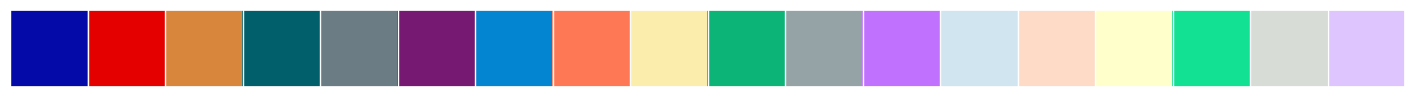

In [77]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
          ]
sns.palplot(sns.color_palette(palette))

In [78]:
donnees1 = pd.read_csv("Q1.csv", sep=";" ,  encoding='cp1252')
donnees1.CHIFFRE_AFFAIRE   = donnees1.CHIFFRE_AFFAIRE.apply(lambda x: str(x).replace(',','.')).astype('float32')
donnees1.SUM_PORT   = donnees1.SUM_PORT.apply(lambda x: str(x).replace(',','.')).astype('float32')
donnees1.columns = list(map(lambda x: x.lower(),donnees1.columns))
donnees1.head()

annee  mois_n       mois  chiffre_affaire  sum_quantite       sum_port
0   2017       1  JANVIER         12965713.0        219340  150700.500000
1   2017       2  FÉVRIER          6509138.5        109482   75204.796875
2   2017       3  MARS            10257437.0        173791  116188.796875
3   2017       4  AVRIL           12118493.0        206080  136826.906250
4   2017       5  MAI             17601532.0        298248  196470.500000

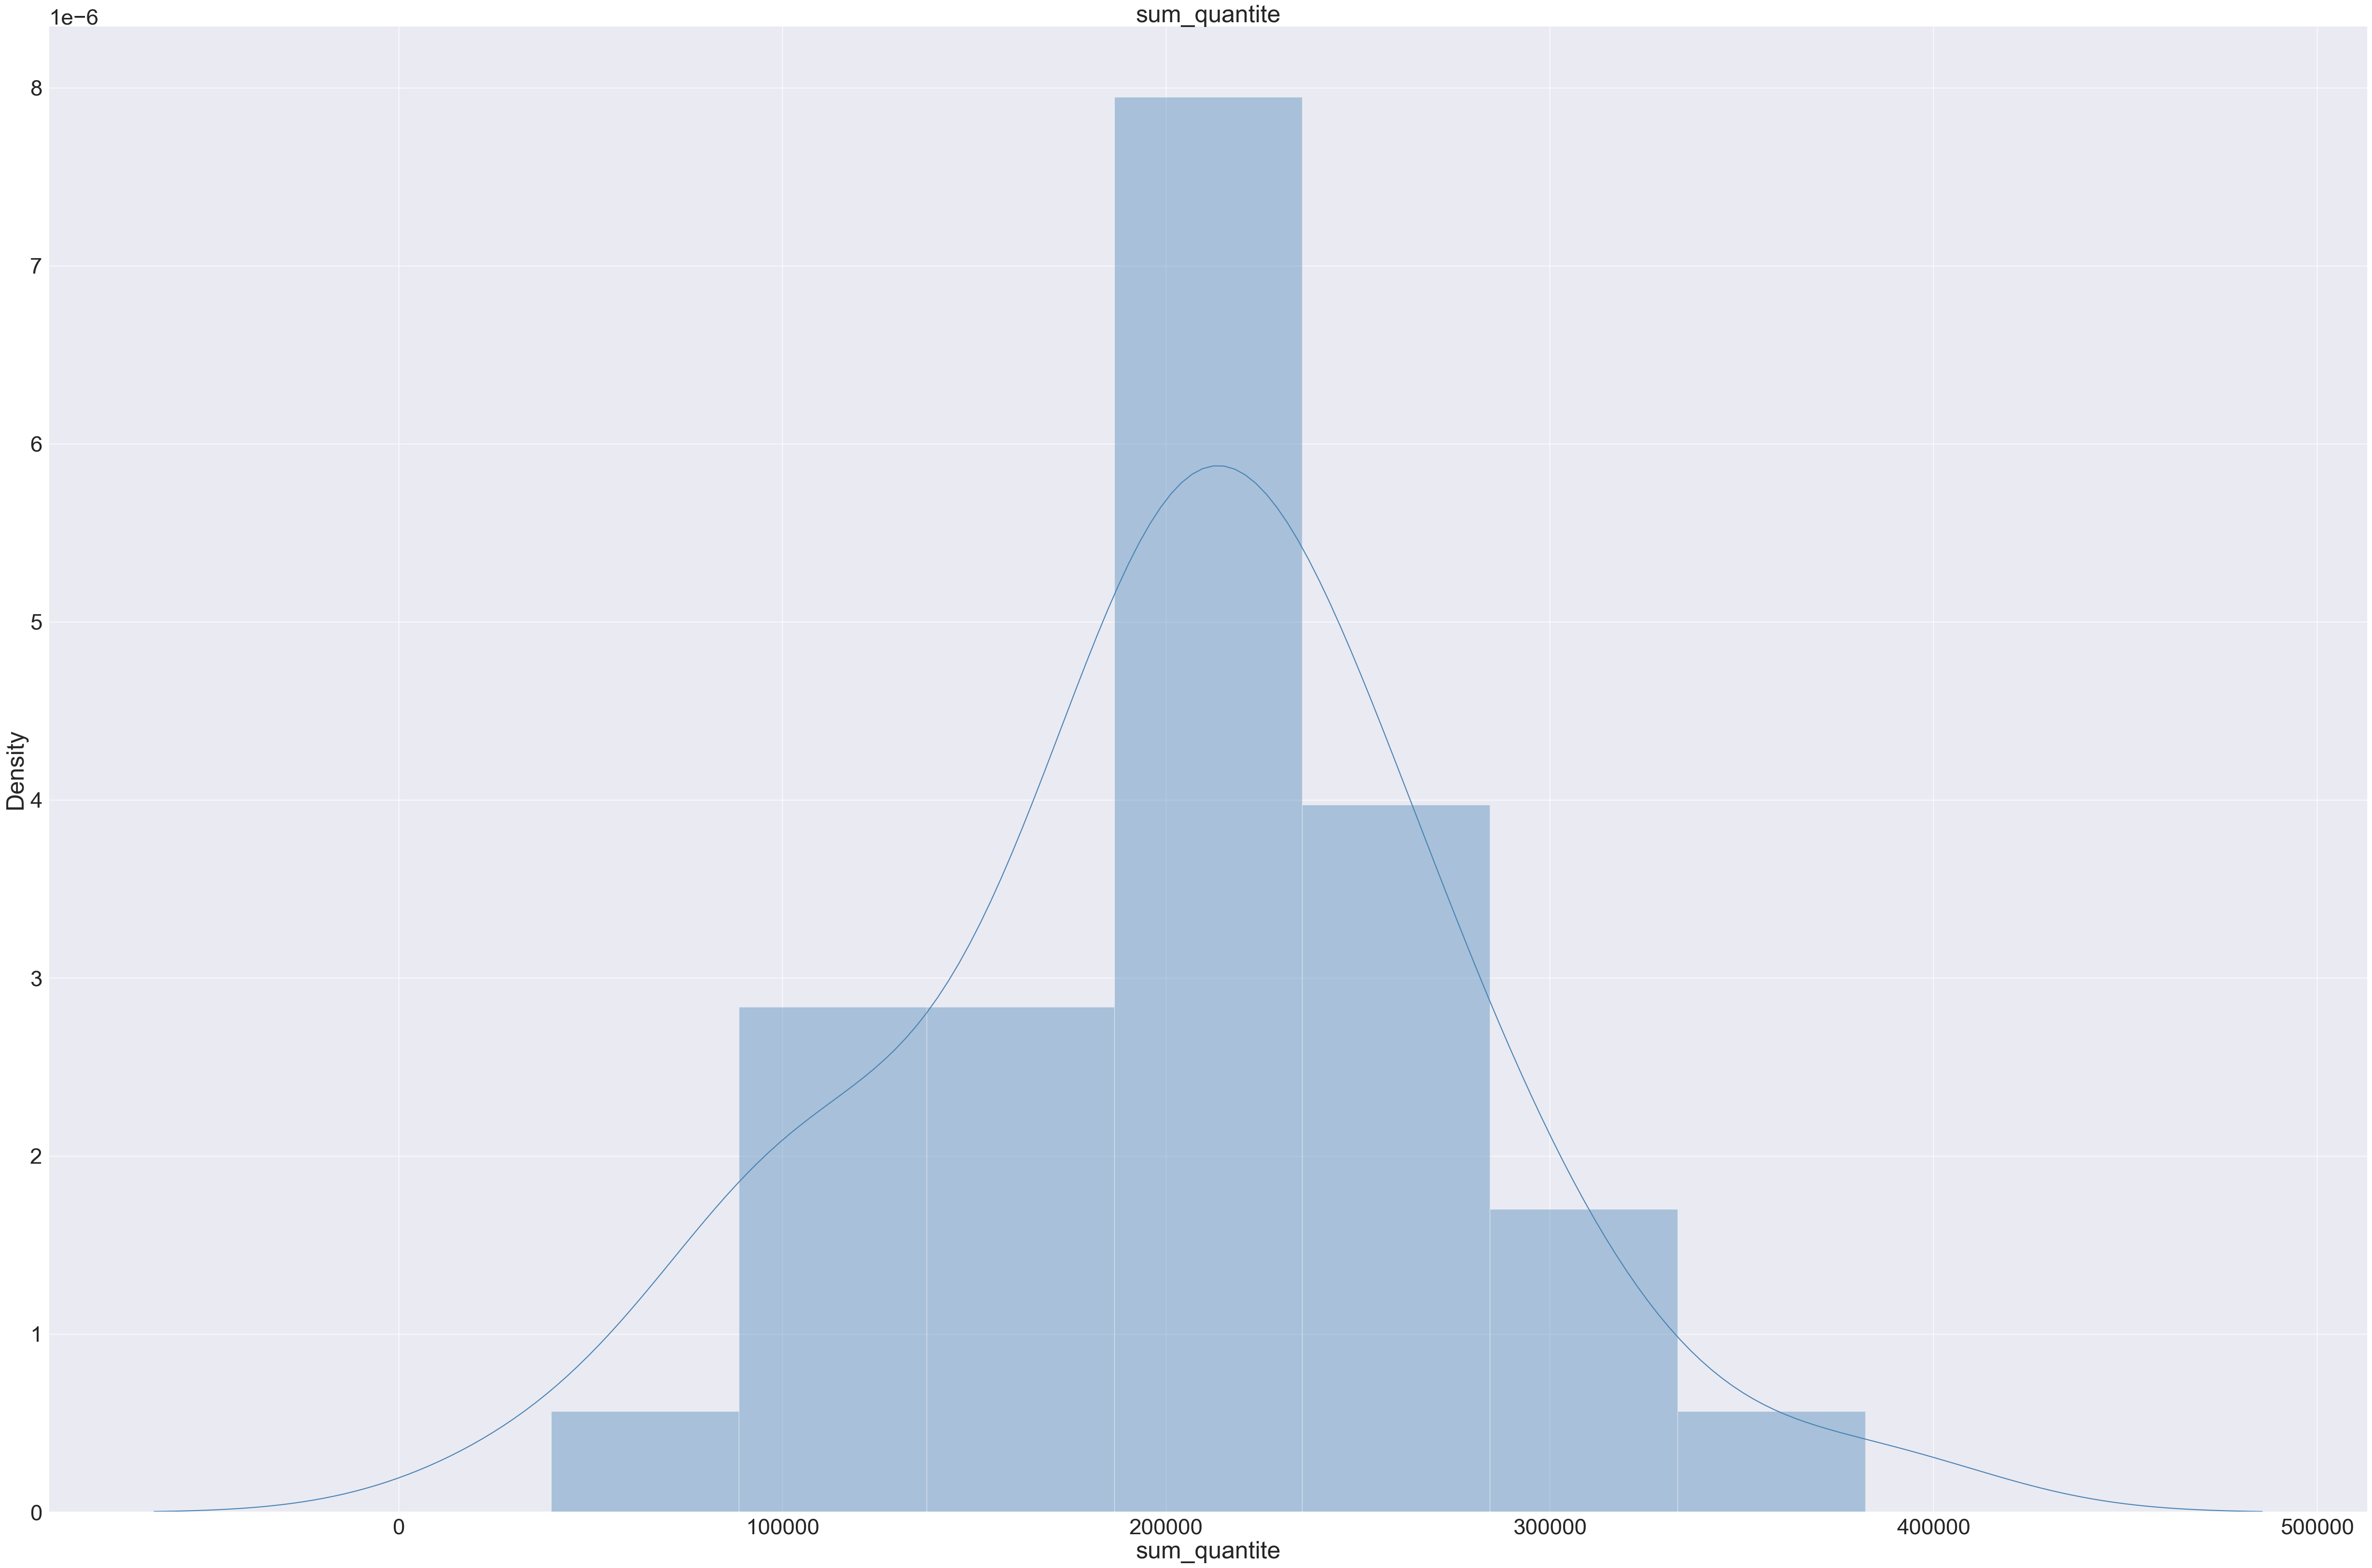

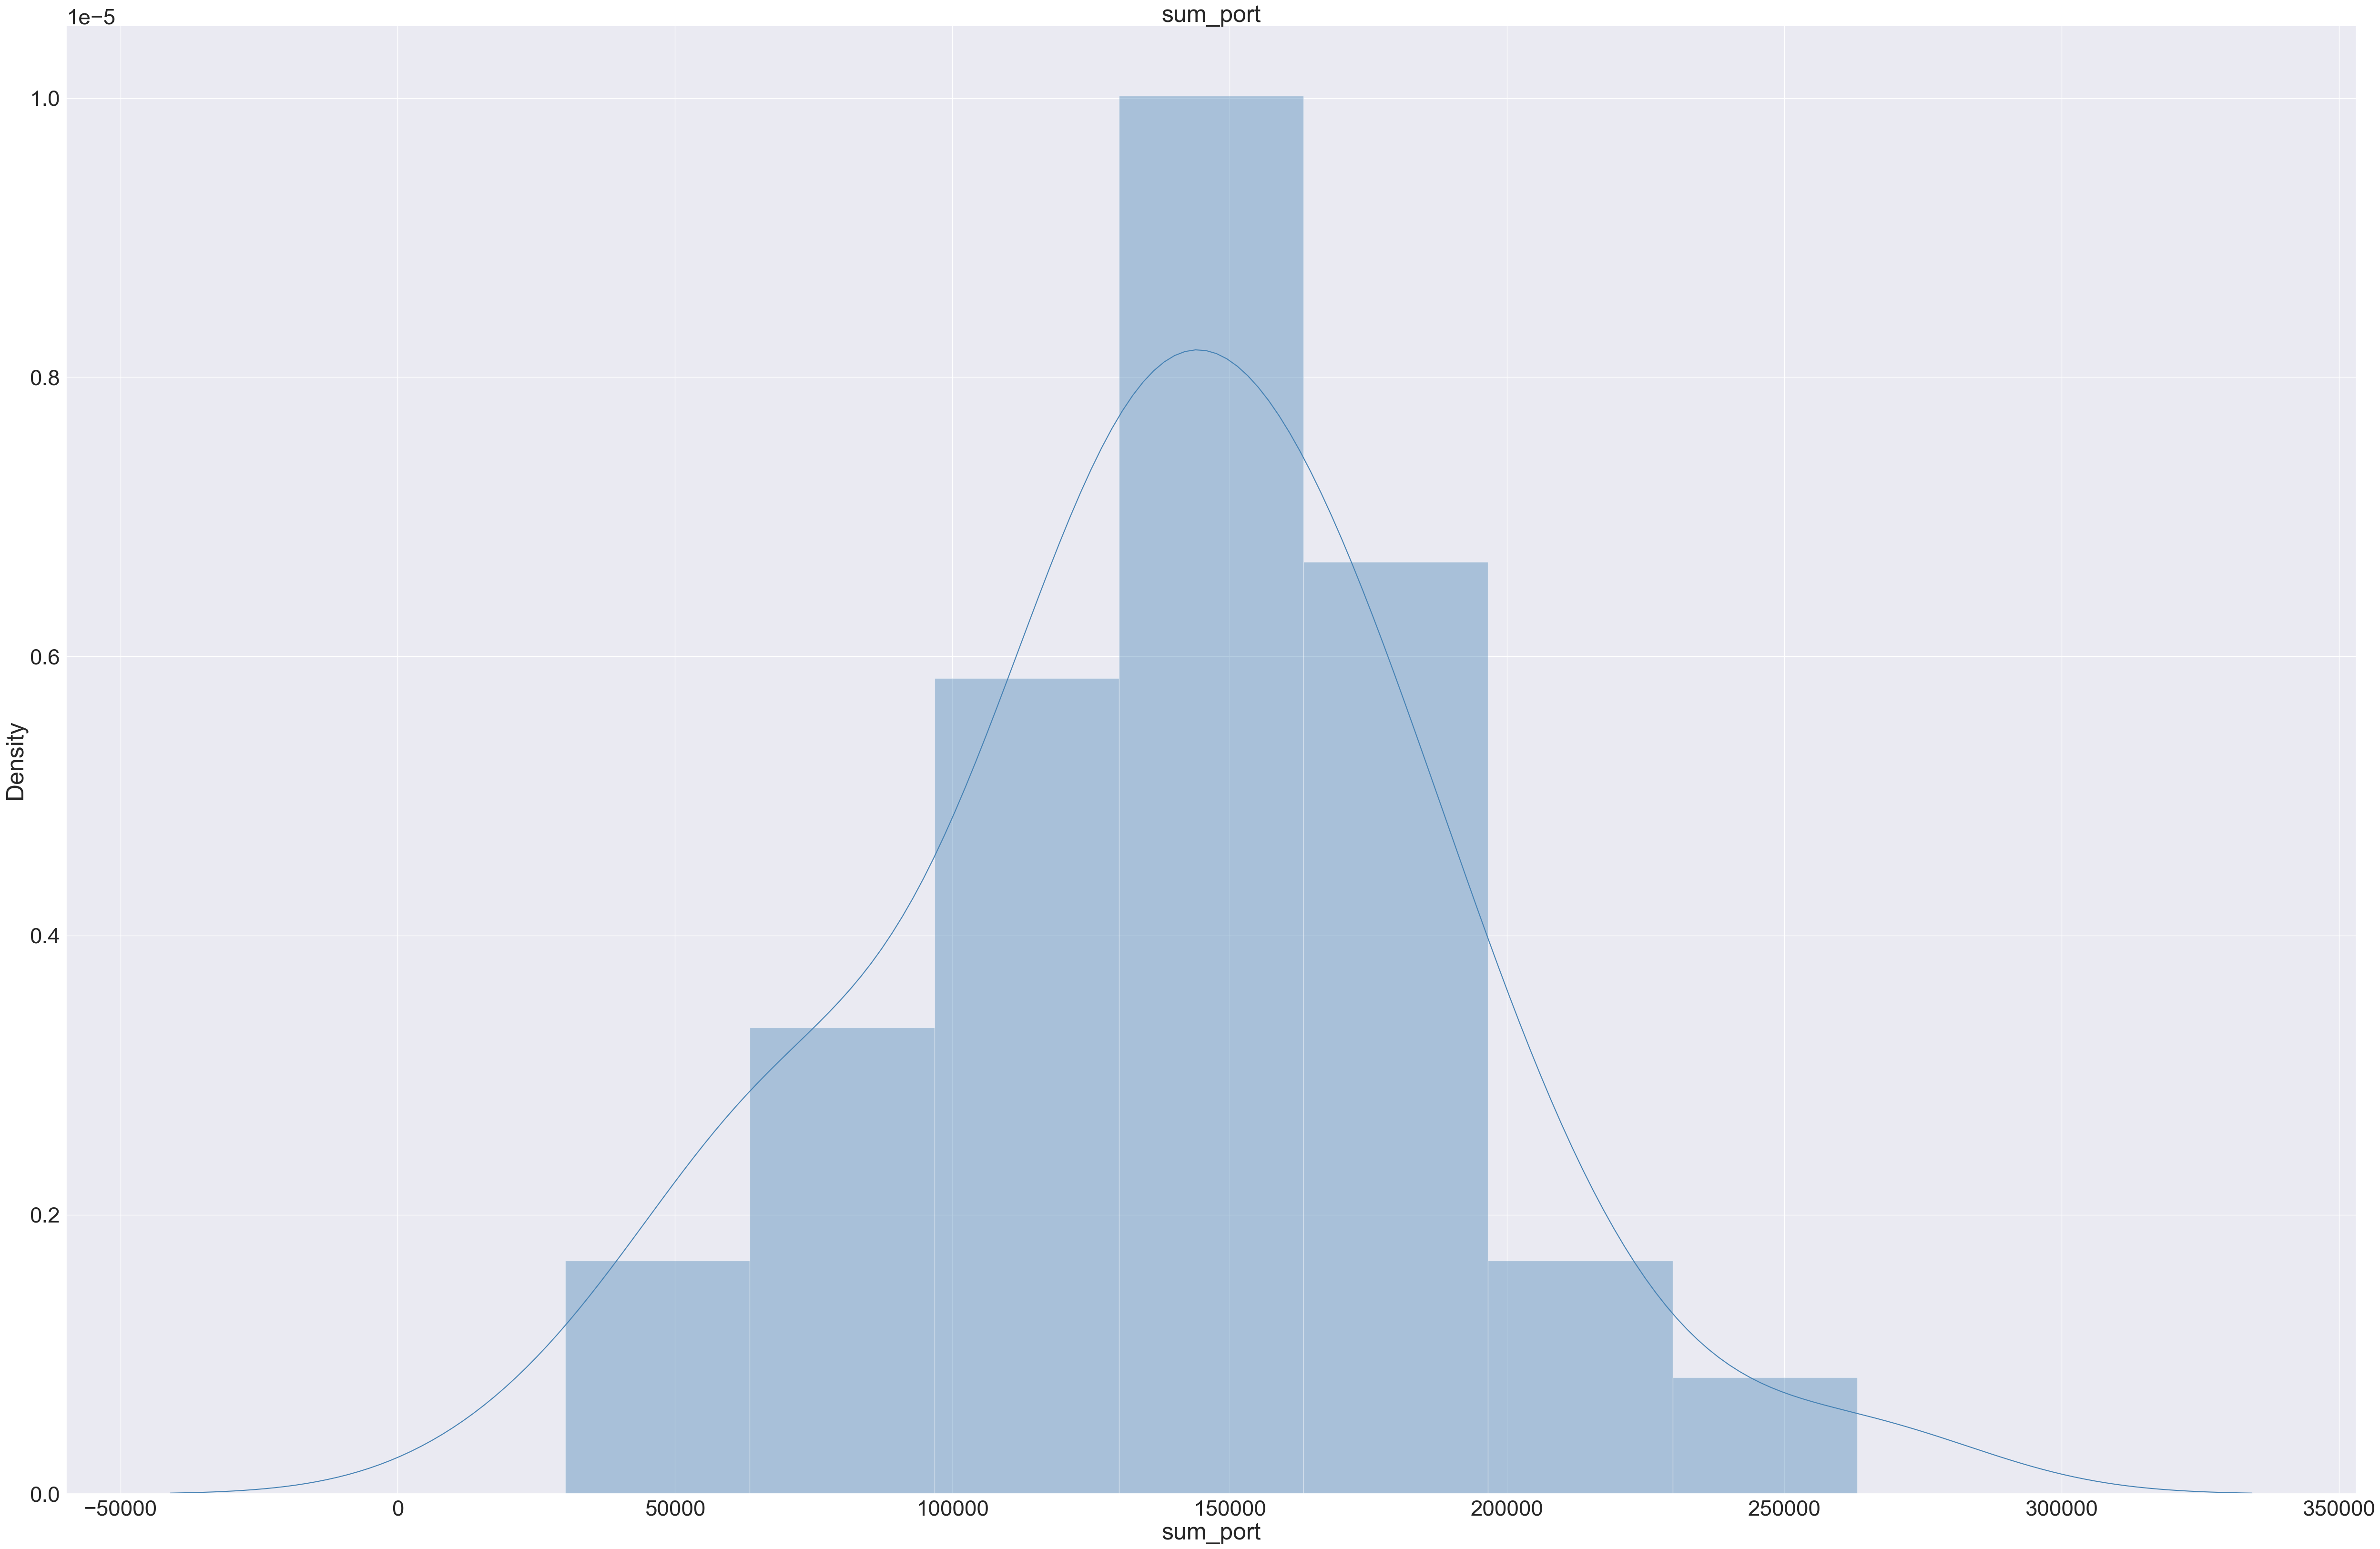

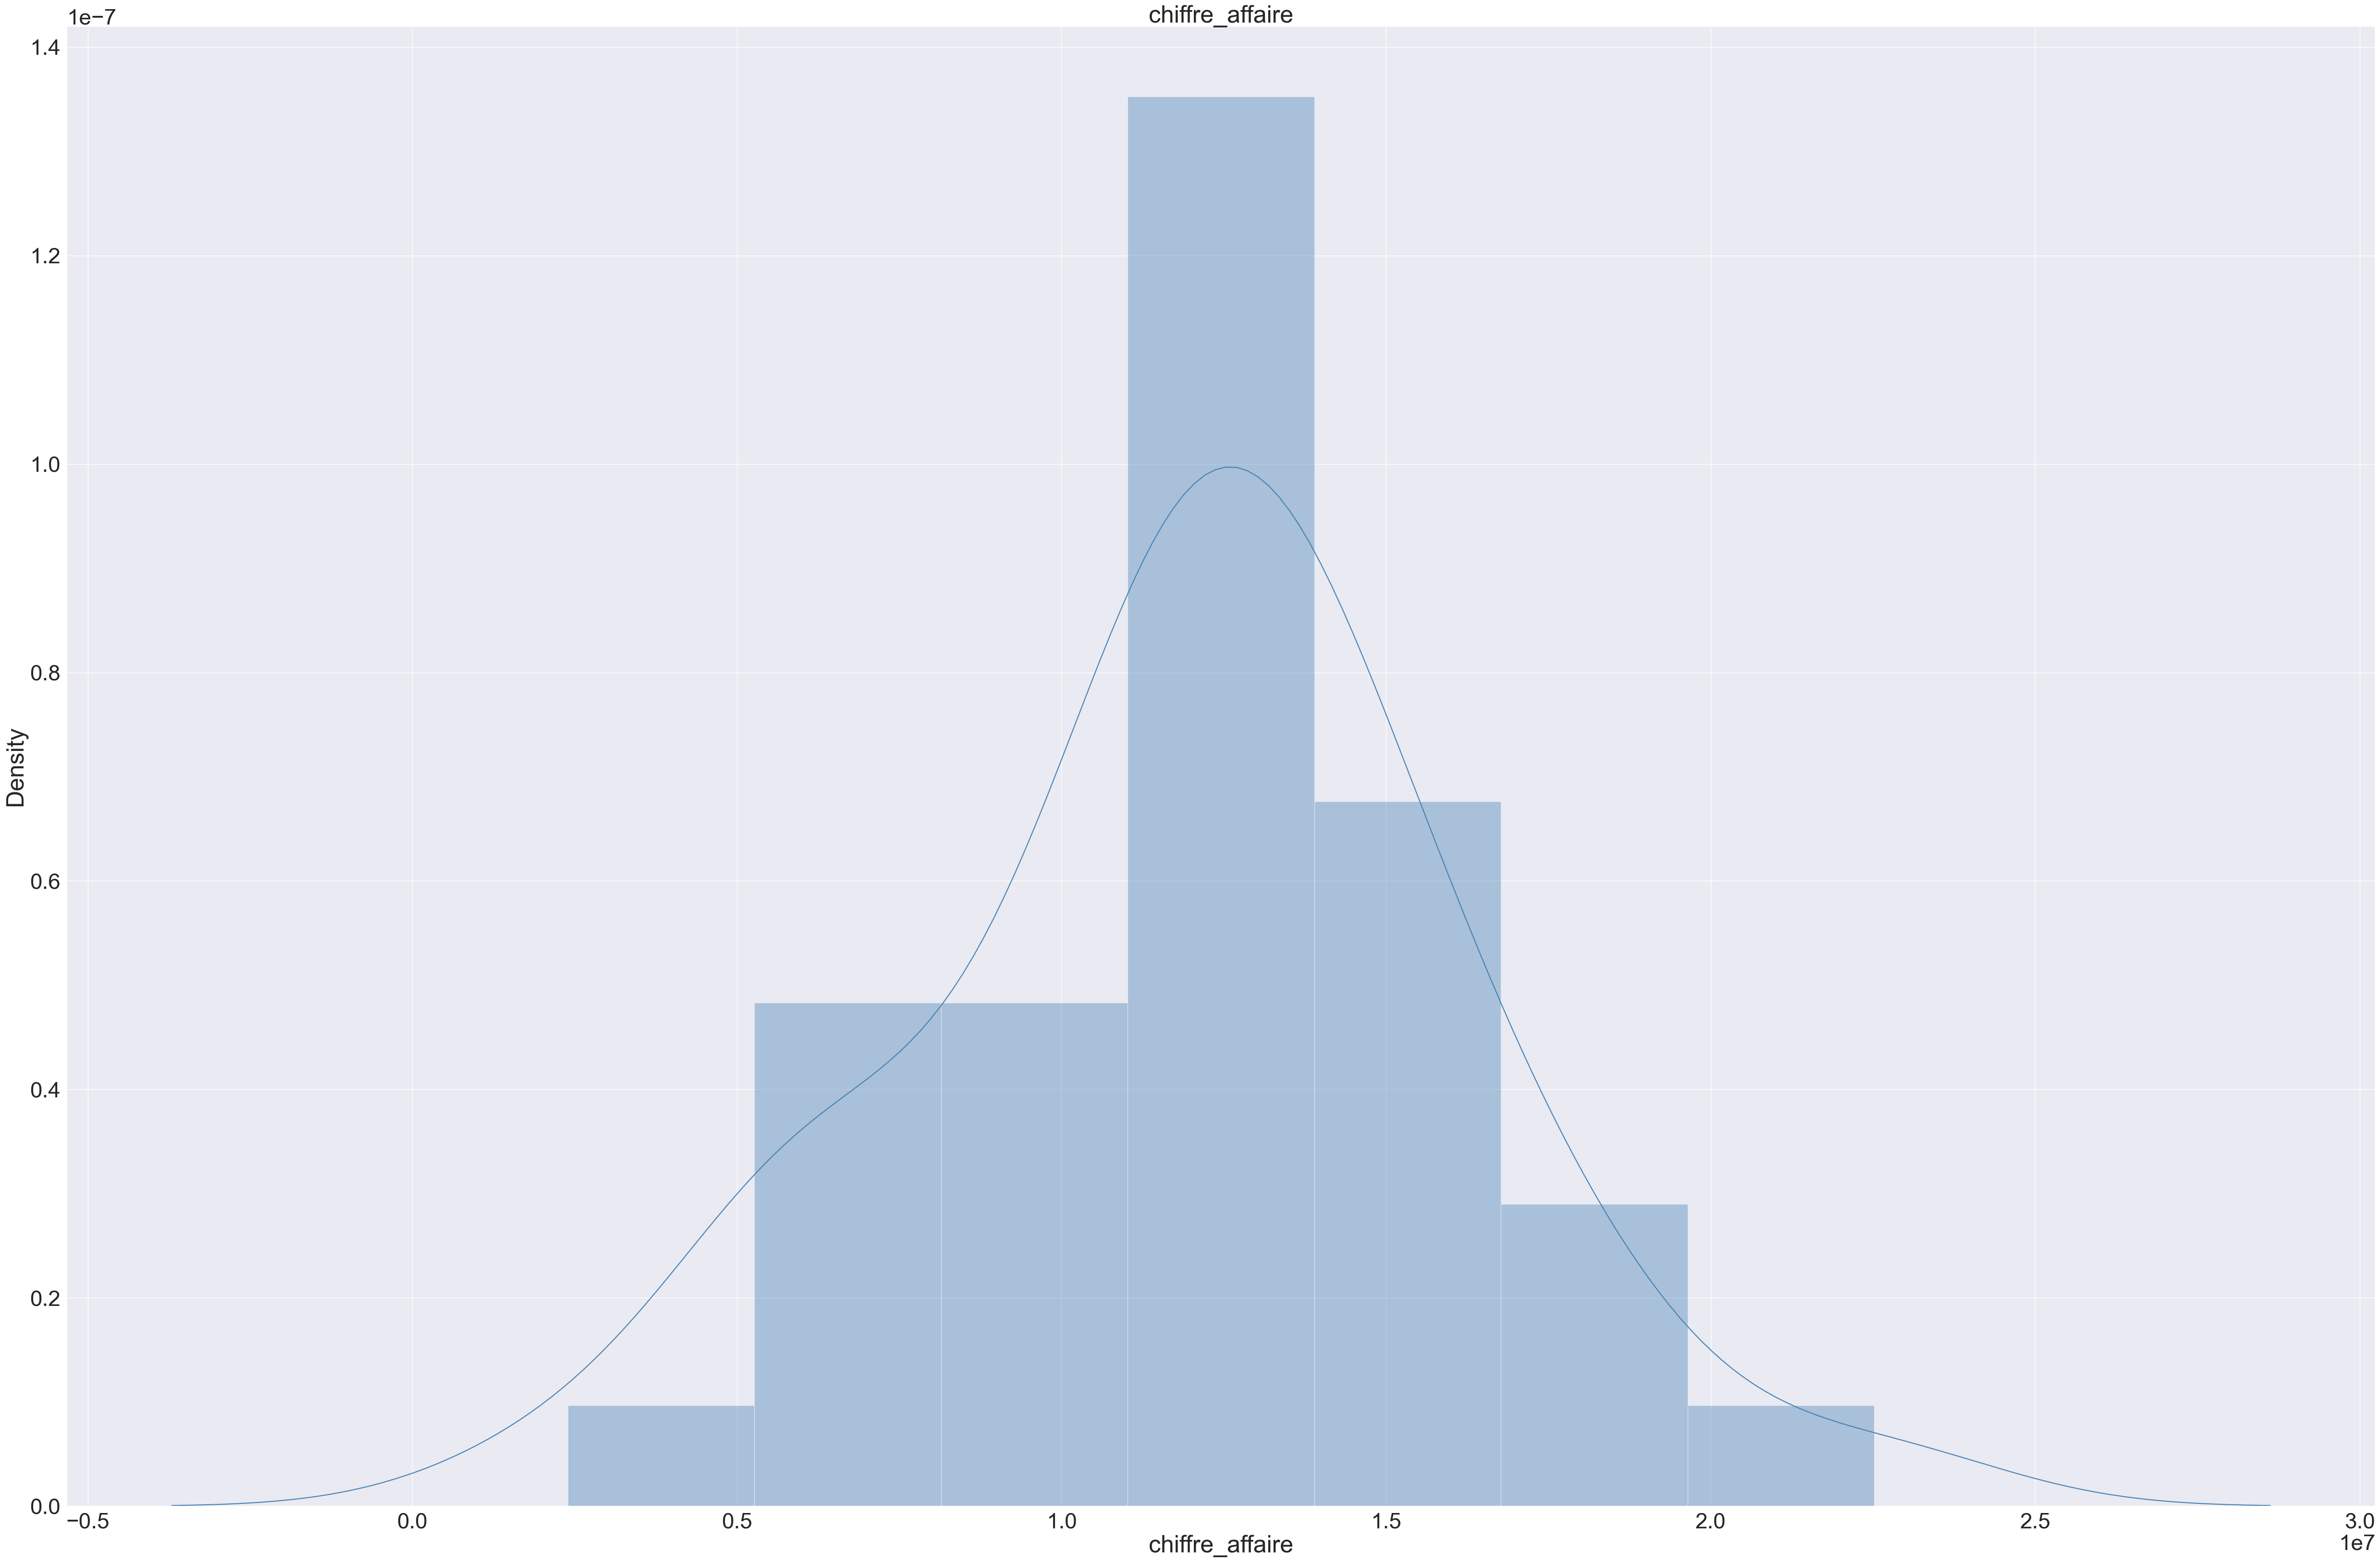

In [87]:
for colonne in ['sum_quantite', 'sum_port', 'chiffre_affaire']:
    plt.figure(figsize=(62,40))
    plt.title(colonne)
    sns.distplot(donnees1[colonne], color="steelblue")
    plt.show()

In [4]:
donnees1.groupby(['annee']).agg({'chiffre_affaire':['sum','mean','std']}).head(3)

chiffre_affaire                          
                  sum        mean           std
annee                                          
2017      154826592.0  12902216.0  3.496464e+06
2018      171782816.0  14315235.0  3.287417e+06
2019      106598288.0   8883191.0  3.847596e+06

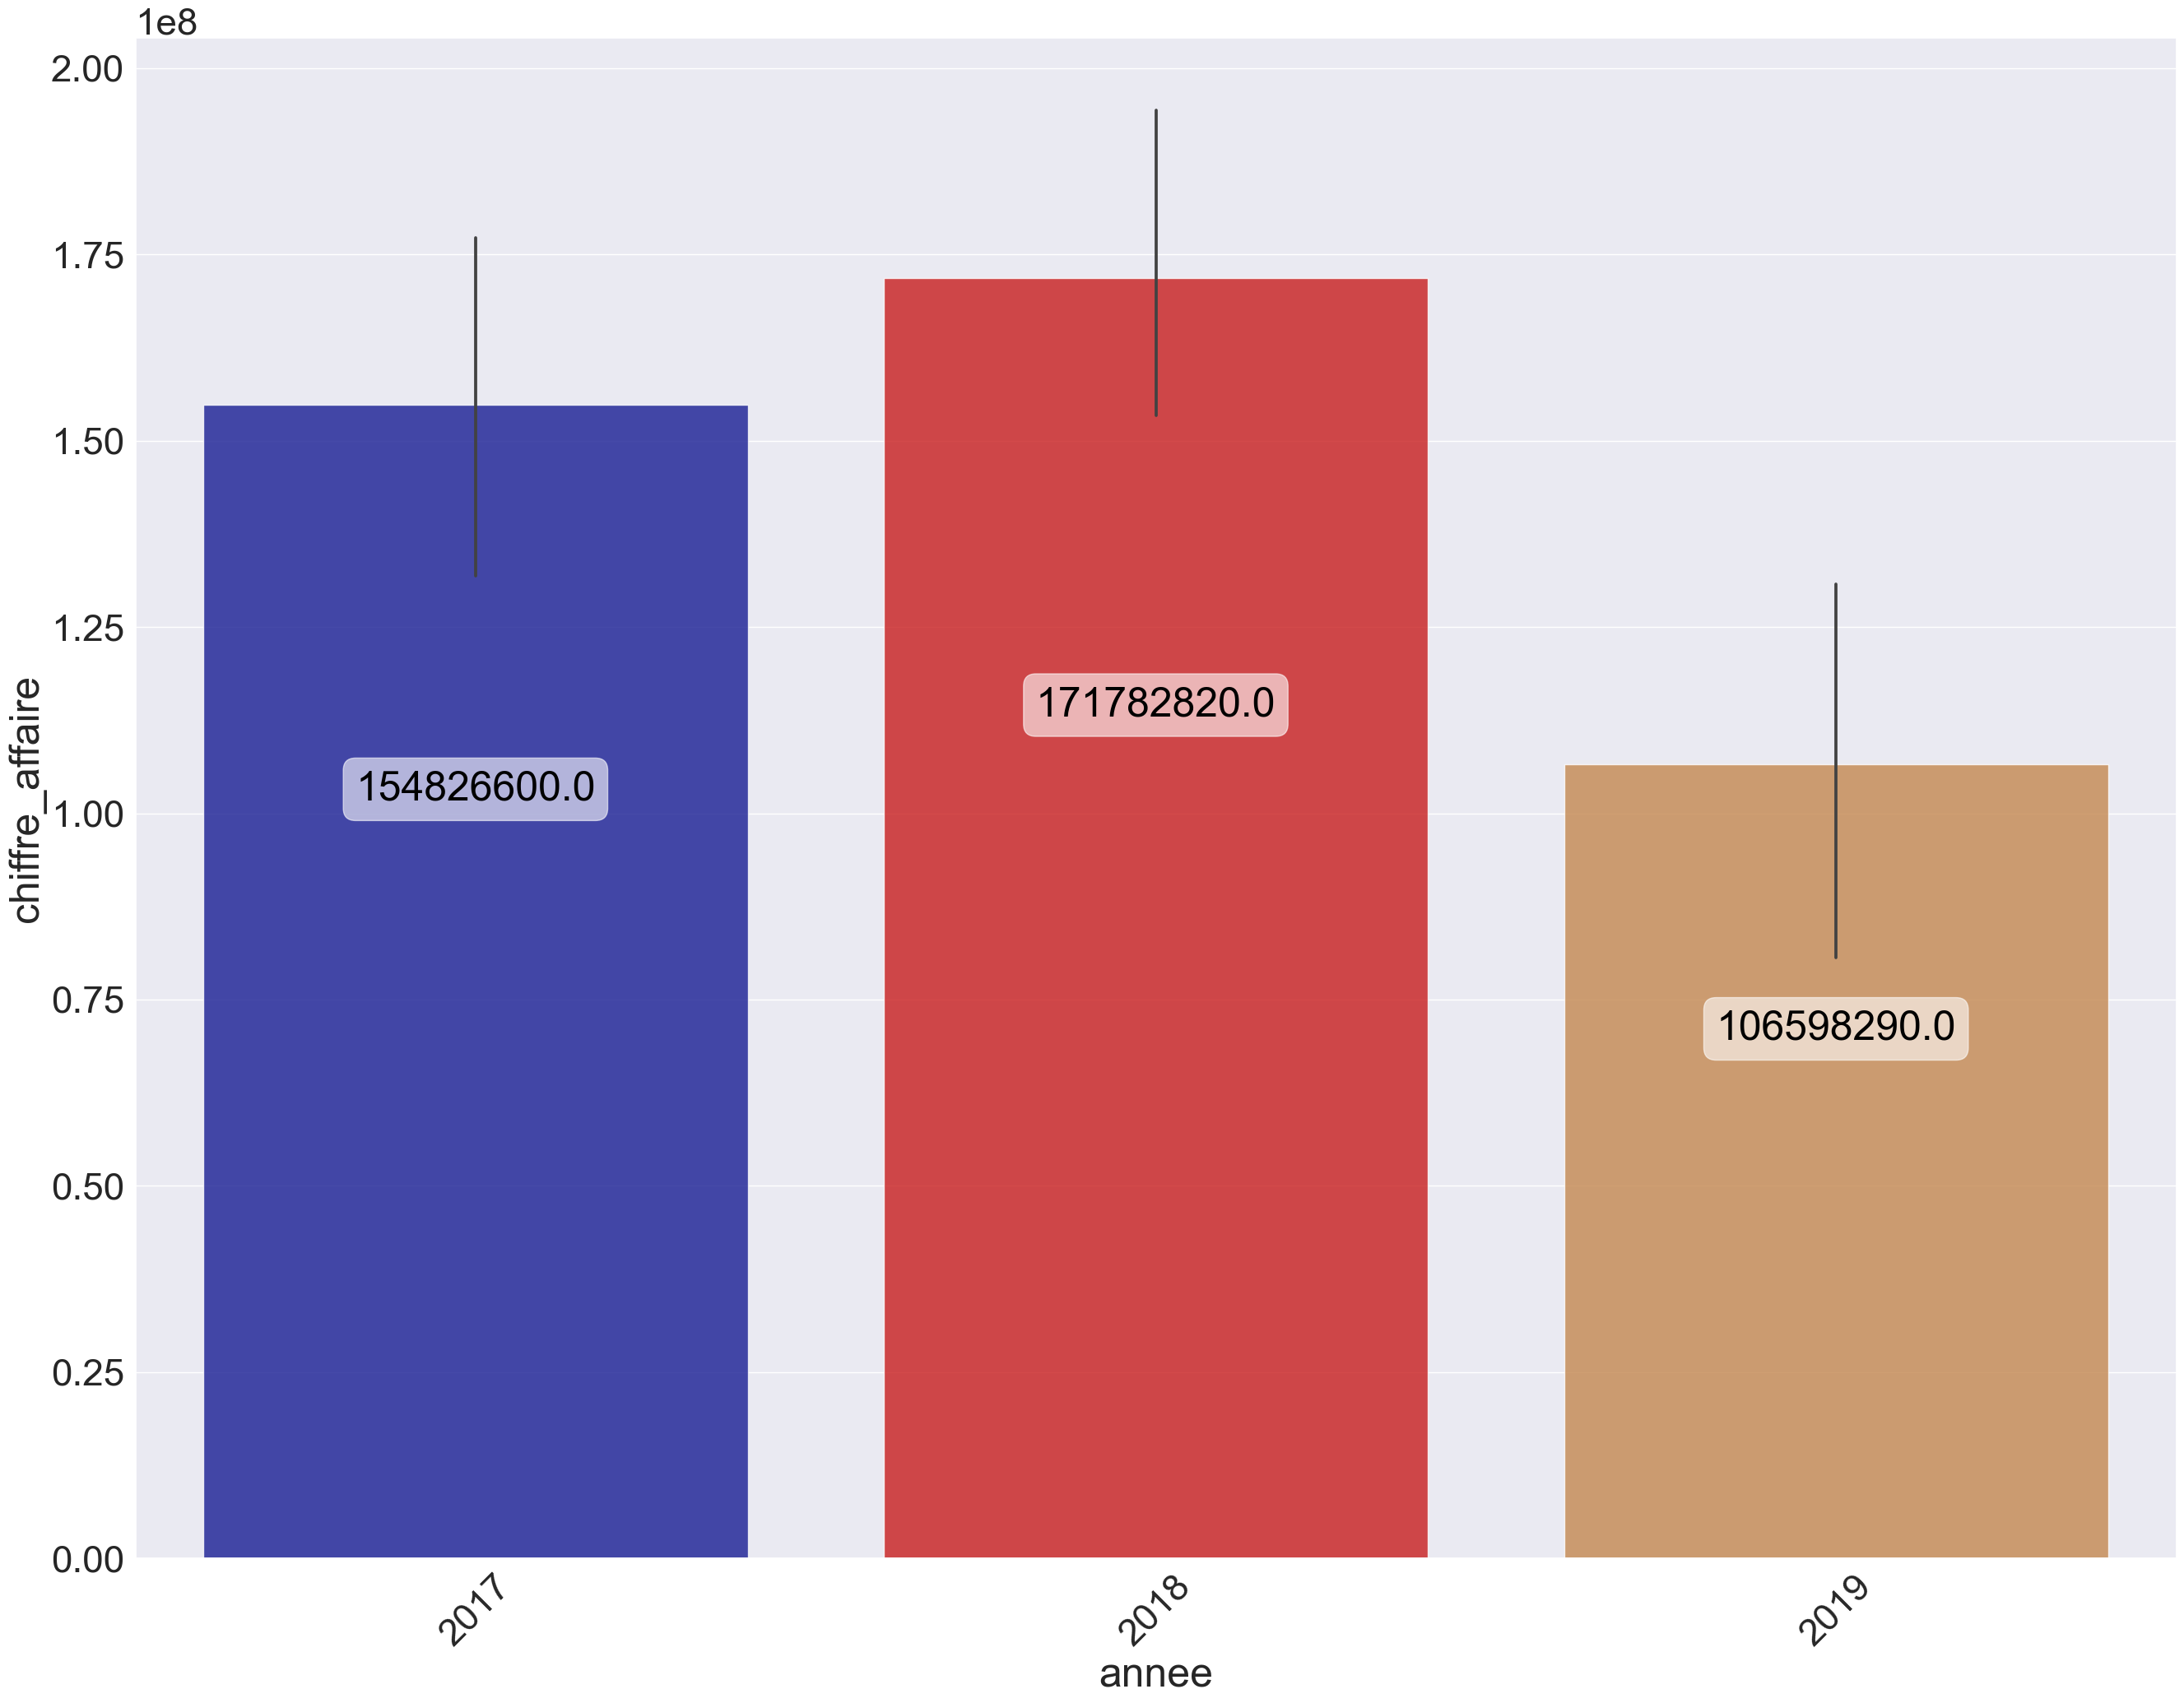

In [5]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='annee',y='chiffre_affaire',data=donnees1.sort_values('annee'),palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

for i,nb in enumerate(donnees1.groupby('annee').chiffre_affaire.sum().sort_index().values):
    gbarplot.text(
                i ,
                nb-nb//3,
                nb,
                color='black',
                rotation='horizontal',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )

In [6]:
donnees1.groupby(['annee']).agg({'sum_port':['sum','mean','std']}).head(3)

sum_port                             
              sum           mean           std
annee                                         
2017   1773418.25  147784.859375  39845.413216
2018   1977718.00  164809.828125  40585.469227
2019   1235051.00  102920.914062  45241.660477

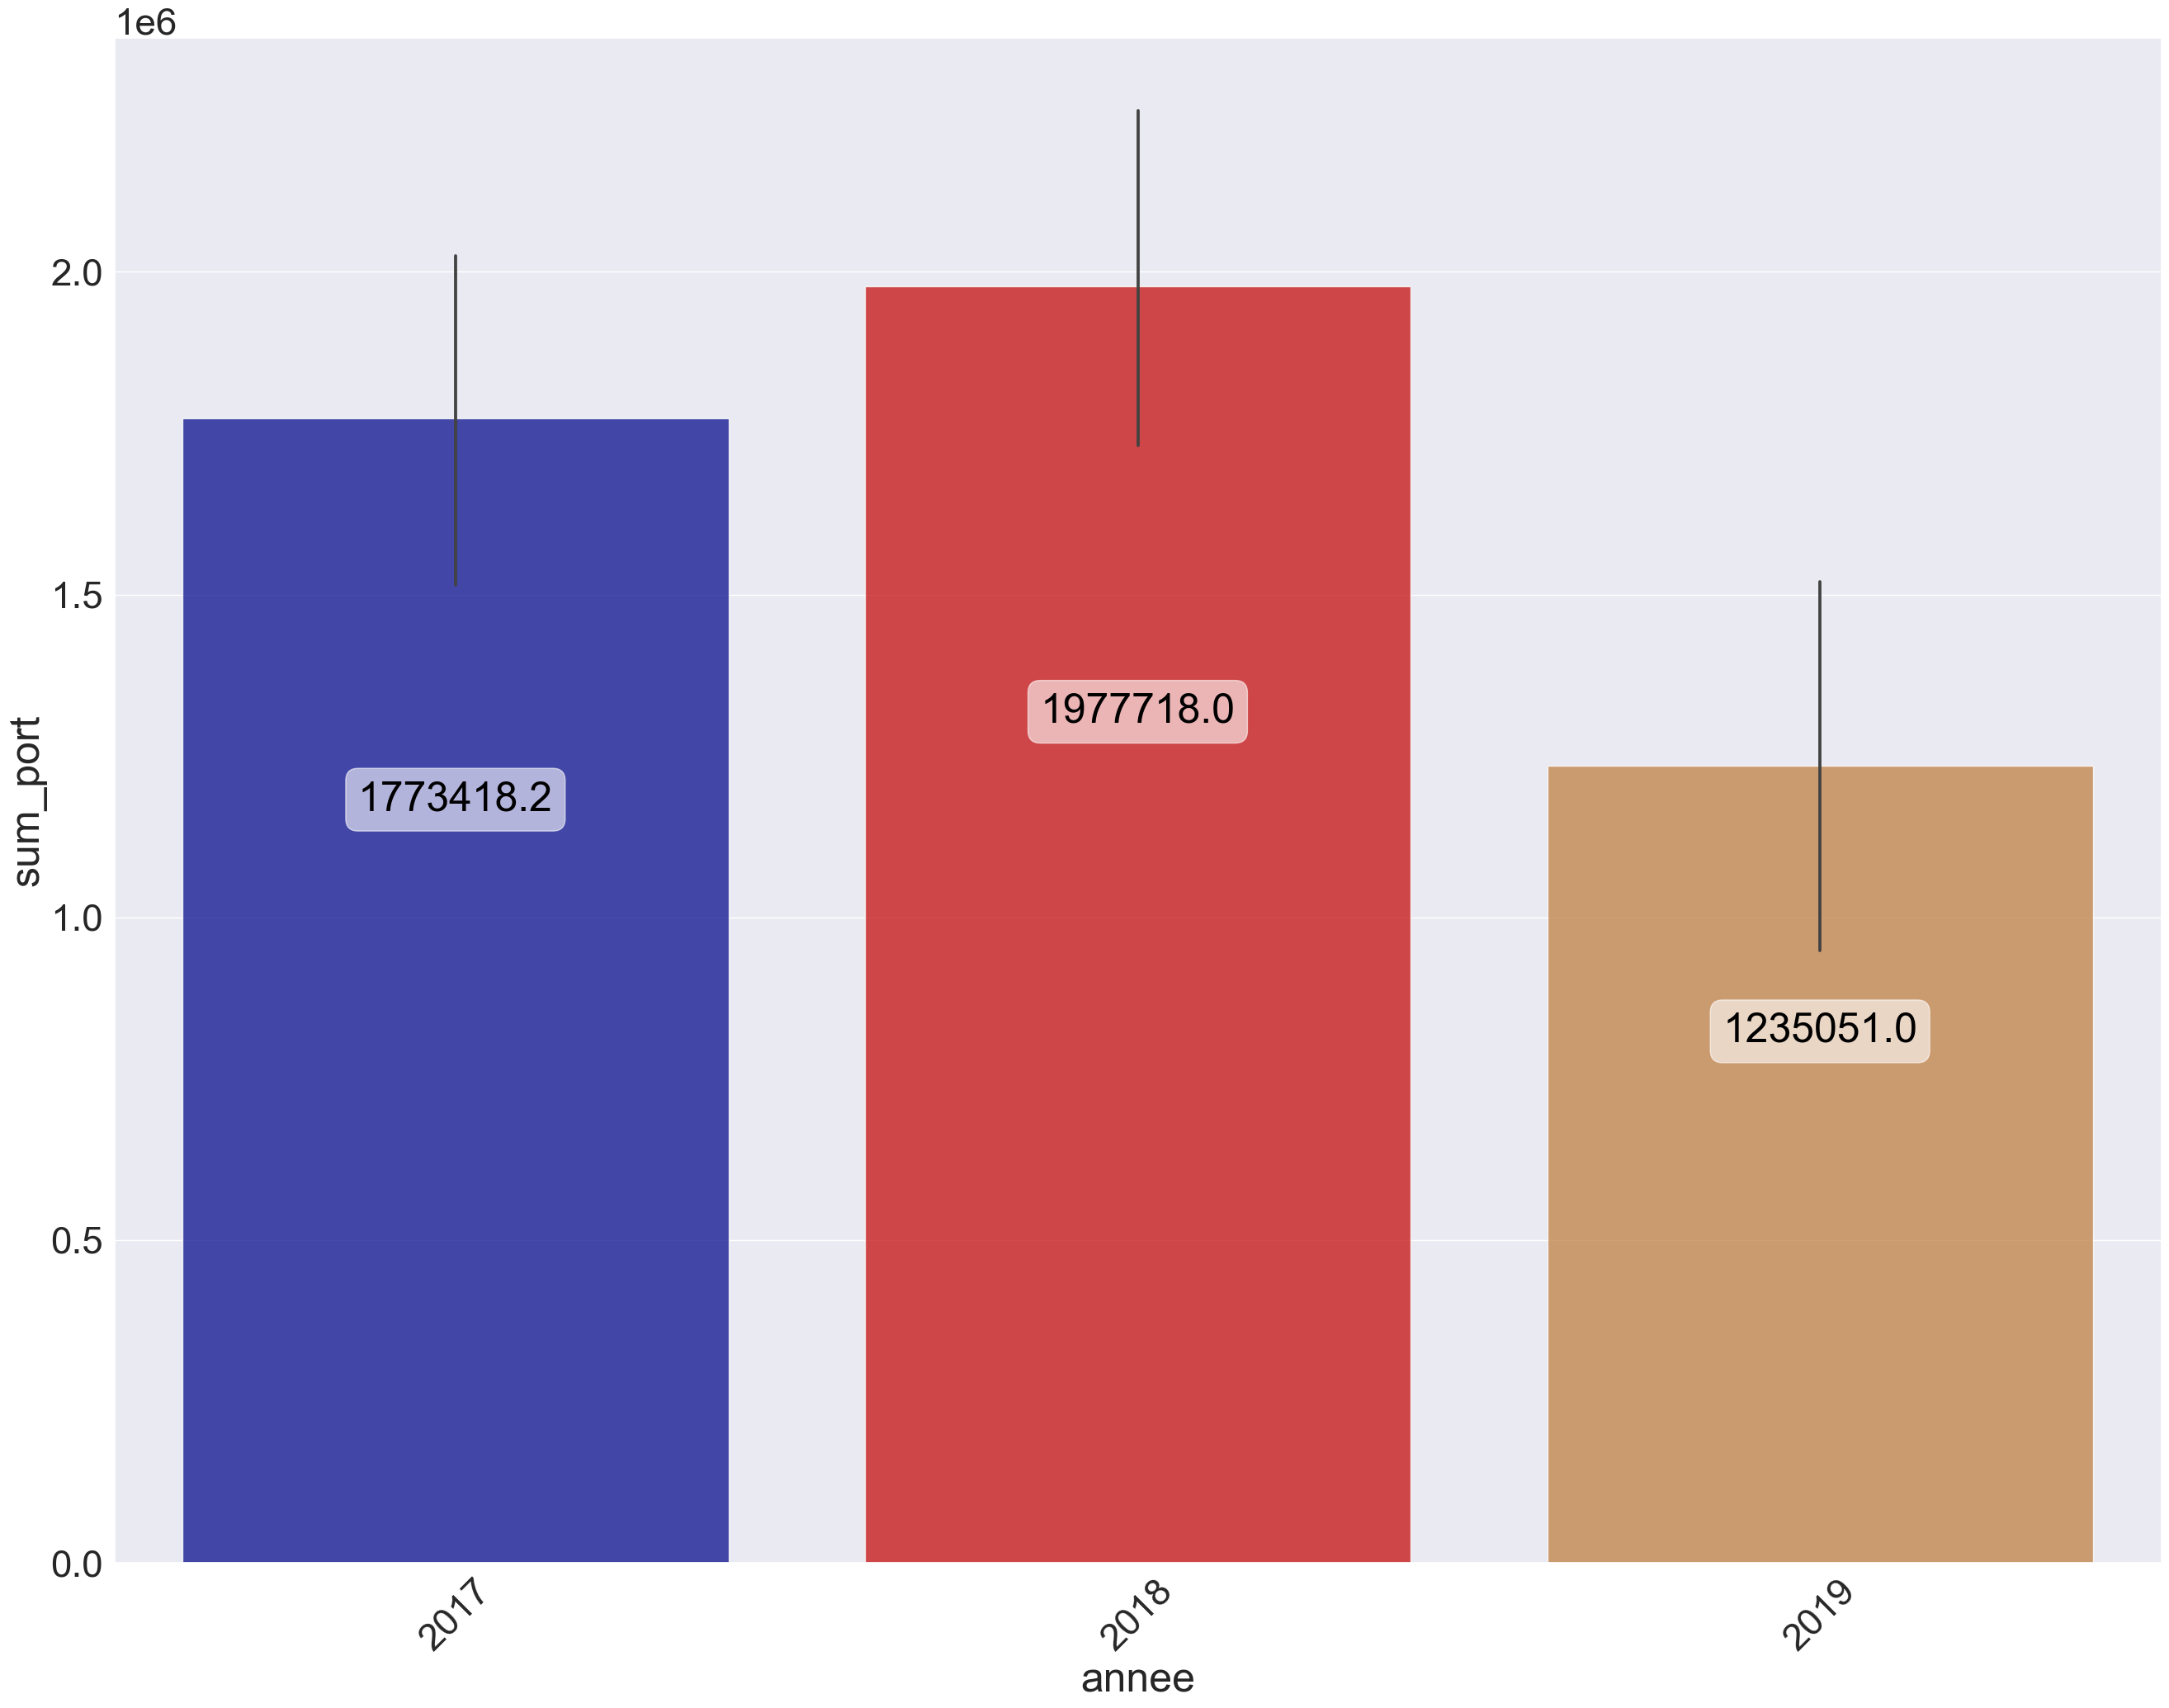

In [7]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='annee',y='sum_port',data=donnees1.sort_values('annee'),palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

for i,nb in enumerate(donnees1.groupby('annee').sum_port.sum().sort_index().values):
    gbarplot.text(
                i ,
                nb-nb//3,
                nb,
                color='black',
                rotation='horizontal',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )

In [8]:
donnees1.groupby(['annee']).agg({'sum_quantite':['sum','mean','std']}).head(3)


sum_quantite                             
               sum           mean           std
annee                                          
2017       2620794  218399.500000  58627.350167
2018       2909109  242425.750000  56285.114264
2019       1811135  150927.916667  65910.872135

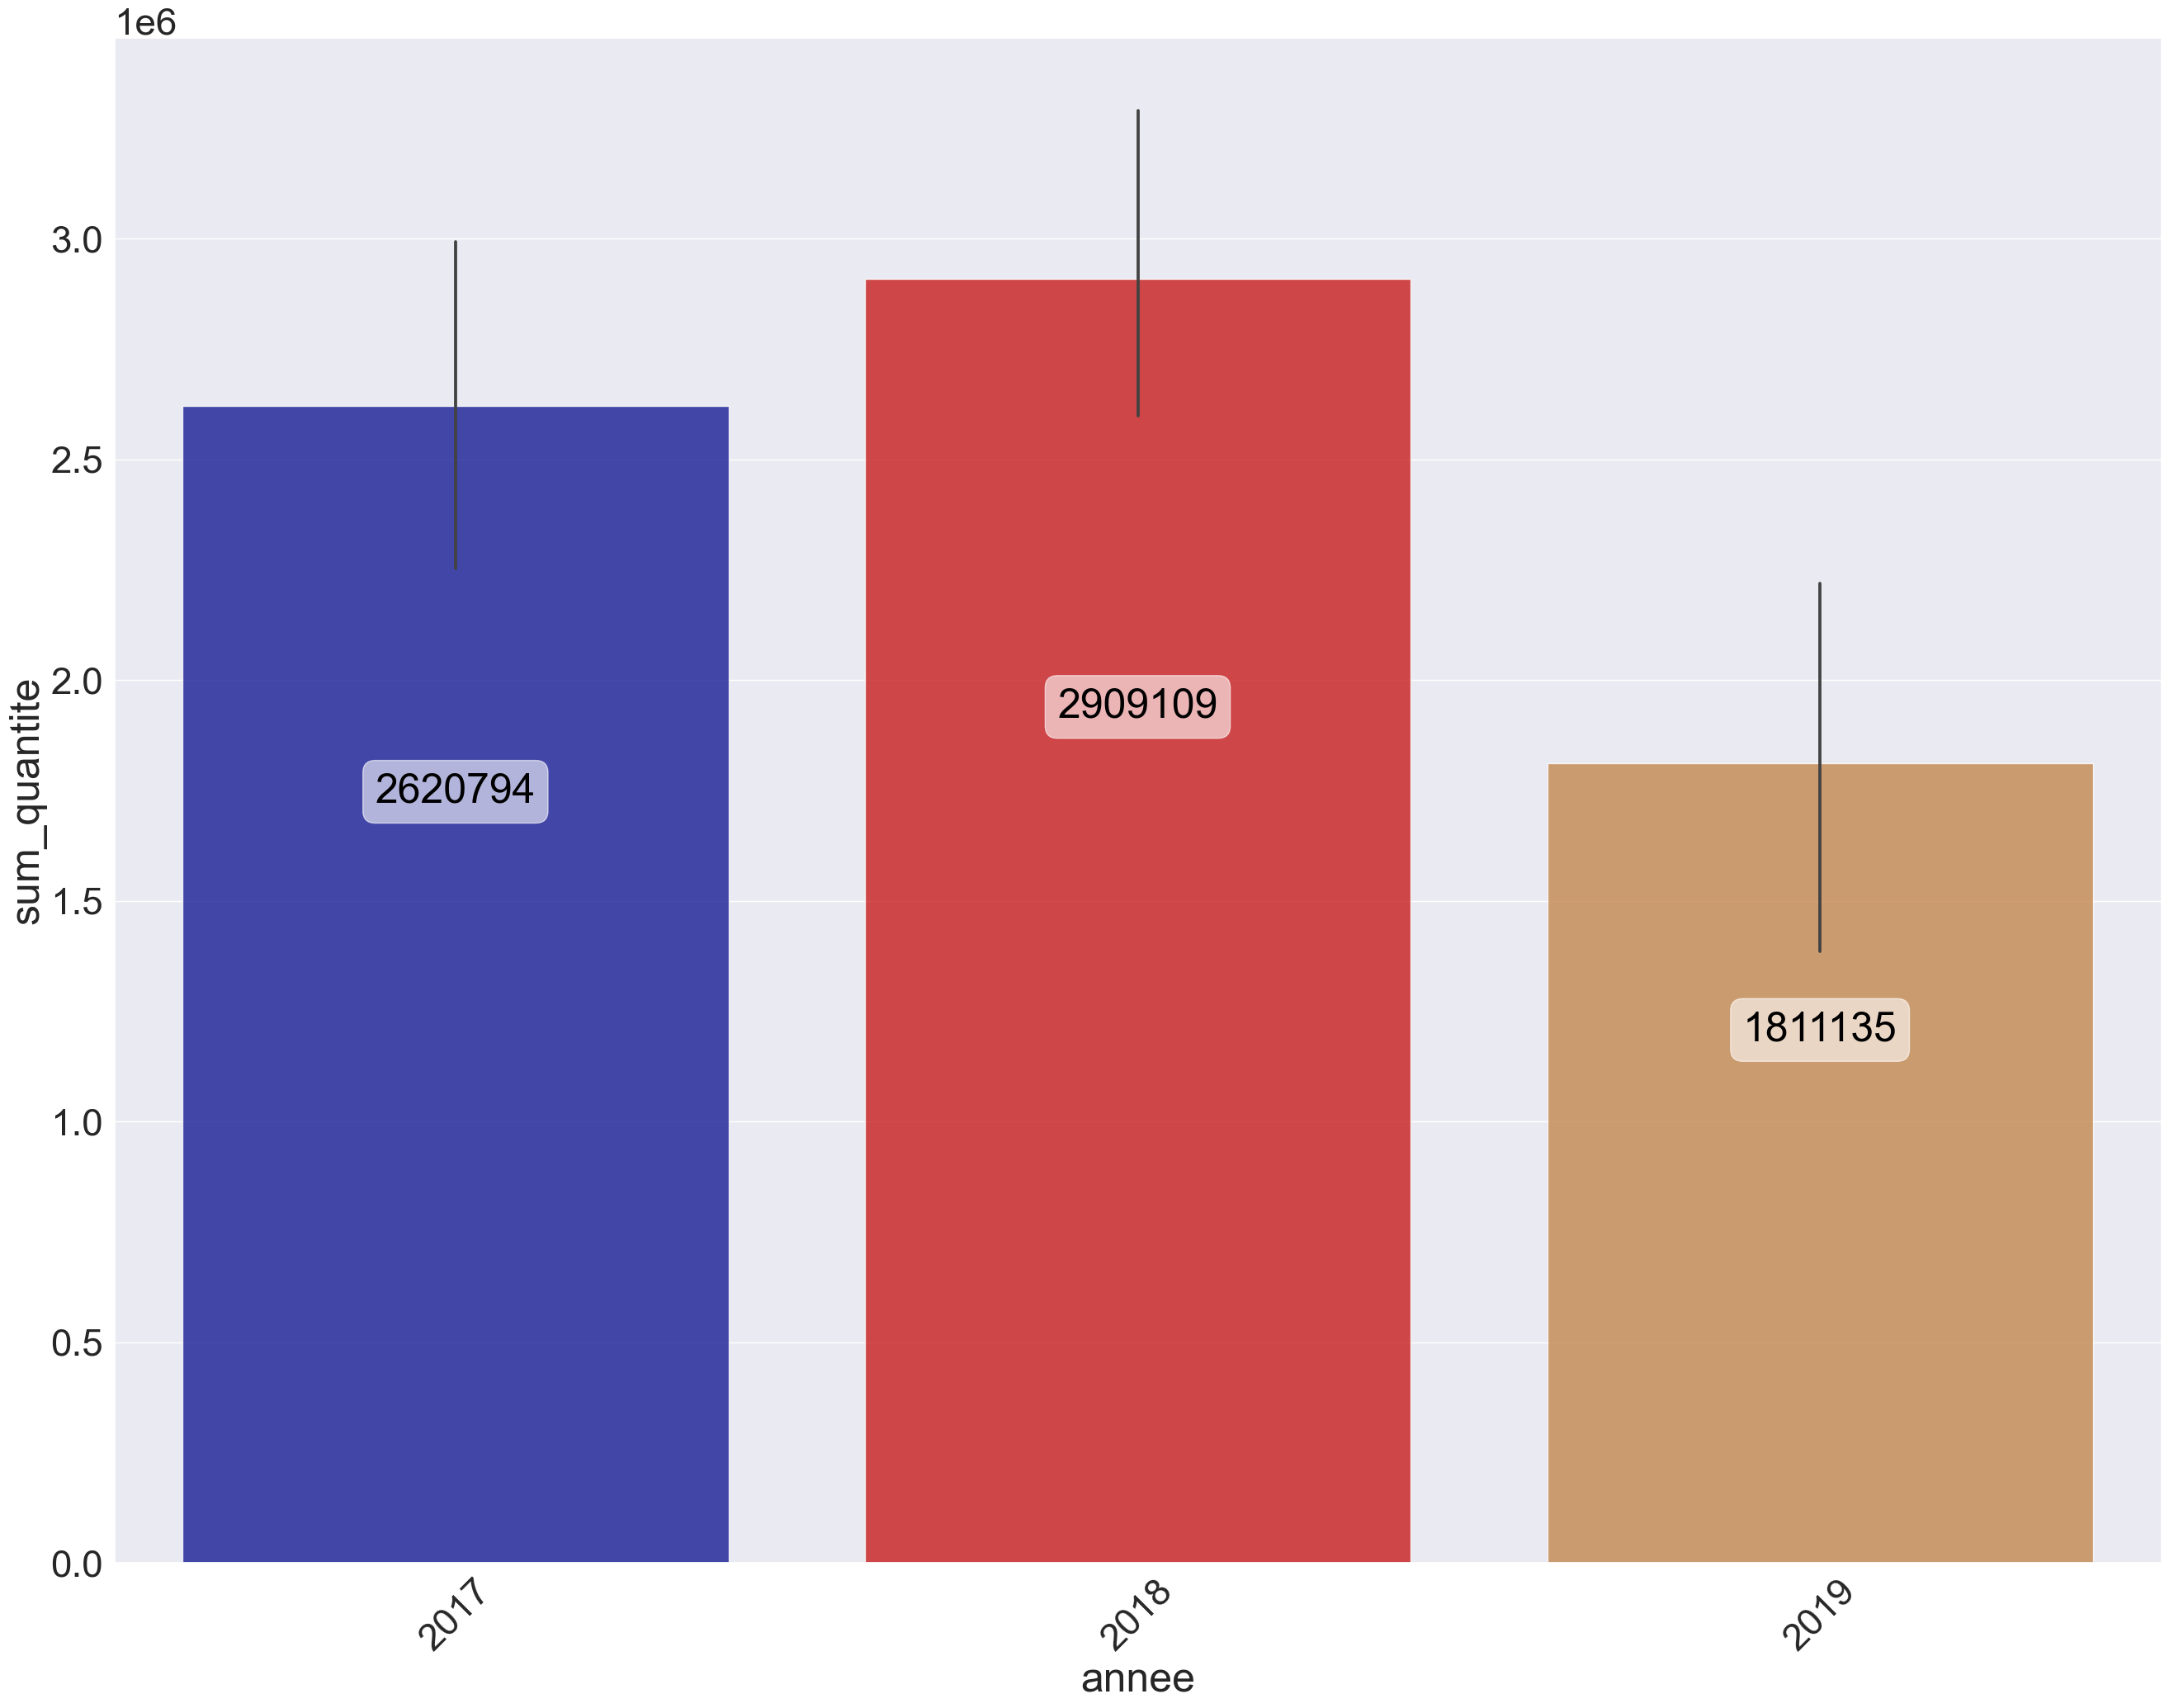

In [9]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='annee',y='sum_quantite',data=donnees1.sort_values('annee'),palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

for i,nb in enumerate(donnees1.groupby('annee').sum_quantite.sum().sort_index().values):
    gbarplot.text(
                i ,
                nb-nb//3,
                nb,
                color='black',
                rotation='horizontal',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )

In [10]:
# 3 premiers et dernier mois suivant chiffre affaire
resultats = donnees1.groupby(['annee', 'mois_n']).agg({'chiffre_affaire': ['sum', 'mean']}).reset_index()
resultats = resultats.sort_values(by=('chiffre_affaire', 'sum'), ascending=True)
resultats.head(3)

annee mois_n chiffre_affaire            
                            sum        mean
24  2019      1      2393490.75  2393490.75
28  2019      5      5580034.00  5580034.00
33  2019     10      5611905.00  5611905.00

In [11]:
# 3 premiers et dernier mois suivant chiffre affaire
resultats = donnees1.groupby(['annee', 'mois_n']).agg({'chiffre_affaire': ['sum', 'mean']}).reset_index()
resultats = resultats.sort_values(by=('chiffre_affaire', 'sum'), ascending=False)
resultats.head(3)

annee mois_n chiffre_affaire            
                            sum        mean
19  2018      8      22521352.0  22521352.0
18  2018      7      18669306.0  18669306.0
5   2017      6      17728428.0  17728428.0

In [12]:
# 3 premiers et dernier mois suivant Port
resultats = donnees1.groupby(['annee', 'mois_n']).agg({'sum_port': ['sum', 'mean']}).reset_index()
resultats = resultats.sort_values(by=('sum_port', 'sum'), ascending=True)
resultats.head(3)

annee mois_n      sum_port              
                          sum          mean
24  2019      1  30195.900391  30195.900391
33  2019     10  58071.898438  58071.898438
28  2019      5  64047.199219  64047.199219

In [13]:
# 3 premiers et dernier mois suivant port
resultats = donnees1.groupby(['annee', 'mois_n']).agg({'sum_port': ['sum', 'mean']}).reset_index()
resultats = resultats.sort_values(by=('sum_port', 'sum'), ascending=False)
resultats.head(3)

annee mois_n       sum_port               
                           sum           mean
19  2018      8  263143.906250  263143.906250
18  2018      7  216752.296875  216752.296875
5   2017      6  206476.000000  206476.000000

In [14]:
# 3 premiers et dernier mois suivant Quantite
resultats = donnees1.groupby(['annee', 'mois_n']).agg({'sum_quantite': ['sum', 'mean']}).reset_index()
resultats = resultats.sort_values(by=('sum_quantite', 'sum'), ascending=True)
resultats.head(3)

annee mois_n sum_quantite         
                         sum     mean
24  2019      1        39684  39684.0
33  2019     10        93797  93797.0
28  2019      5        93859  93859.0

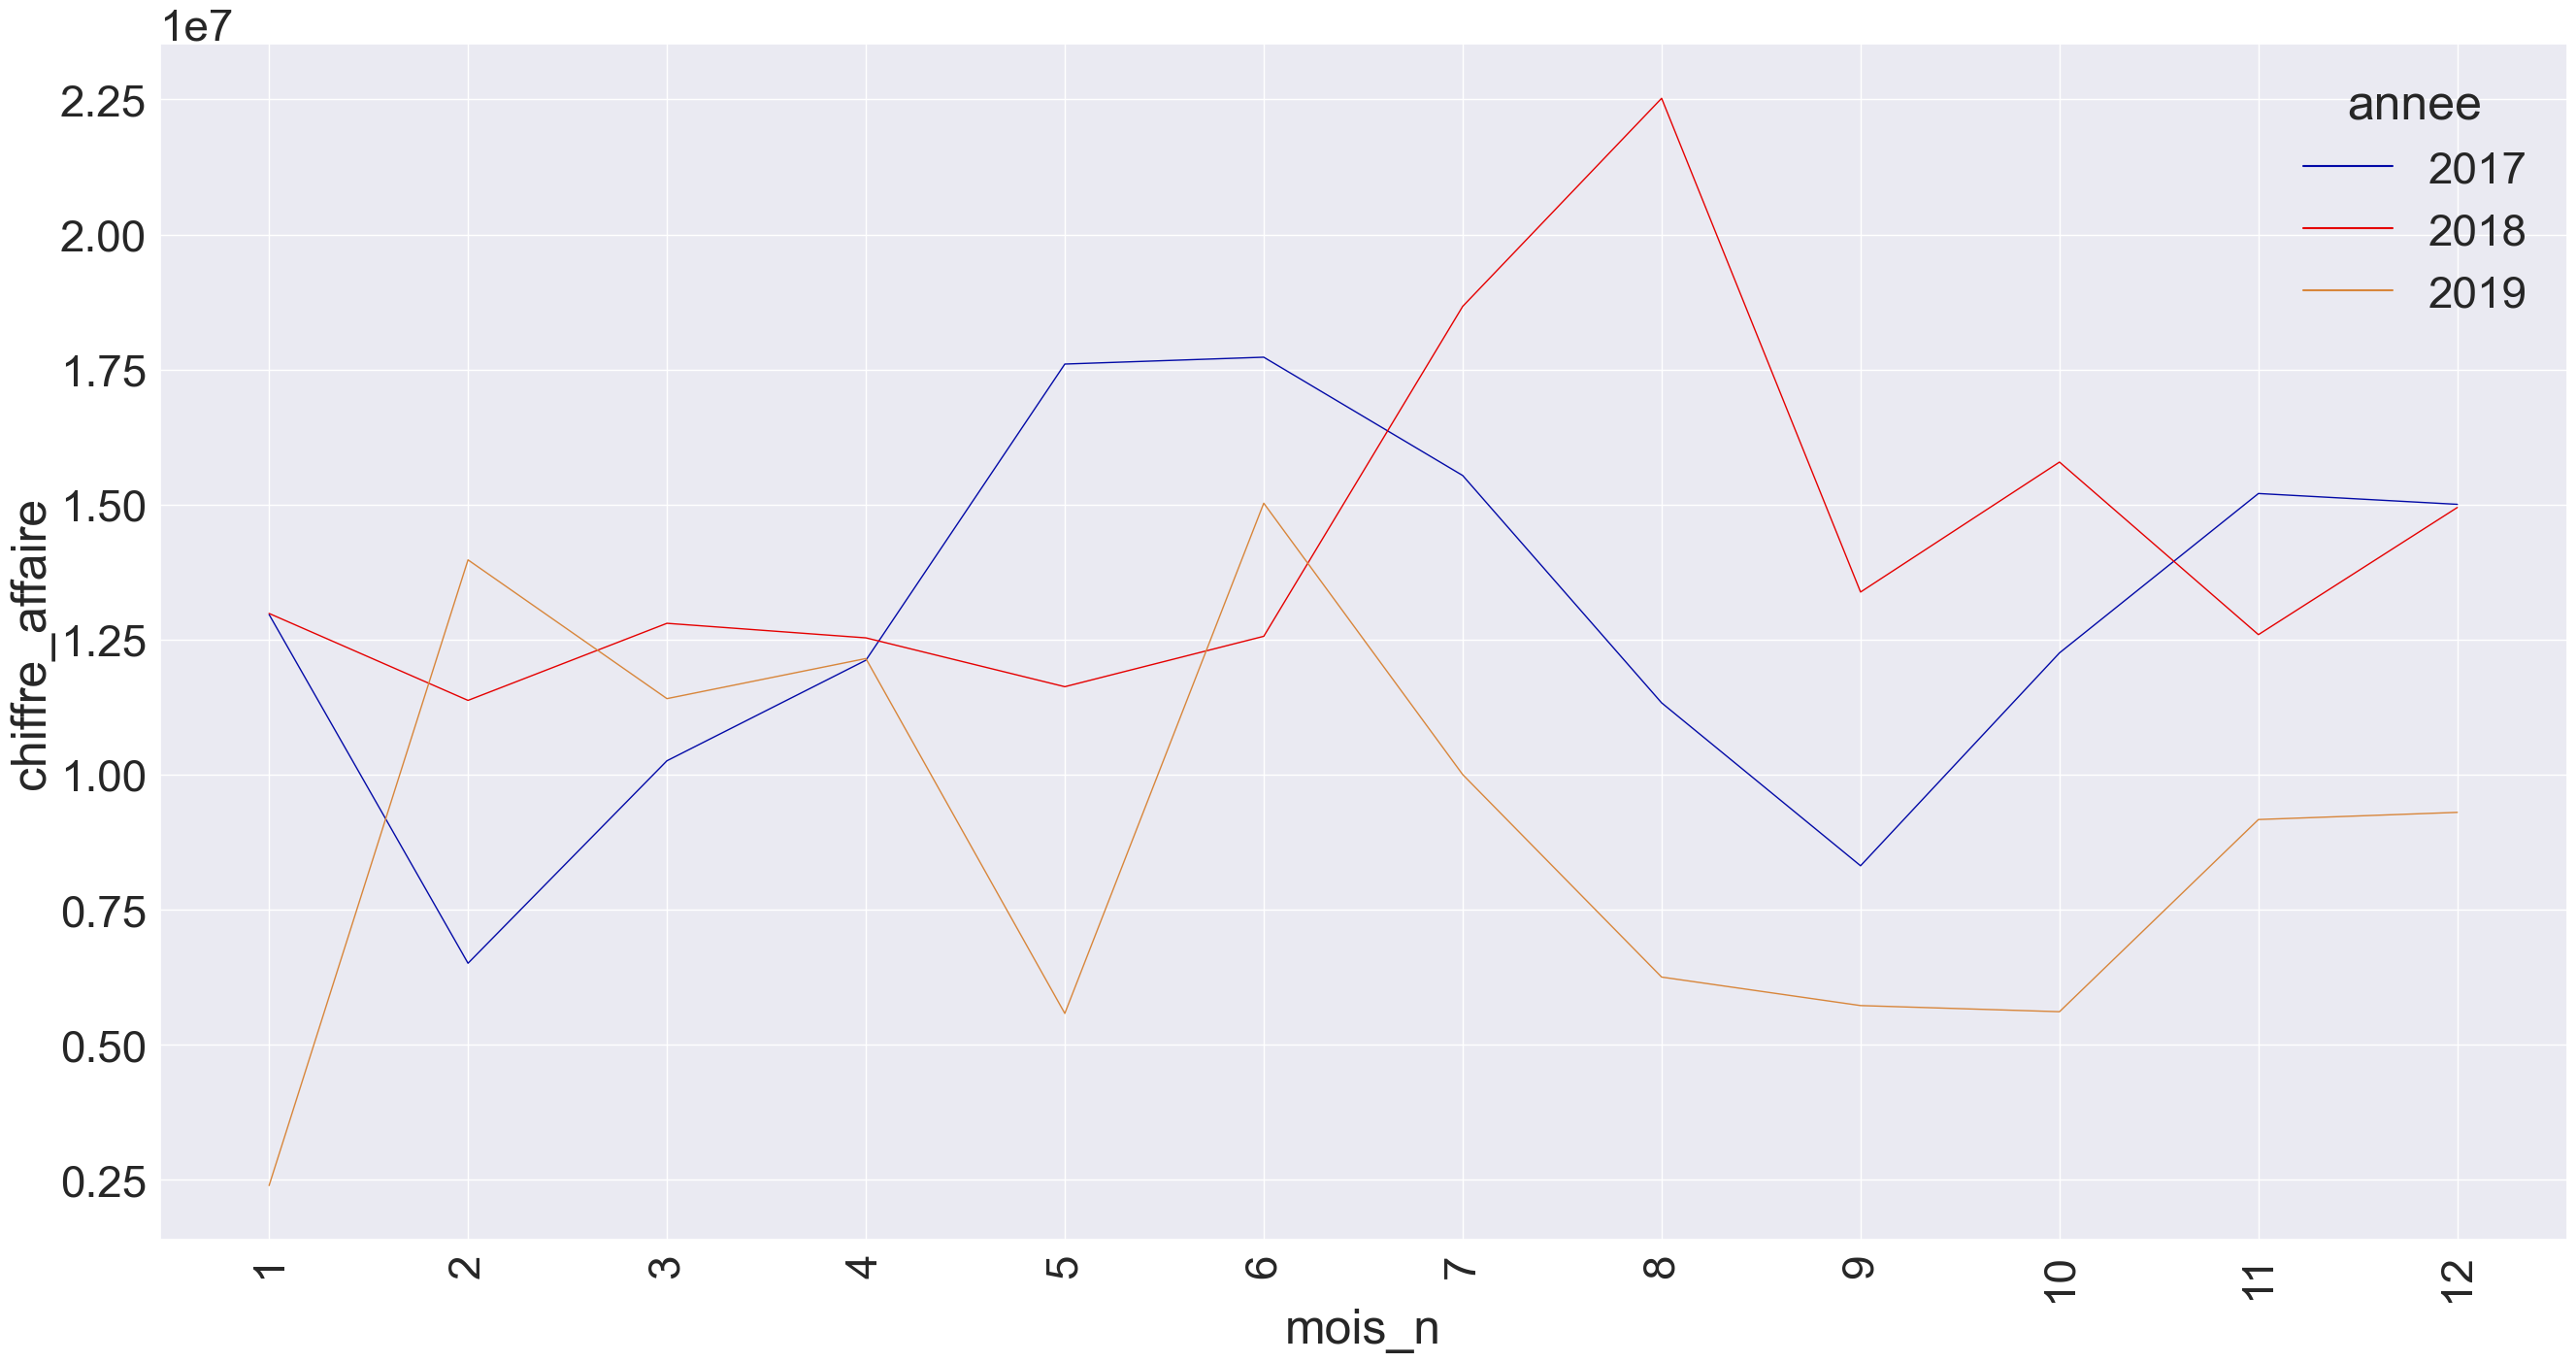

In [15]:
donnees1['mois_n'] = donnees1['mois_n'].astype('str')

plt.figure(figsize=(32,16))

ax = sns.lineplot(x  ='mois_n',
                  y  ='chiffre_affaire',
                  hue='annee',             
                  data=donnees1, 
                  estimator=None, 
                  lw=1, 
                  ci=None, 
                  palette= palette);
ax.set_xticklabels(donnees1.mois_n,rotation=90);

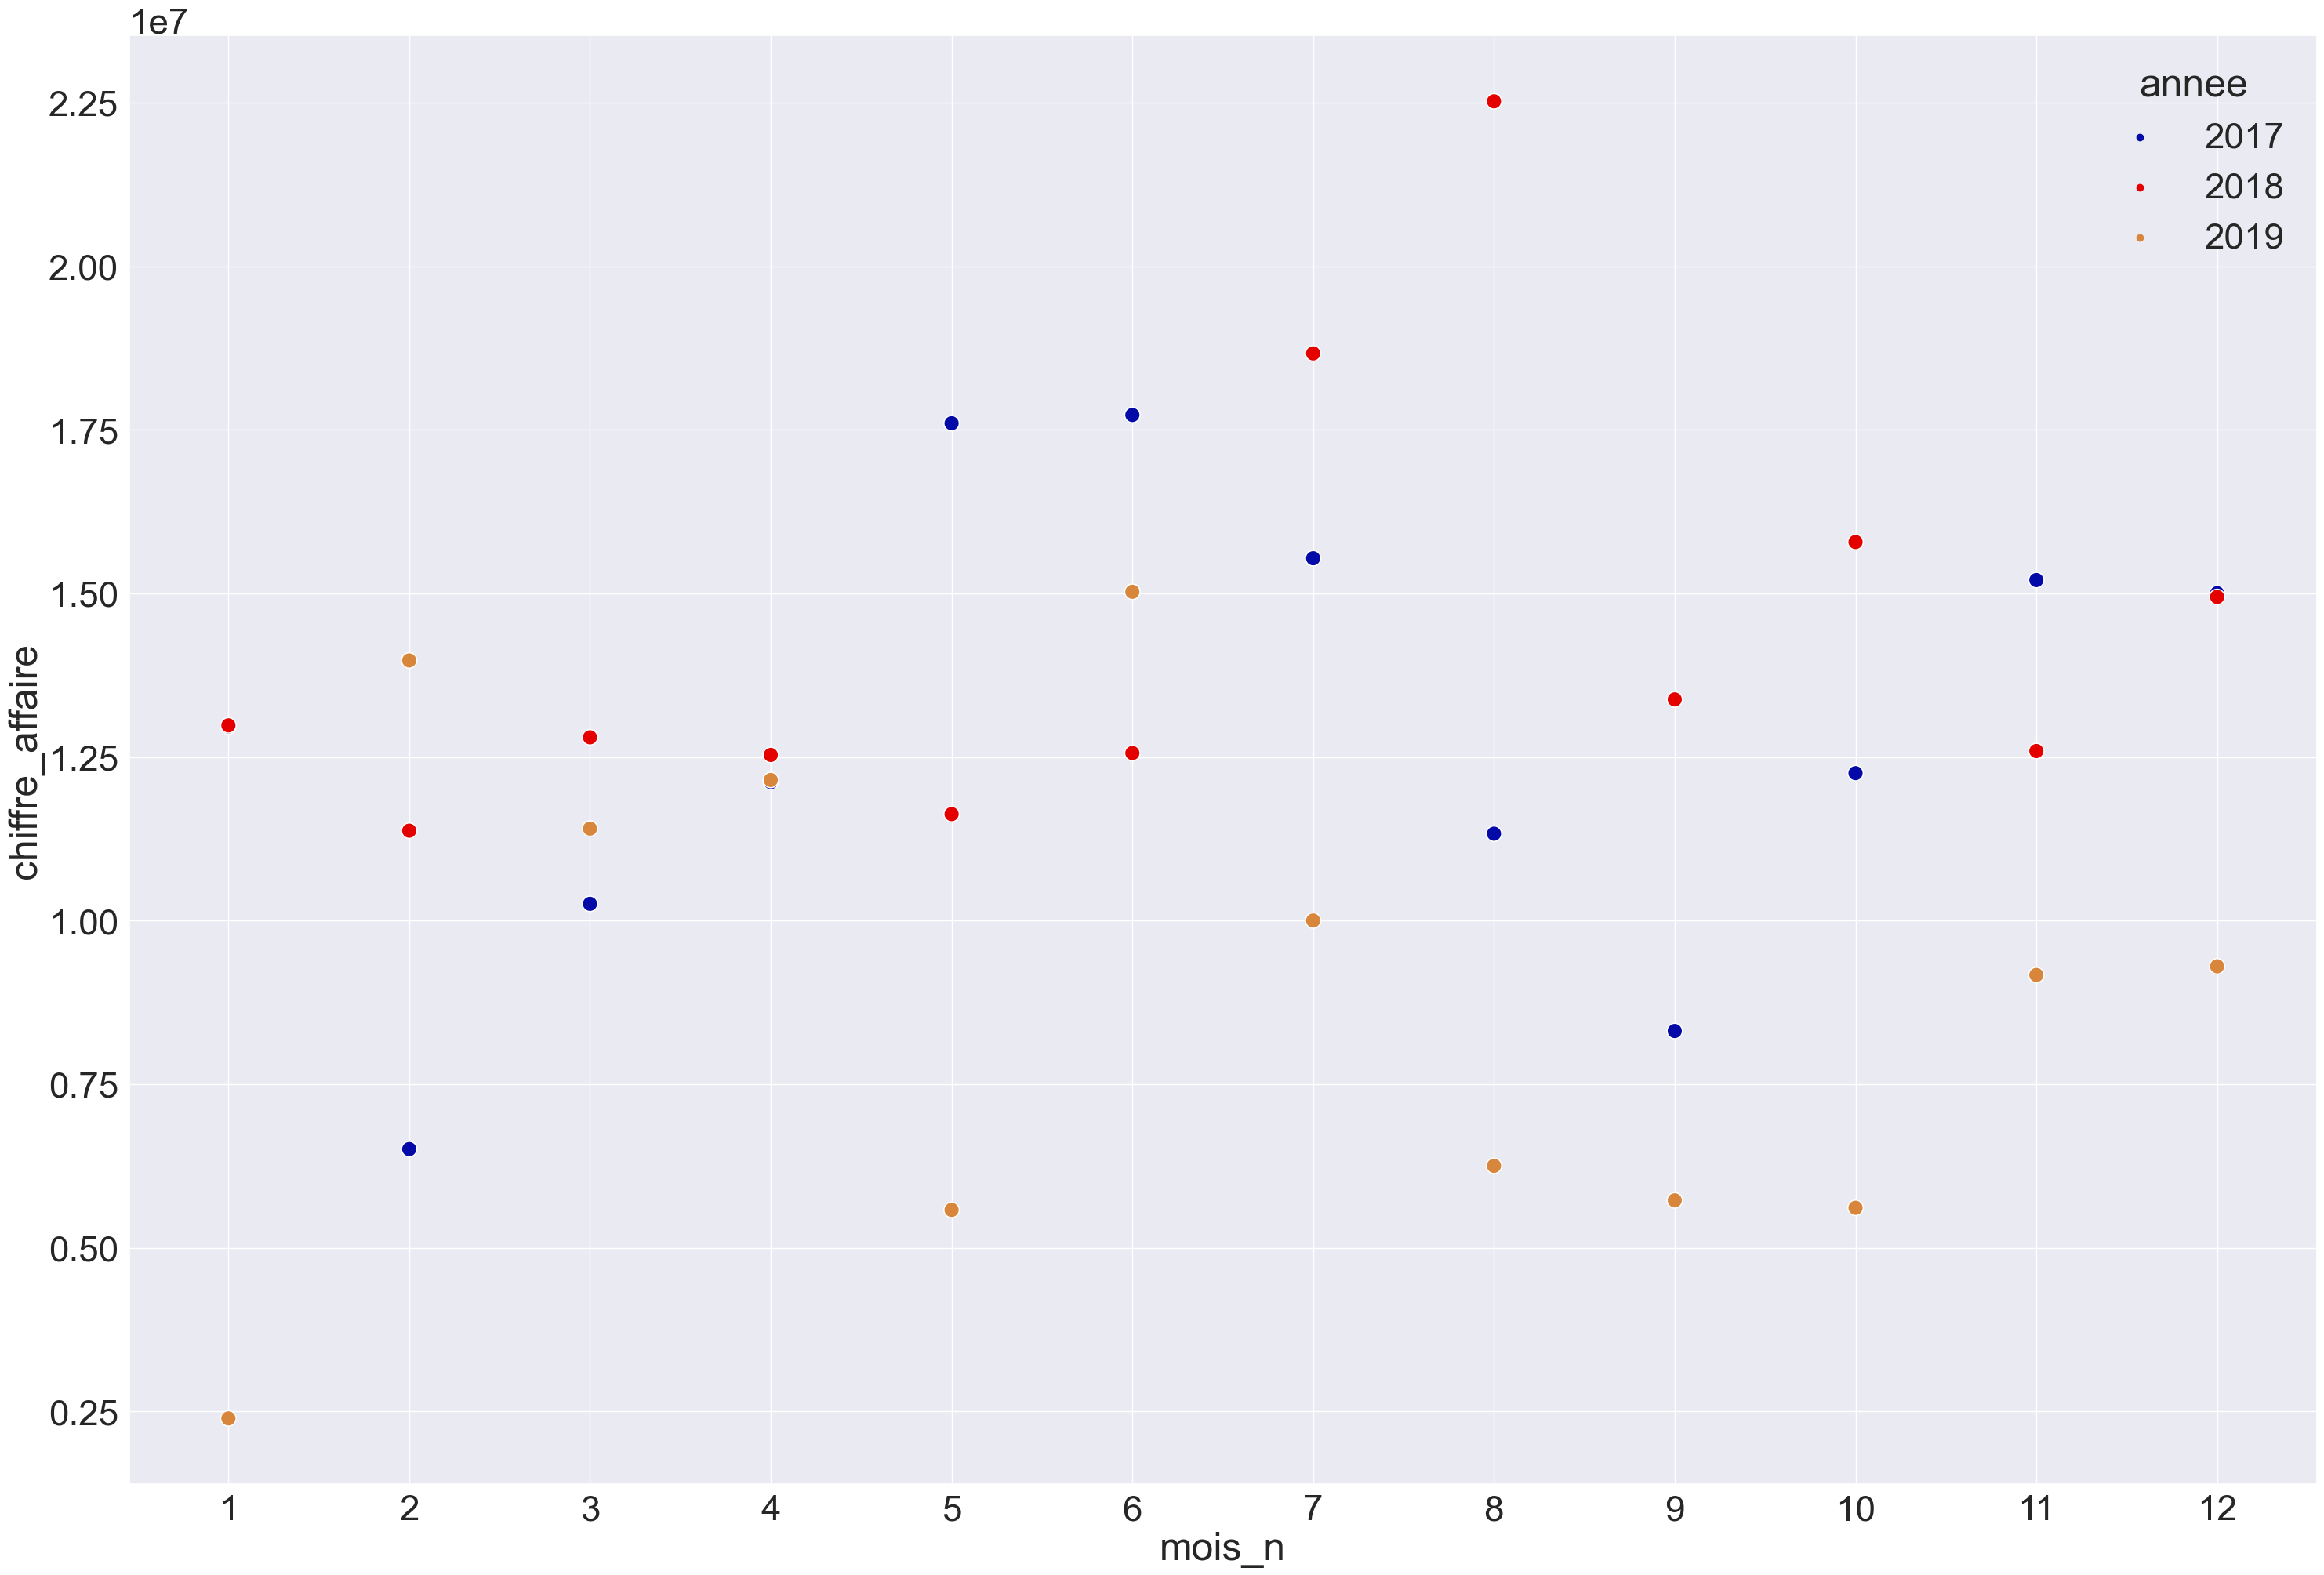

In [16]:
plt.figure(figsize=(36,24))
sns.scatterplot(x     = 'mois_n',
                y     = 'chiffre_affaire',
                hue   = 'annee', 
                data  = donnees1,
                s     = 200,
                palette= palette,
                );

In [17]:
donnees1['mois_n'] = donnees1['mois_n'].astype('int64')

donnees1.assign(
                 annee_mois = donnees1.annee.astype('str')+donnees1.mois_n.apply(lambda x:f'{x:02d}')
                ).groupby(
                          ['annee_mois']
                         ).agg(
                               {'chiffre_affaire':['sum']
                                 }).head(10)

chiffre_affaire
                       sum
annee_mois                
201701          12965713.0
201702           6509138.5
201703          10257437.0
201704          12118493.0
201705          17601532.0
201706          17728428.0
201707          15538291.0
201708          11329604.0
201709           8313807.0
201710          12254613.0

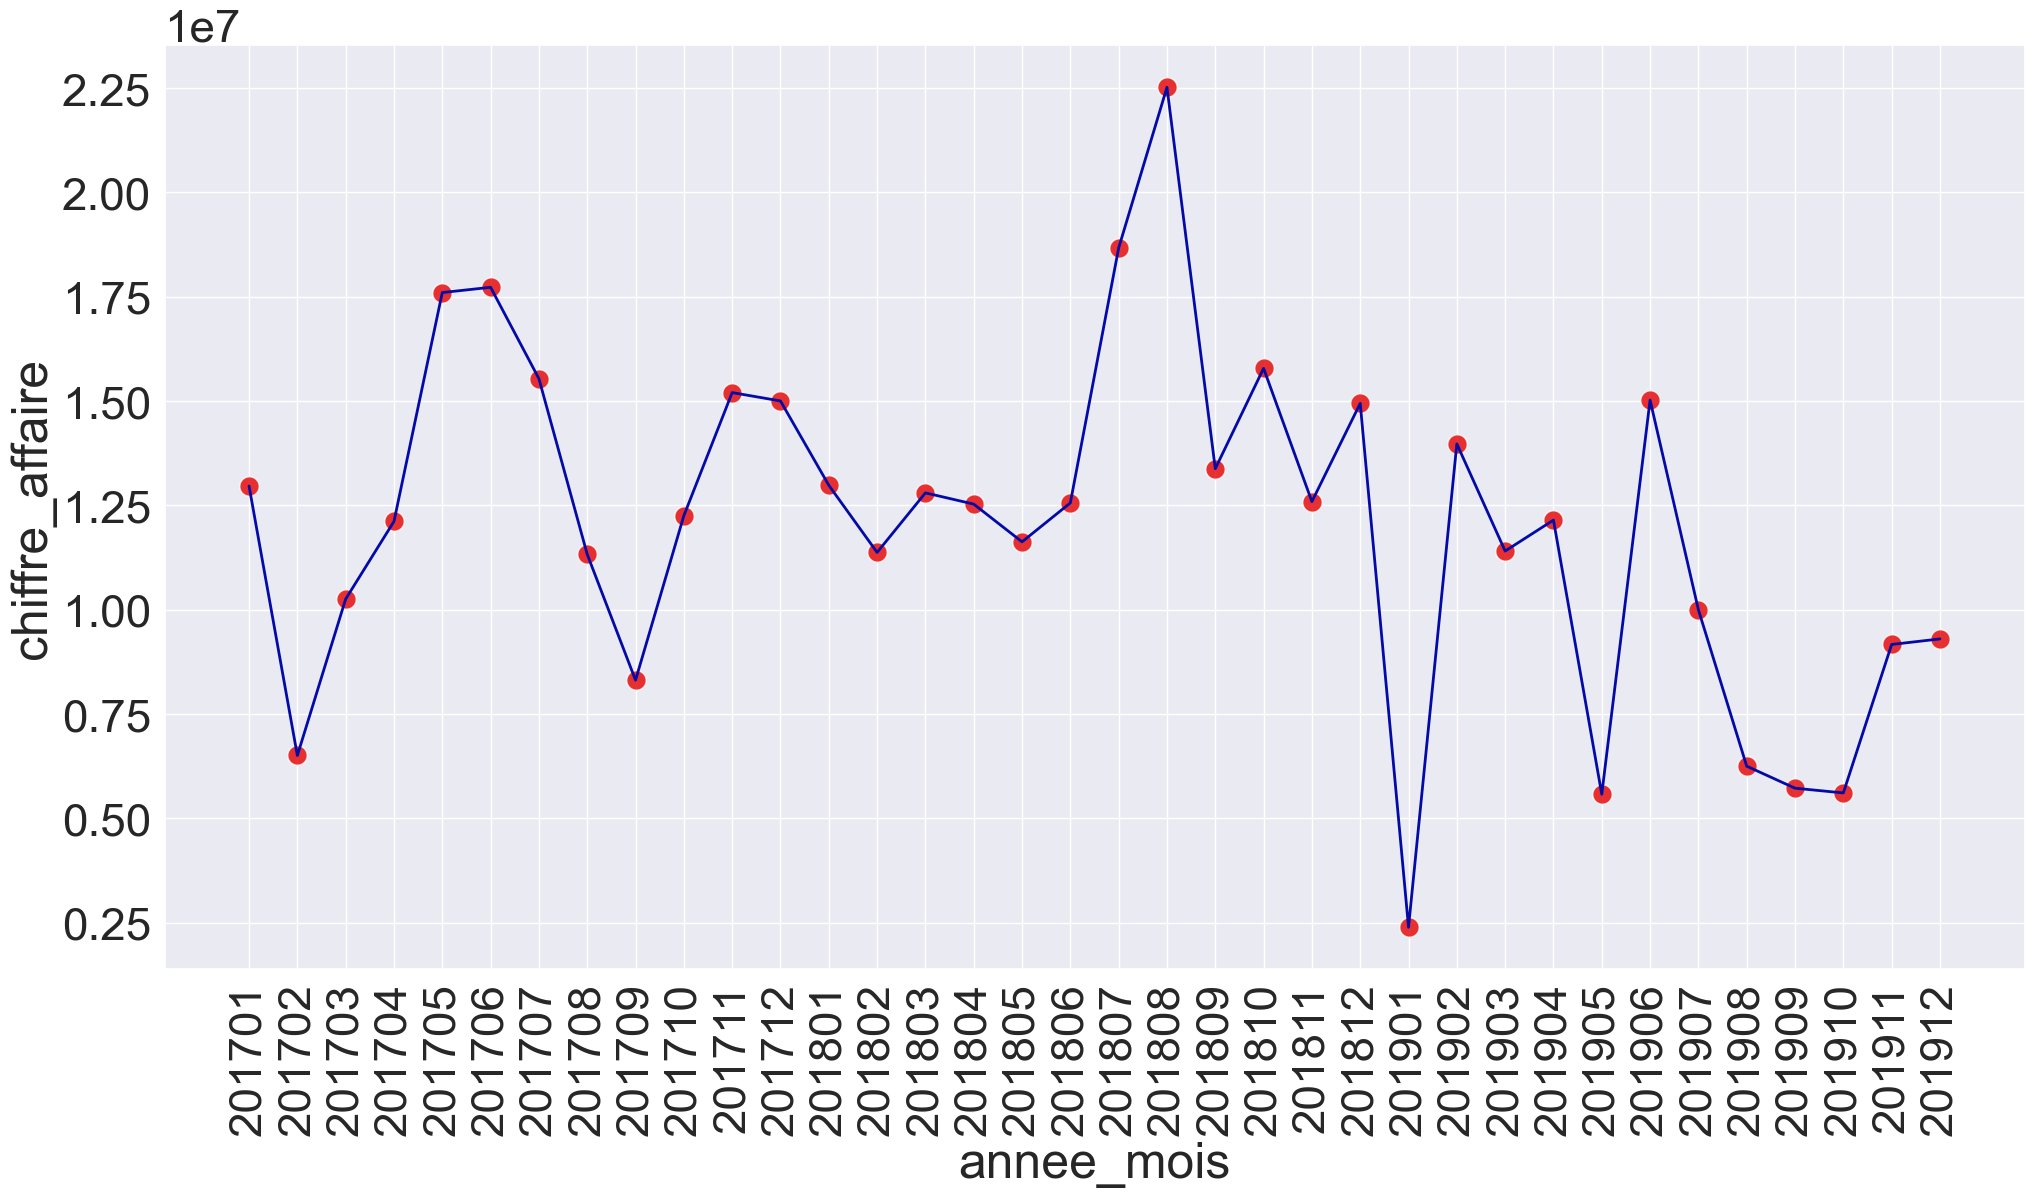

In [18]:
calcul = donnees1.assign(
                 annee_mois = donnees1.annee.astype('str')+donnees1.mois_n.apply(lambda x:f'{x:02d}')
                ).groupby(
                          ['annee_mois']
                         ).agg(
                               {'chiffre_affaire':['sum']
                                 }).reset_index()
calcul.columns = ['annee_mois','chiffre_affaire']


plt.figure(figsize=(24,12))

graph = sns.lineplot( x         = "annee_mois", 
                      y         = "chiffre_affaire", 
                      data      = calcul, 
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
#                       label     = nom,
                      color     = palette[0])
sns.scatterplot( x     = "annee_mois", 
                     y     = "chiffre_affaire", 
                     data  = calcul, 
                             alpha =  0.8,   
                     s     = 200,
        #              ci    = None, 
                     color = palette[1],
                     ax    = graph,
                         );
                             
    
graph.set_xticklabels(calcul.annee_mois,rotation=90);

In [19]:
donnees1.groupby(['annee','mois_n']).agg({'sum_port':['sum','mean']}).head(15)

sum_port               
                        sum           mean
annee mois_n                              
2017  1       150700.500000  150700.500000
      2        75204.796875   75204.796875
      3       116188.796875  116188.796875
      4       136826.906250  136826.906250
      5       196470.500000  196470.500000
      6       206476.000000  206476.000000
      7       176060.593750  176060.593750
      8       124401.703125  124401.703125
      9        99043.601562   99043.601562
      10      141773.906250  141773.906250
      11      175516.593750  175516.593750
      12      174754.296875  174754.296875
2018  1       146094.203125  146094.203125
      2       118666.703125  118666.703125
      3       153302.500000  153302.500000

In [20]:
donnees1['mois_n'] = donnees1['mois_n'].astype('int64')

donnees1.assign(
                 annee_mois = donnees1.annee.astype('str')+donnees1.mois_n.apply(lambda x:f'{x:02d}')
                ).groupby(
                          ['annee_mois']
                         ).agg(
                               {'sum_port':['sum']
                                 }).head(10)

sum_port
                      sum
annee_mois               
201701      150700.500000
201702       75204.796875
201703      116188.796875
201704      136826.906250
201705      196470.500000
201706      206476.000000
201707      176060.593750
201708      124401.703125
201709       99043.601562
201710      141773.906250

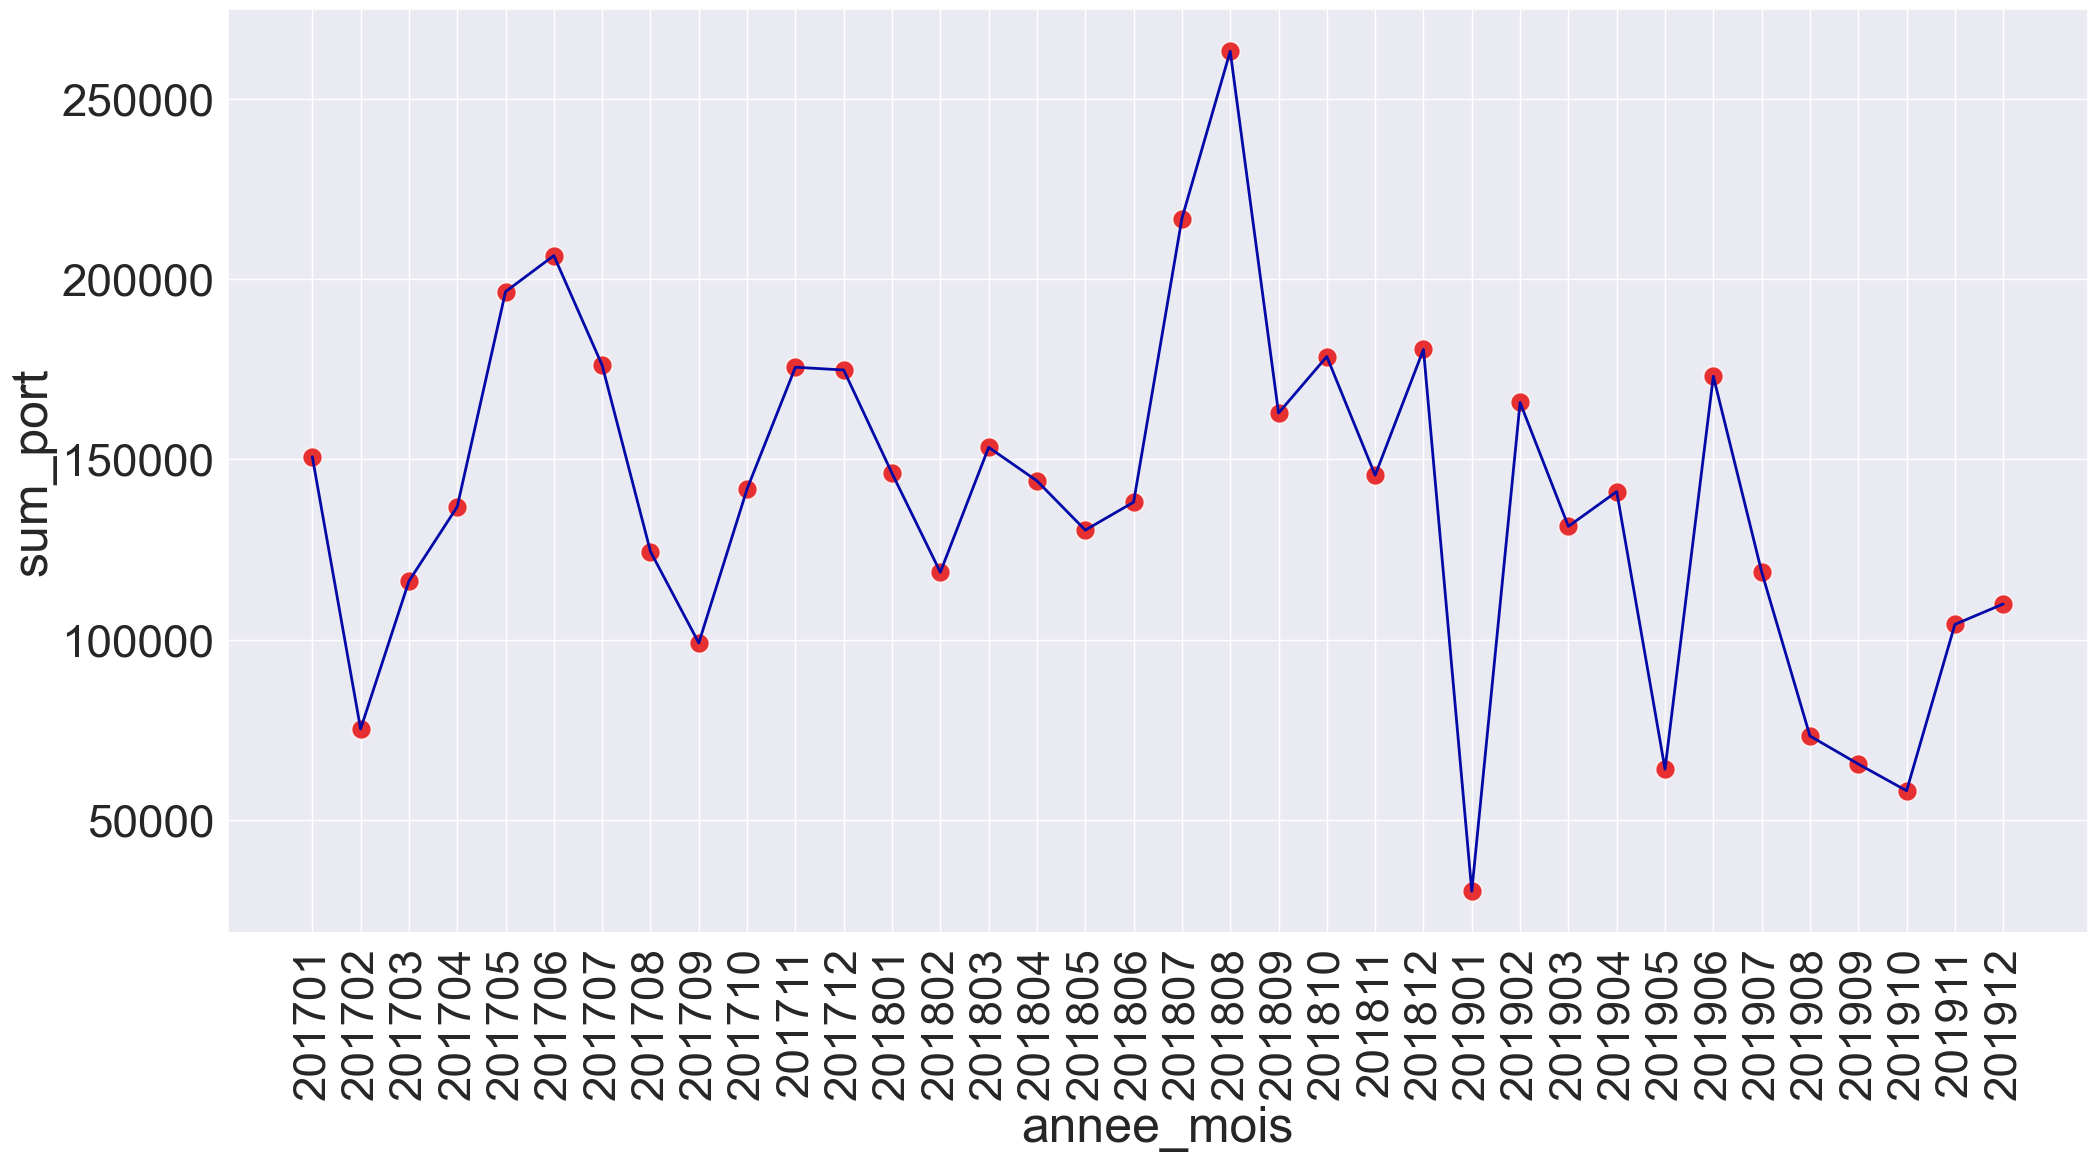

In [21]:
calcul = donnees1.assign(
                 annee_mois = donnees1.annee.astype('str')+donnees1.mois_n.apply(lambda x:f'{x:02d}')
                ).groupby(
                          ['annee_mois']
                         ).agg(
                               {'sum_port':['sum']
                                 }).reset_index()
calcul.columns = ['annee_mois','sum_port']


plt.figure(figsize=(24,12))

graph = sns.lineplot( x         = "annee_mois", 
                      y         = "sum_port", 
                      data      = calcul, 
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
#                       label     = nom,
                      color     = palette[0])
sns.scatterplot( x     = "annee_mois", 
                     y     = "sum_port", 
                     data  = calcul, 
                             alpha =  0.8,   
                     s     = 200,
        #              ci    = None, 
                     color = palette[1],
                     ax    = graph,
                         );
                             
    
graph.set_xticklabels(calcul.annee_mois,rotation=90);

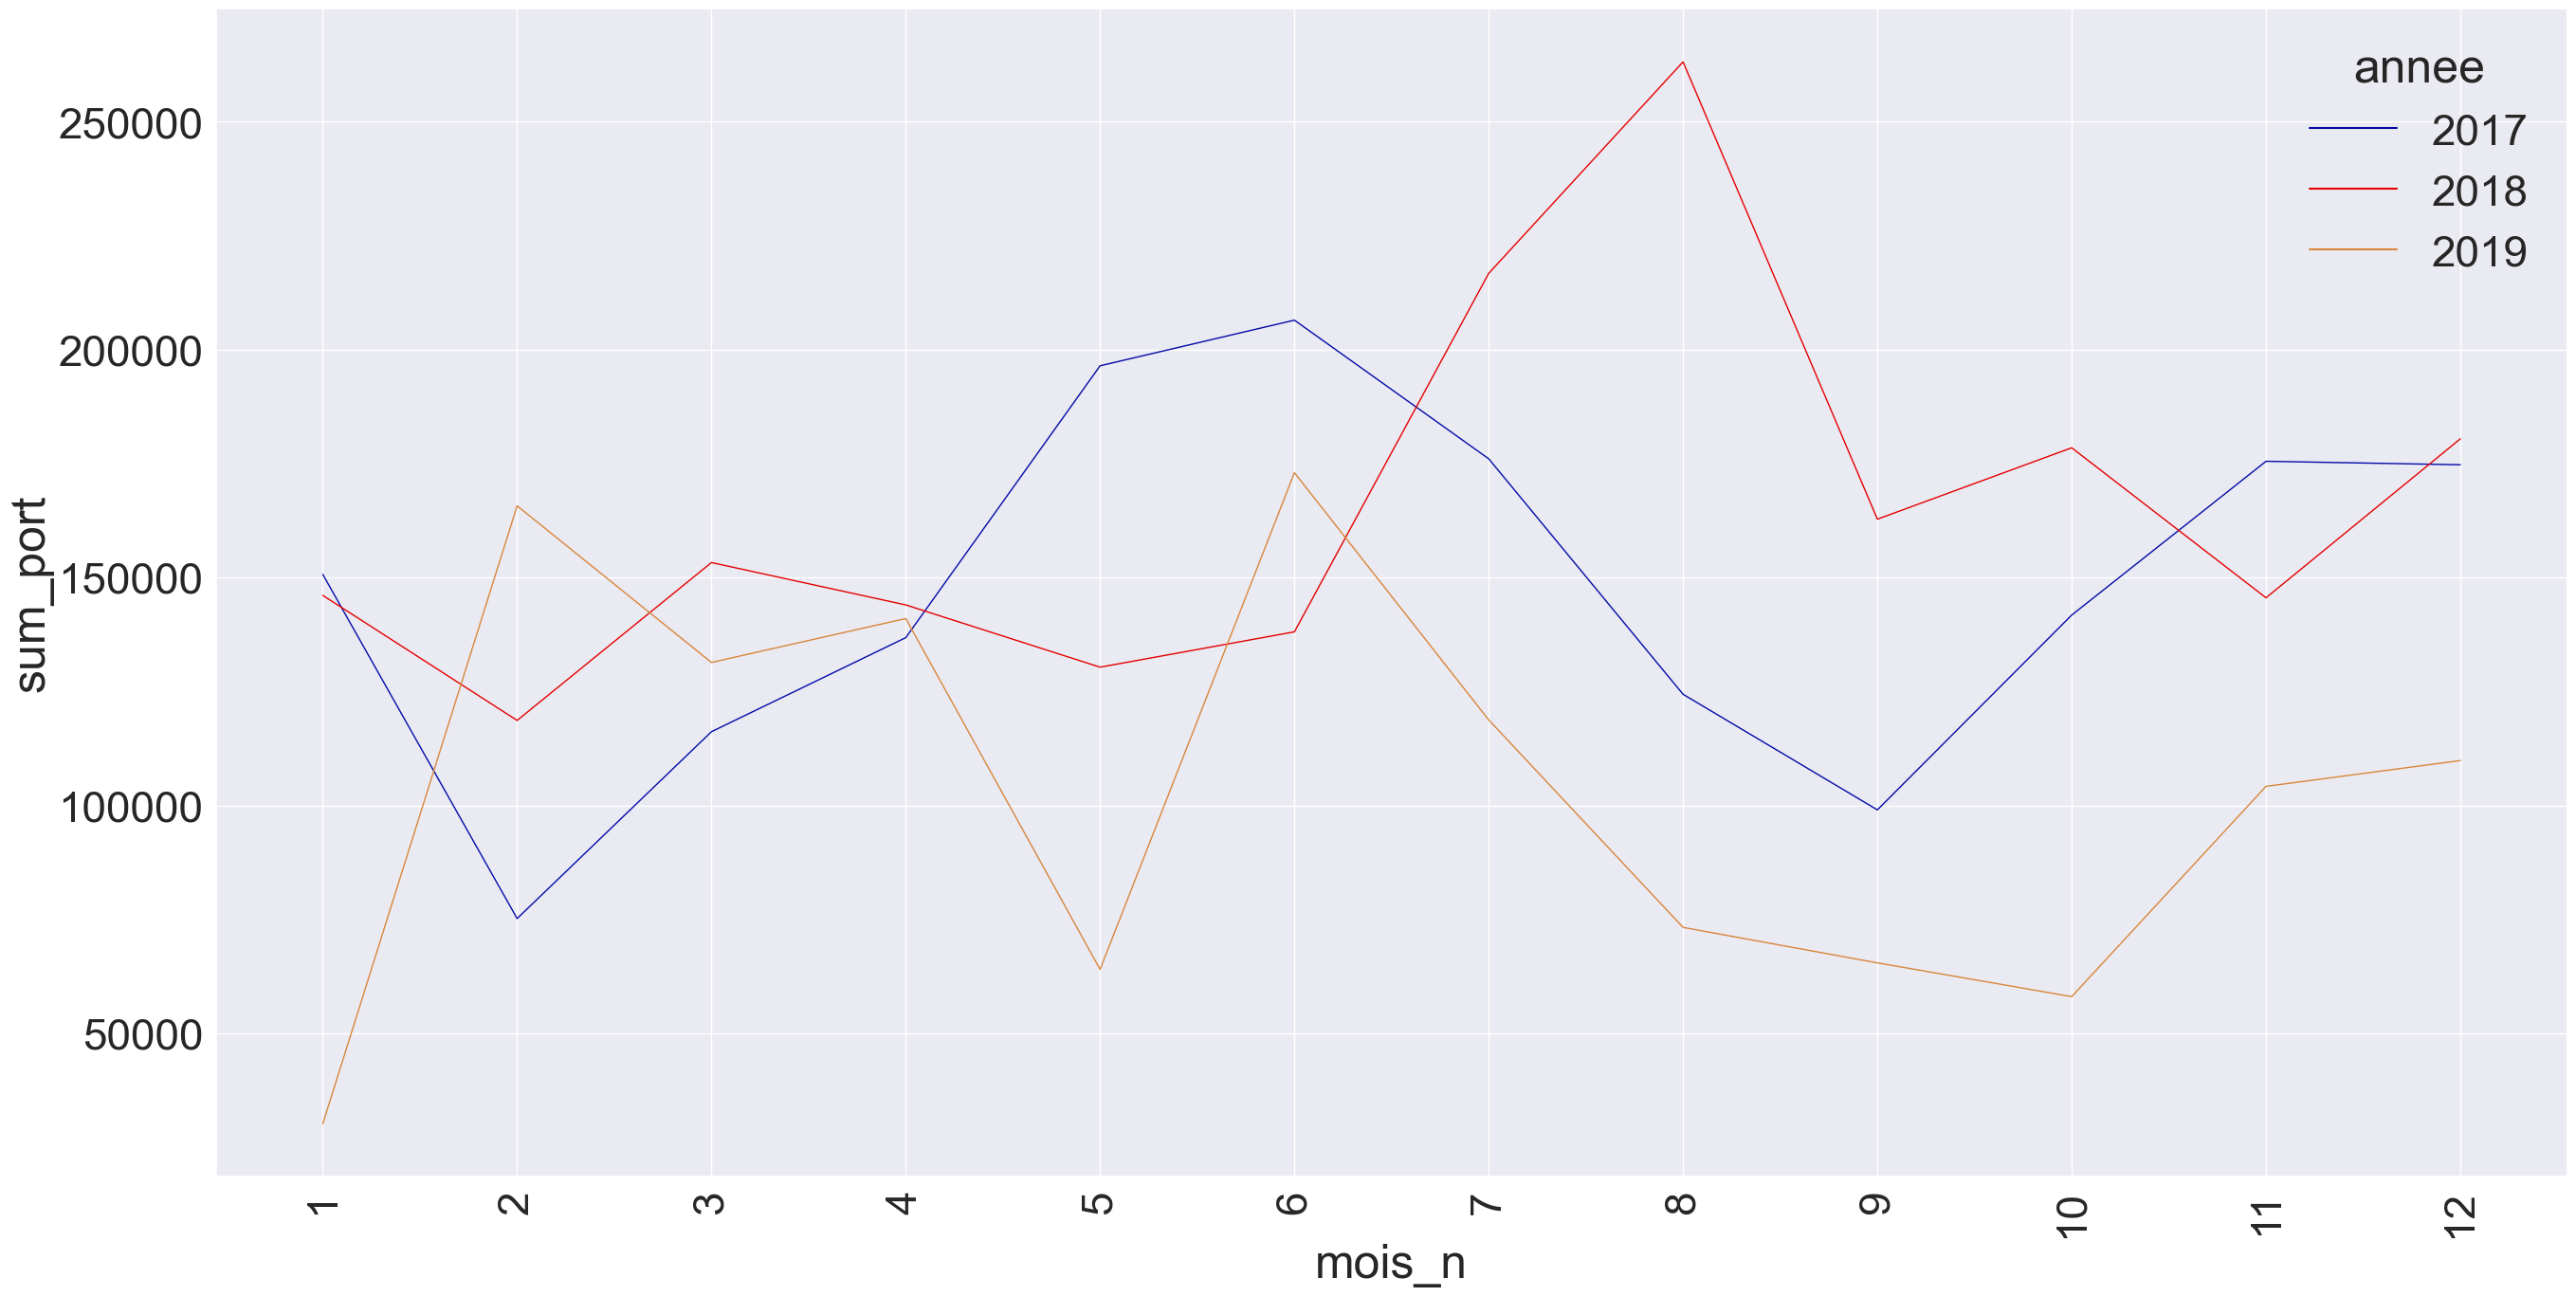

In [22]:
donnees1['mois_n'] = donnees1['mois_n'].astype('str')

plt.figure(figsize=(32,16))

ax = sns.lineplot(x  ='mois_n',
                  y  ='sum_port',
                  hue='annee',             
                  data=donnees1, 
                  estimator=None, 
                  lw=1, 
                  ci=None, 
                  palette= palette);
ax.set_xticklabels(donnees1.mois_n,rotation=90);

In [23]:
donnees1.groupby(['annee','mois_n']).agg({'sum_quantite':['sum','mean']}).head(15)

sum_quantite          
                      sum      mean
annee mois_n                       
2017  1            219340  219340.0
      10           209689  209689.0
      11           256868  256868.0
      12           253737  253737.0
      2            109482  109482.0
      3            173791  173791.0
      4            206080  206080.0
      5            298248  298248.0
      6            296283  296283.0
      7            261972  261972.0
      8            195111  195111.0
      9            140193  140193.0
2018  1            220103  220103.0
      10           265018  265018.0
      11           210577  210577.0

In [24]:
donnees1['mois_n'] = donnees1['mois_n'].astype('int64')

donnees1.assign(
                 annee_mois = donnees1.annee.astype('str')+donnees1.mois_n.apply(lambda x:f'{x:02d}')
                ).groupby(
                          ['annee_mois']
                         ).agg(
                               {'sum_quantite':['sum']
                                 }).head(10)

sum_quantite
                    sum
annee_mois             
201701           219340
201702           109482
201703           173791
201704           206080
201705           298248
201706           296283
201707           261972
201708           195111
201709           140193
201710           209689

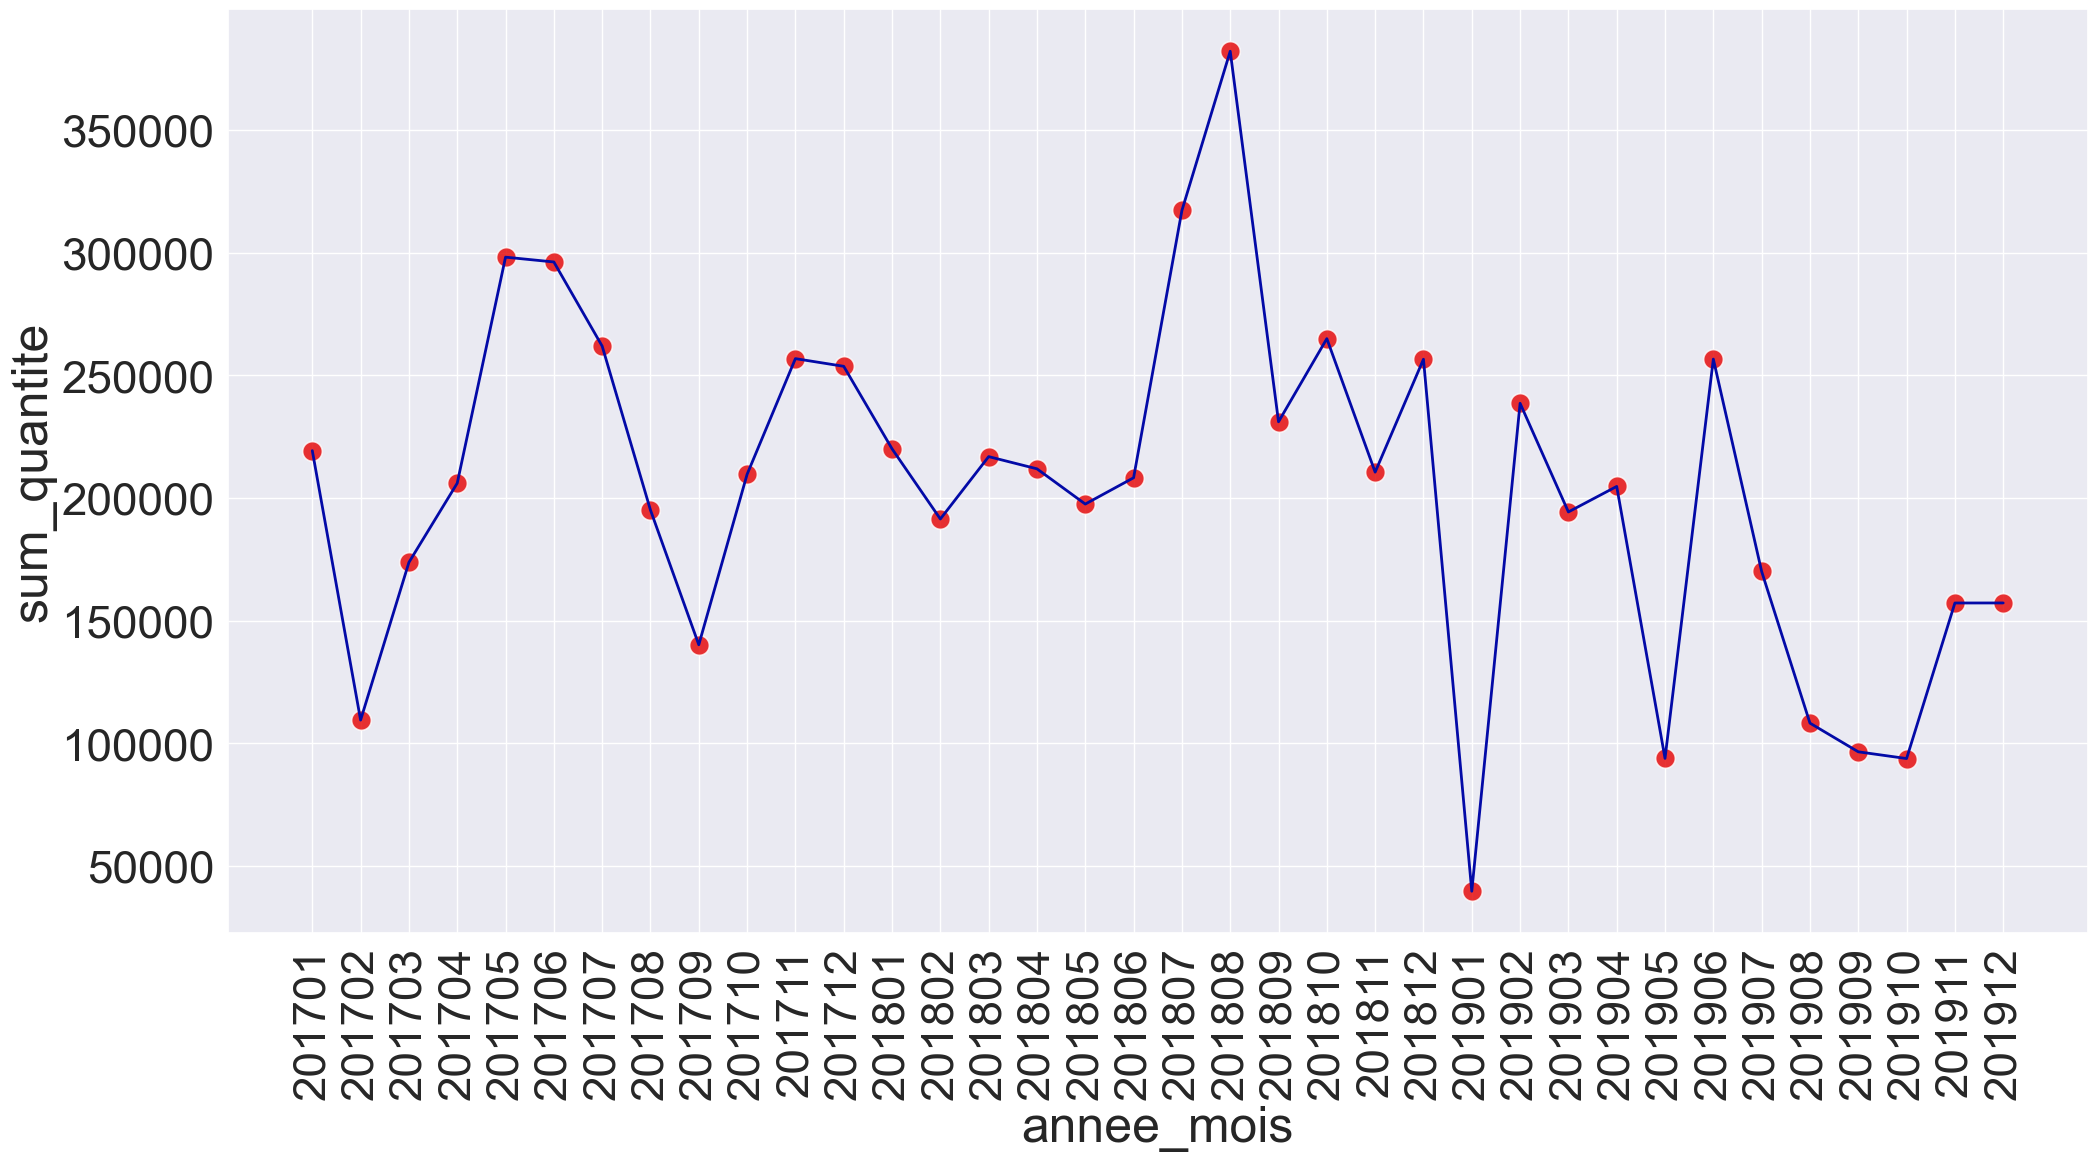

In [25]:
calcul = donnees1.assign(
                 annee_mois = donnees1.annee.astype('str')+donnees1.mois_n.apply(lambda x:f'{x:02d}')
                ).groupby(
                          ['annee_mois']
                         ).agg(
                               {'sum_quantite':['sum']
                                 }).reset_index()
calcul.columns = ['annee_mois','sum_quantite']


plt.figure(figsize=(24,12))

graph = sns.lineplot( x         = "annee_mois", 
                      y         = "sum_quantite", 
                      data      = calcul, 
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
#                       label     = nom,
                      color     = palette[0])
sns.scatterplot( x     = "annee_mois", 
                     y     = "sum_quantite", 
                     data  = calcul, 
                             alpha =  0.8,   
                     s     = 200,
        #              ci    = None, 
                     color = palette[1],
                     ax    = graph,
                         );
                             
    
graph.set_xticklabels(calcul.annee_mois,rotation=90);

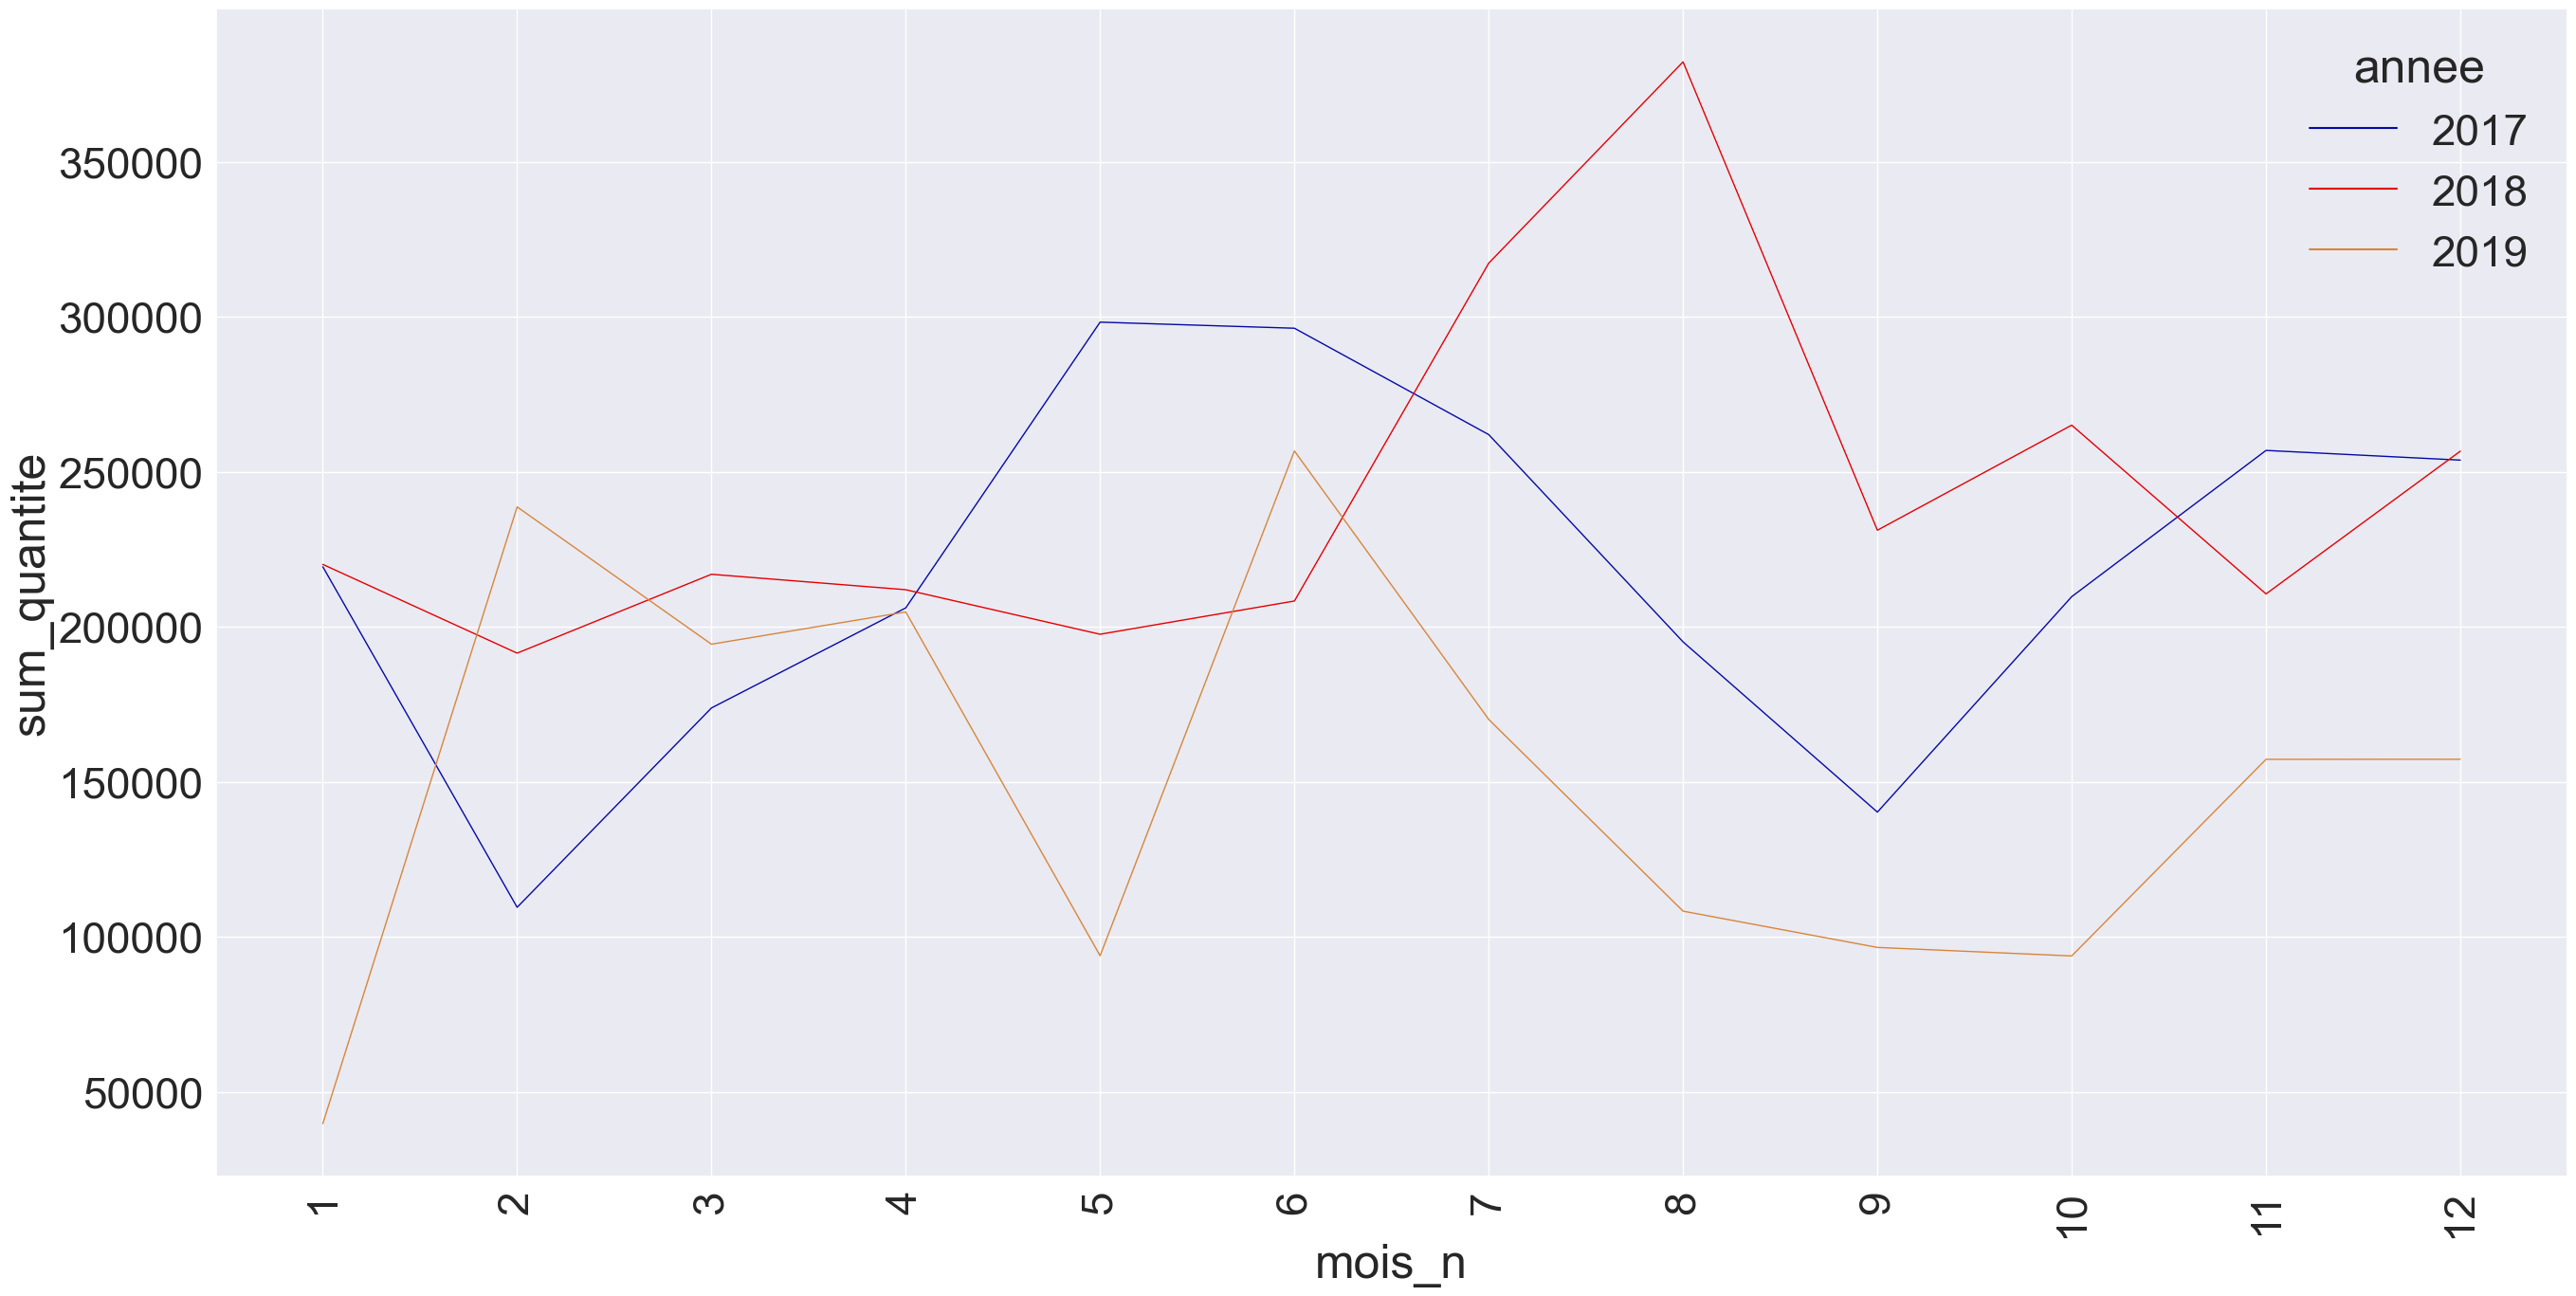

In [26]:
donnees1['mois_n'] = donnees1['mois_n'].astype('str')

plt.figure(figsize=(32,16))

ax = sns.lineplot(x  ='mois_n',
                  y  ='sum_quantite',
                  hue='annee',             
                  data=donnees1, 
                  estimator=None, 
                  lw=1, 
                  ci=None, 
                  palette= palette);
ax.set_xticklabels(donnees1.mois_n,rotation=90);

In [27]:
donnees2 = pd.read_csv("Q2.csv", sep=";" , encoding='cp1252')
donnees2.CHIFFRE_AFFAIRE = donnees2.CHIFFRE_AFFAIRE.apply(lambda x: str(x).replace(',','.')).astype('float32')
donnees2.columns = list(map(lambda x: x.lower(),donnees2.columns))
donnees2.head()

pays  chiffre_affaire  sum_quantite
0      Suède      184468880.0       3128687
1  Argentine      391423264.0       6624579
2    Pologne      125956320.0       2138608
3  Venezuela      433207712.0       7341038
4    Norvège      106613840.0       1801621

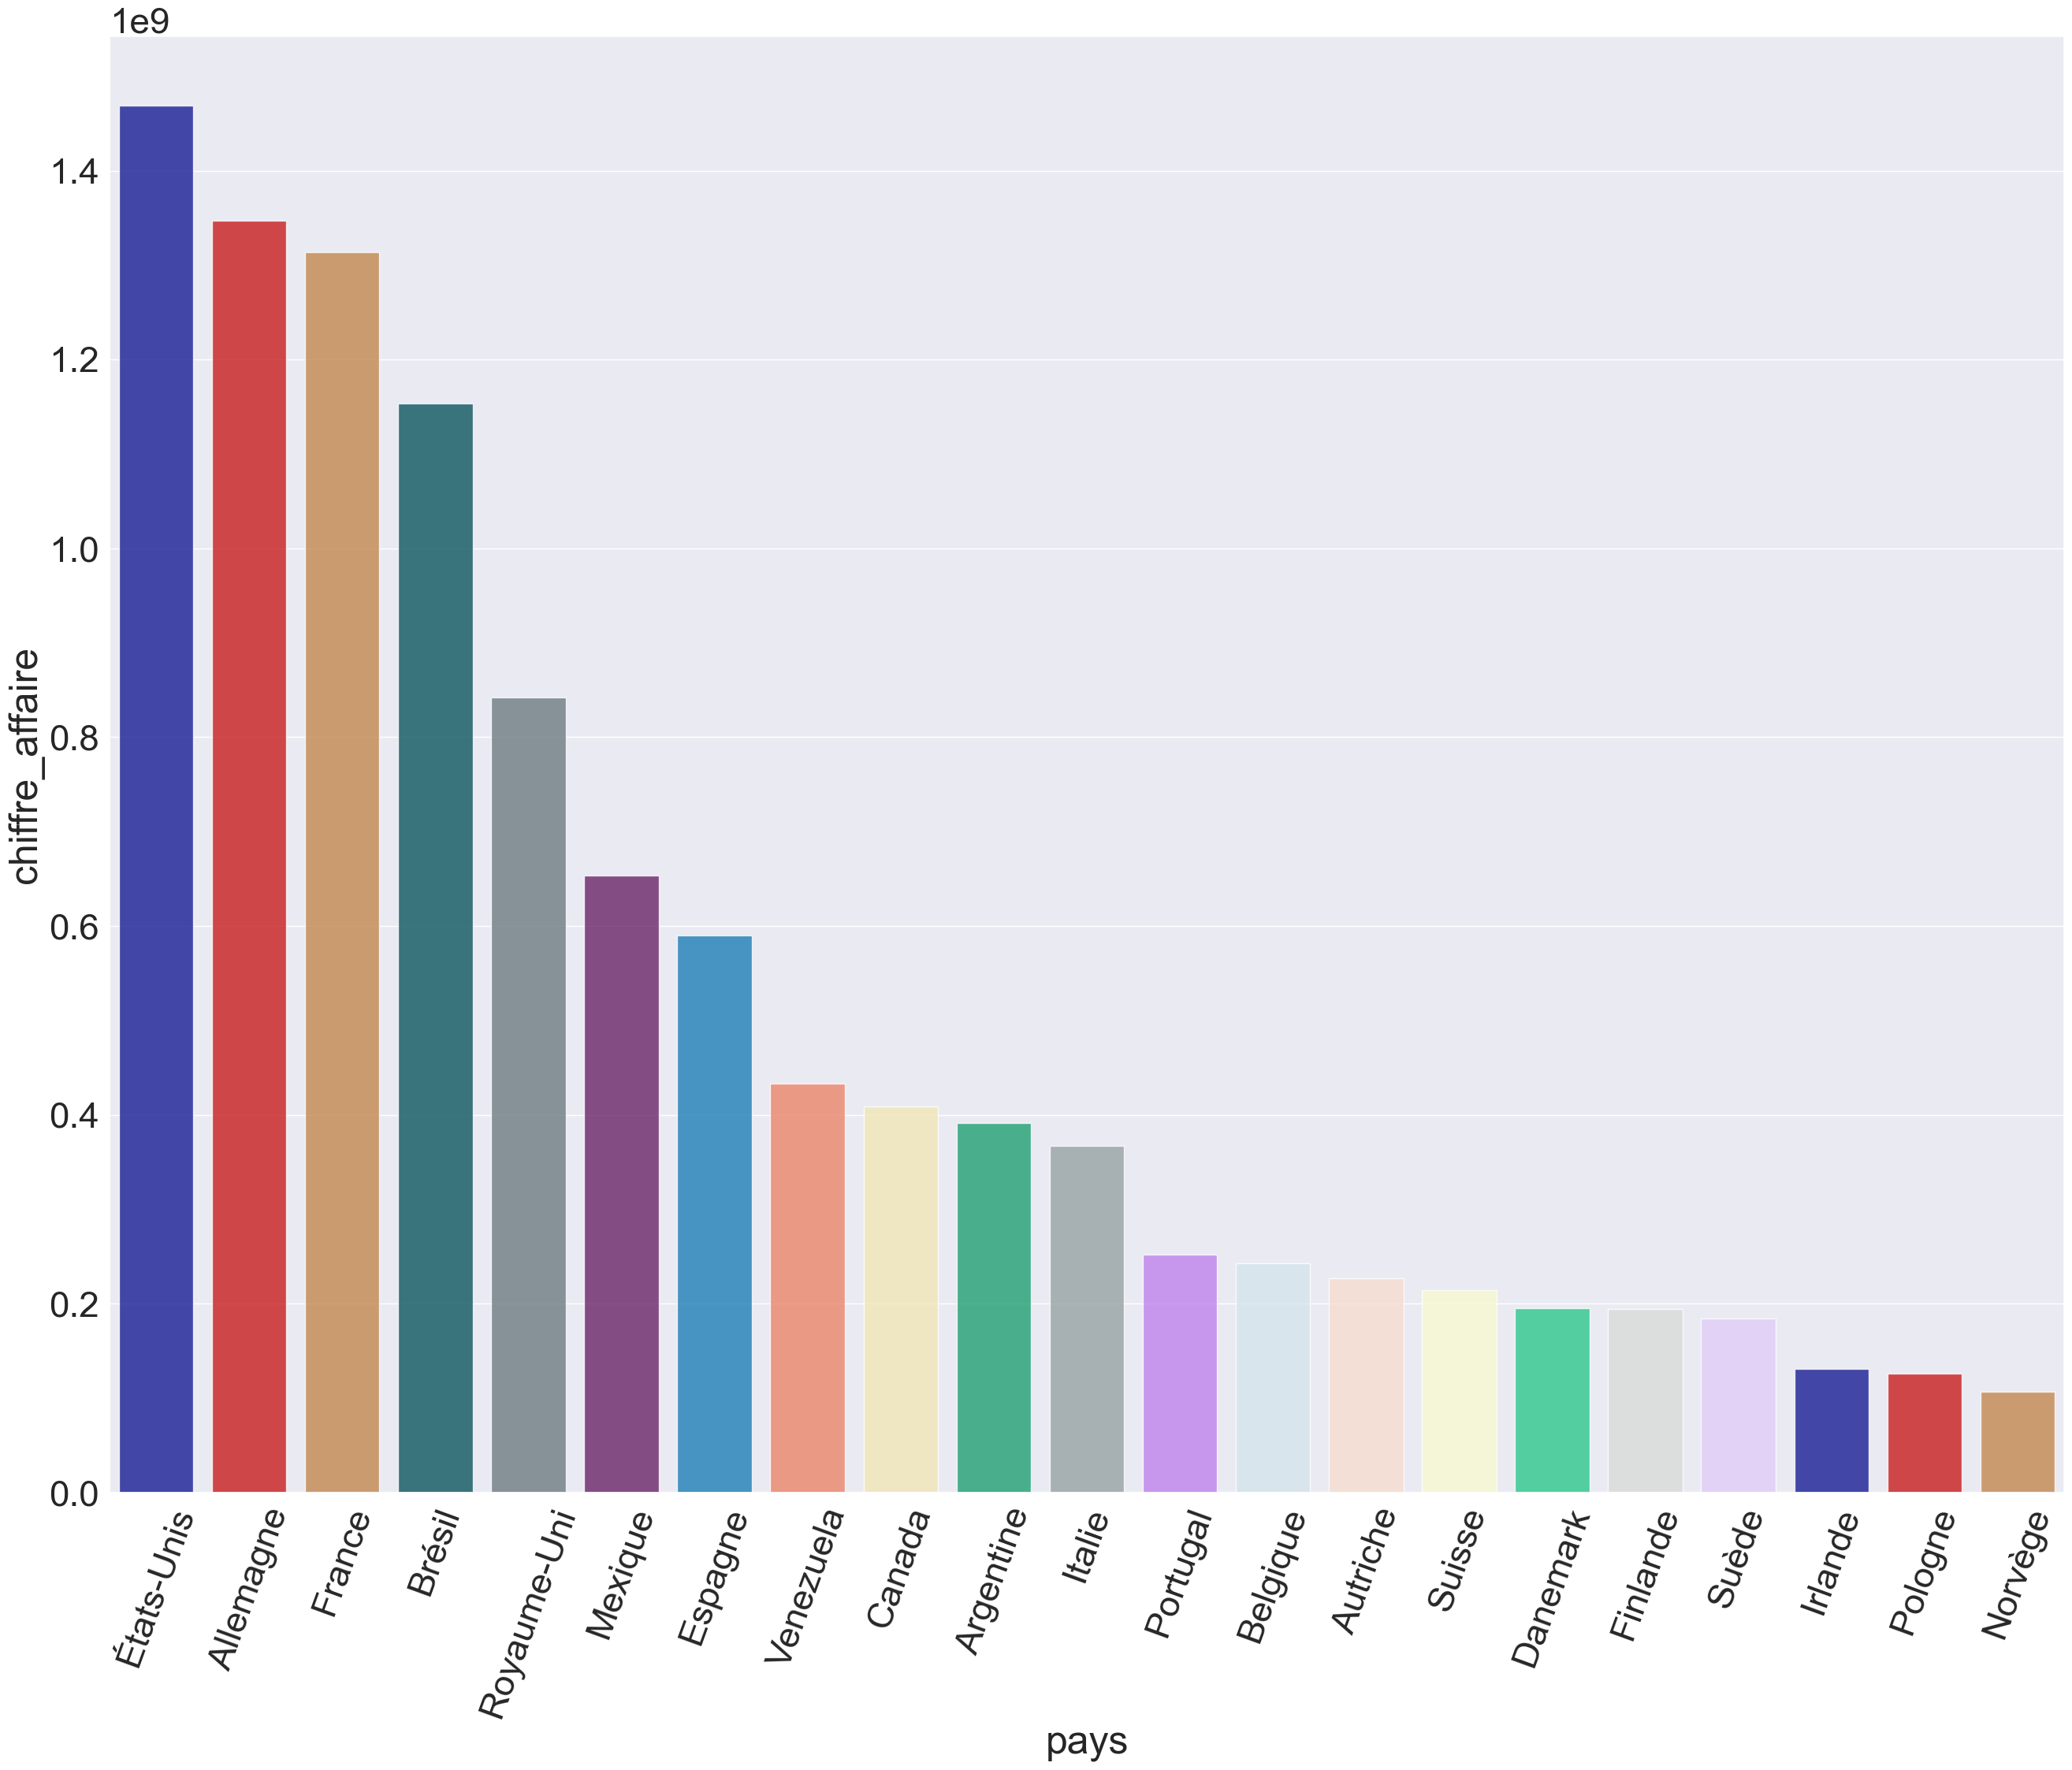

In [28]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='pays',y='chiffre_affaire',data=donnees2.sort_values('chiffre_affaire', ascending=False),palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=70);


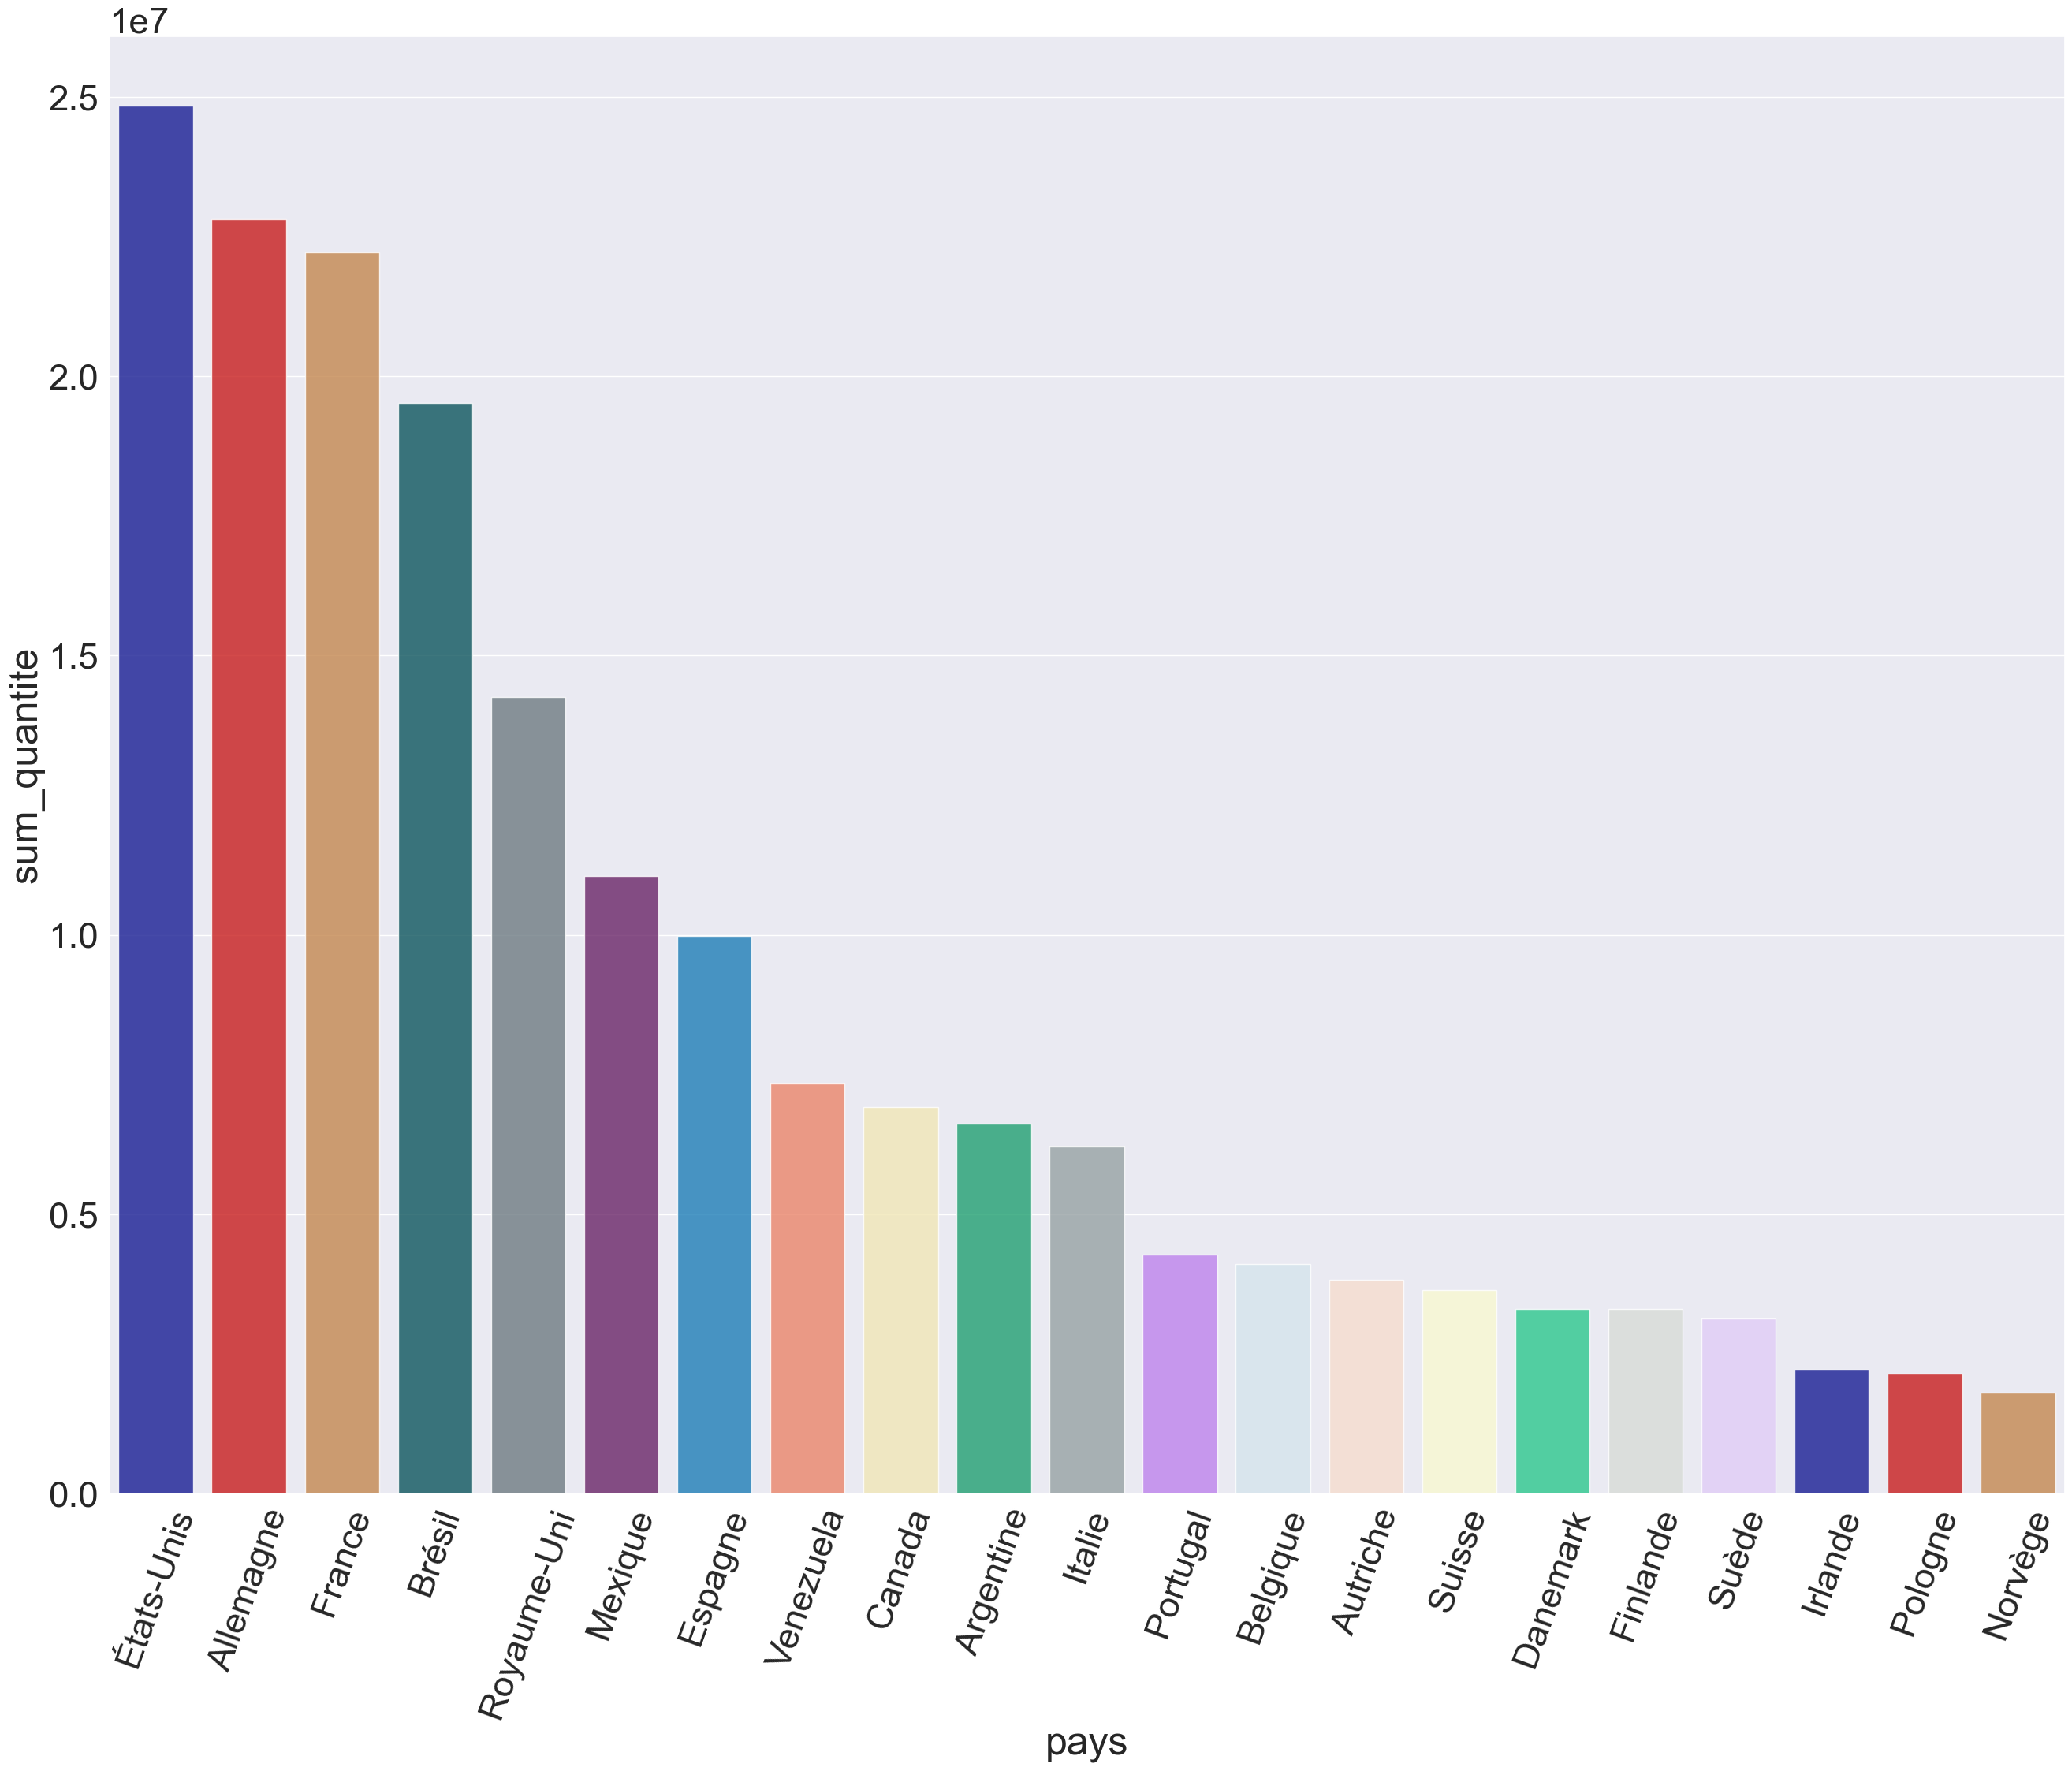

In [29]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='pays',y='sum_quantite',data=donnees2.sort_values('sum_quantite', ascending=False),palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=70);


In [30]:
donnees3 = pd.read_csv("Q3.csv", sep=";" , encoding='cp1252')
donnees3.CHIFFRE_AFFAIRE = donnees3.CHIFFRE_AFFAIRE.apply(lambda x: str(x).replace(',','.')).astype('float32')
donnees3.columns = list(map(lambda x: x.lower(),donnees3.columns))
donnees3.head()

client          acheteur  chiffre_affaire
0      HILARIÓN-Abastos    Charron Barlow       14121242.0
1      HILARIÓN-Abastos  Robbinette Terry       13561846.0
2      LINO-Delicateses    Kelley Woodley       10493349.0
3  GROSELLA-Restaurante       Nary Varden       10851020.0
4      LINO-Delicateses      Valdez Dione       11701685.0

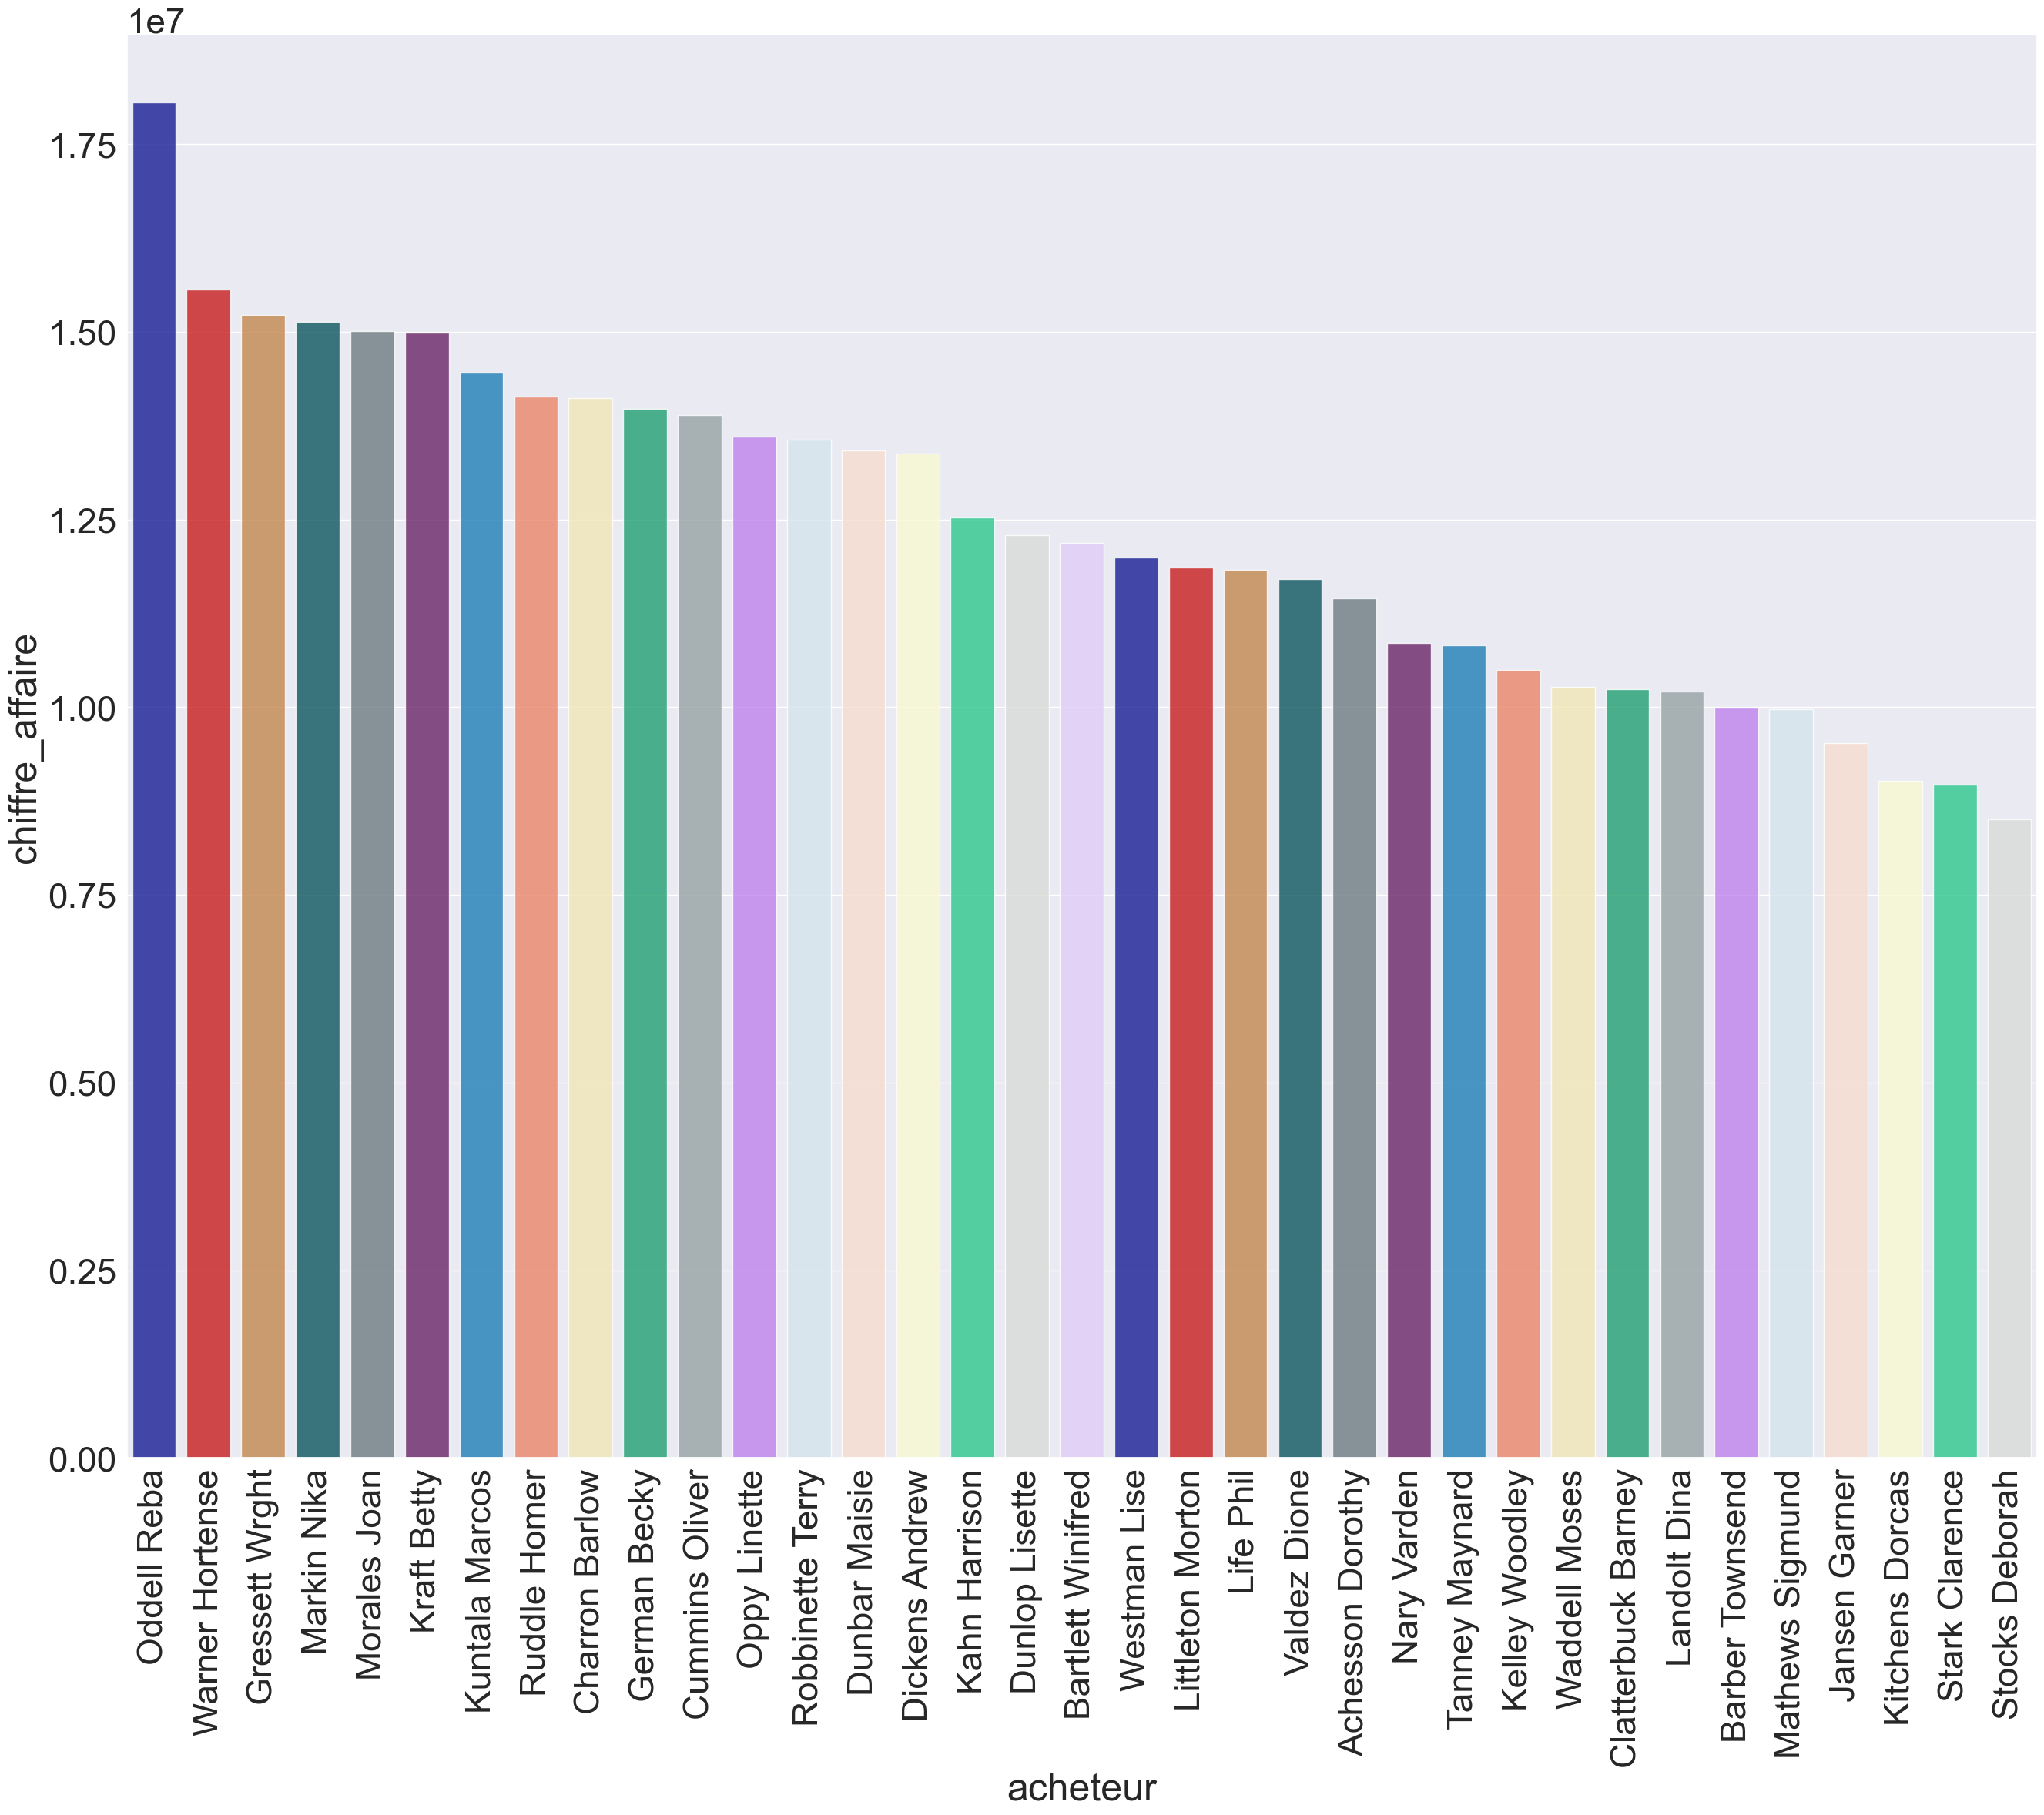

In [31]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='acheteur',y='chiffre_affaire',data=donnees3.sort_values('chiffre_affaire', ascending=False),palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=90);

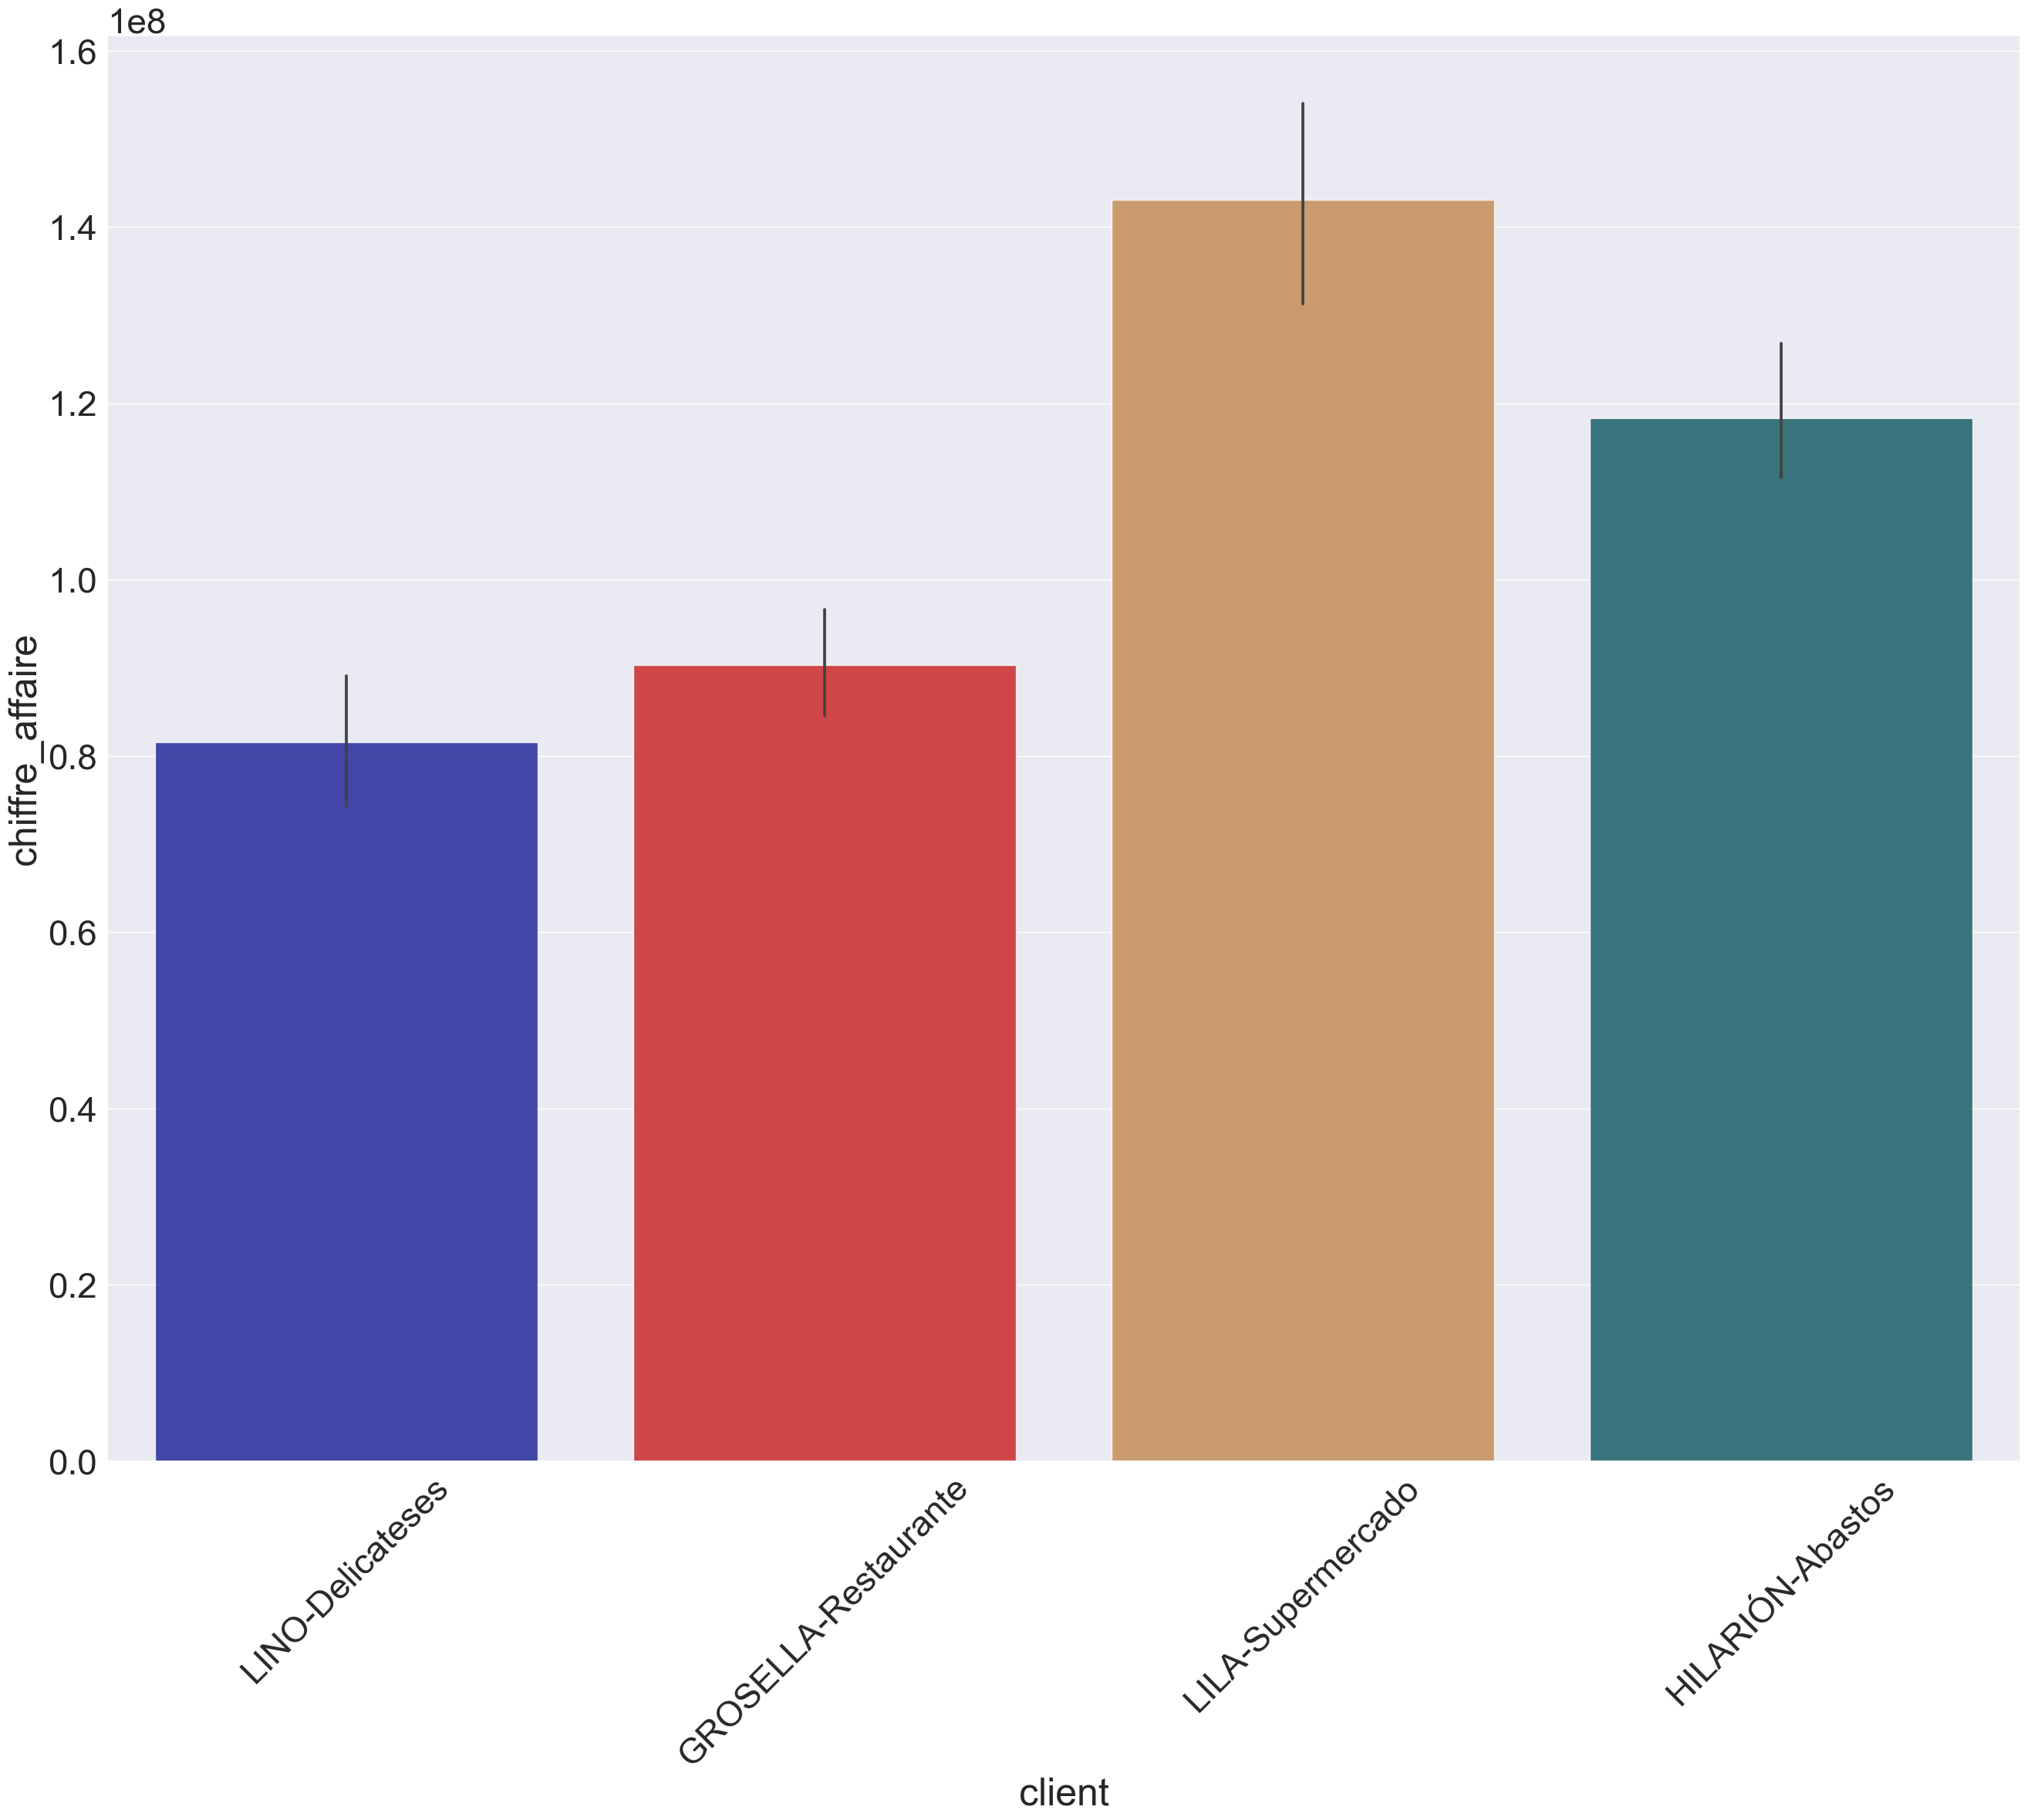

In [32]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='client',y='chiffre_affaire',data=donnees3.sort_values('chiffre_affaire'),
                       palette=palette, alpha=0.8, estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);


In [33]:
donnees4 = pd.read_csv("Q4.csv", sep=";" , encoding='cp1252')
donnees4.columns = list(map(lambda x: x.lower(),donnees4.columns))
donnees4.head()

categorie                        produit  num_produit  quantites
0  Pâtes et céréales  Singaporean Hokkien Fried Mee           42      56038
1           Desserts                  Zaanse koeken           47      62816
2      Produits secs                   Dried Apples           93      64240
3      Produits secs              Rössle Sauerkraut           28      60355
4  Produits laitiers             Mascarpone Fabioli           32      61212

In [34]:
#  top 10 quantites vendus par categorie
resultats = donnees4.groupby('categorie').agg({'quantites': ['sum']}).reset_index()
resultats = resultats.sort_values(by=('quantites', 'sum'), ascending=False)
resultats.head(10)

categorie quantites
                                   sum
1                 Condiments   1350257
3                   Desserts   1031081
0                   Boissons    996225
4  Poissons et fruits de mer    765209
6              Produits secs    722523
5          Produits laitiers    675965
7          Pâtes et céréales    670478
2                  Conserves    589378
9                    Viandes    369115
8         Viande en conserve    170807

In [35]:
#  top 10 quantites vendus par produit
resultats = donnees4.groupby('produit').agg({'quantites': ['sum']}).reset_index()
resultats = resultats.sort_values(by=('quantites', 'sum'), ascending=False)
resultats.head(10)

produit quantites
                                 sum
70   Nord-Ost Matjeshering     73989
30                Filo Mix     71874
74           Outback Lager     70807
8                 Cake Mix     70540
89              Röd Kaviar     70466
66         Mishi Kobe Niku     70192
10        Carnarvon Tigers     69201
98     Sir Rodney's Scones     68782
31             Fløtemysost     68633
29  Escargots de Bourgogne     68199

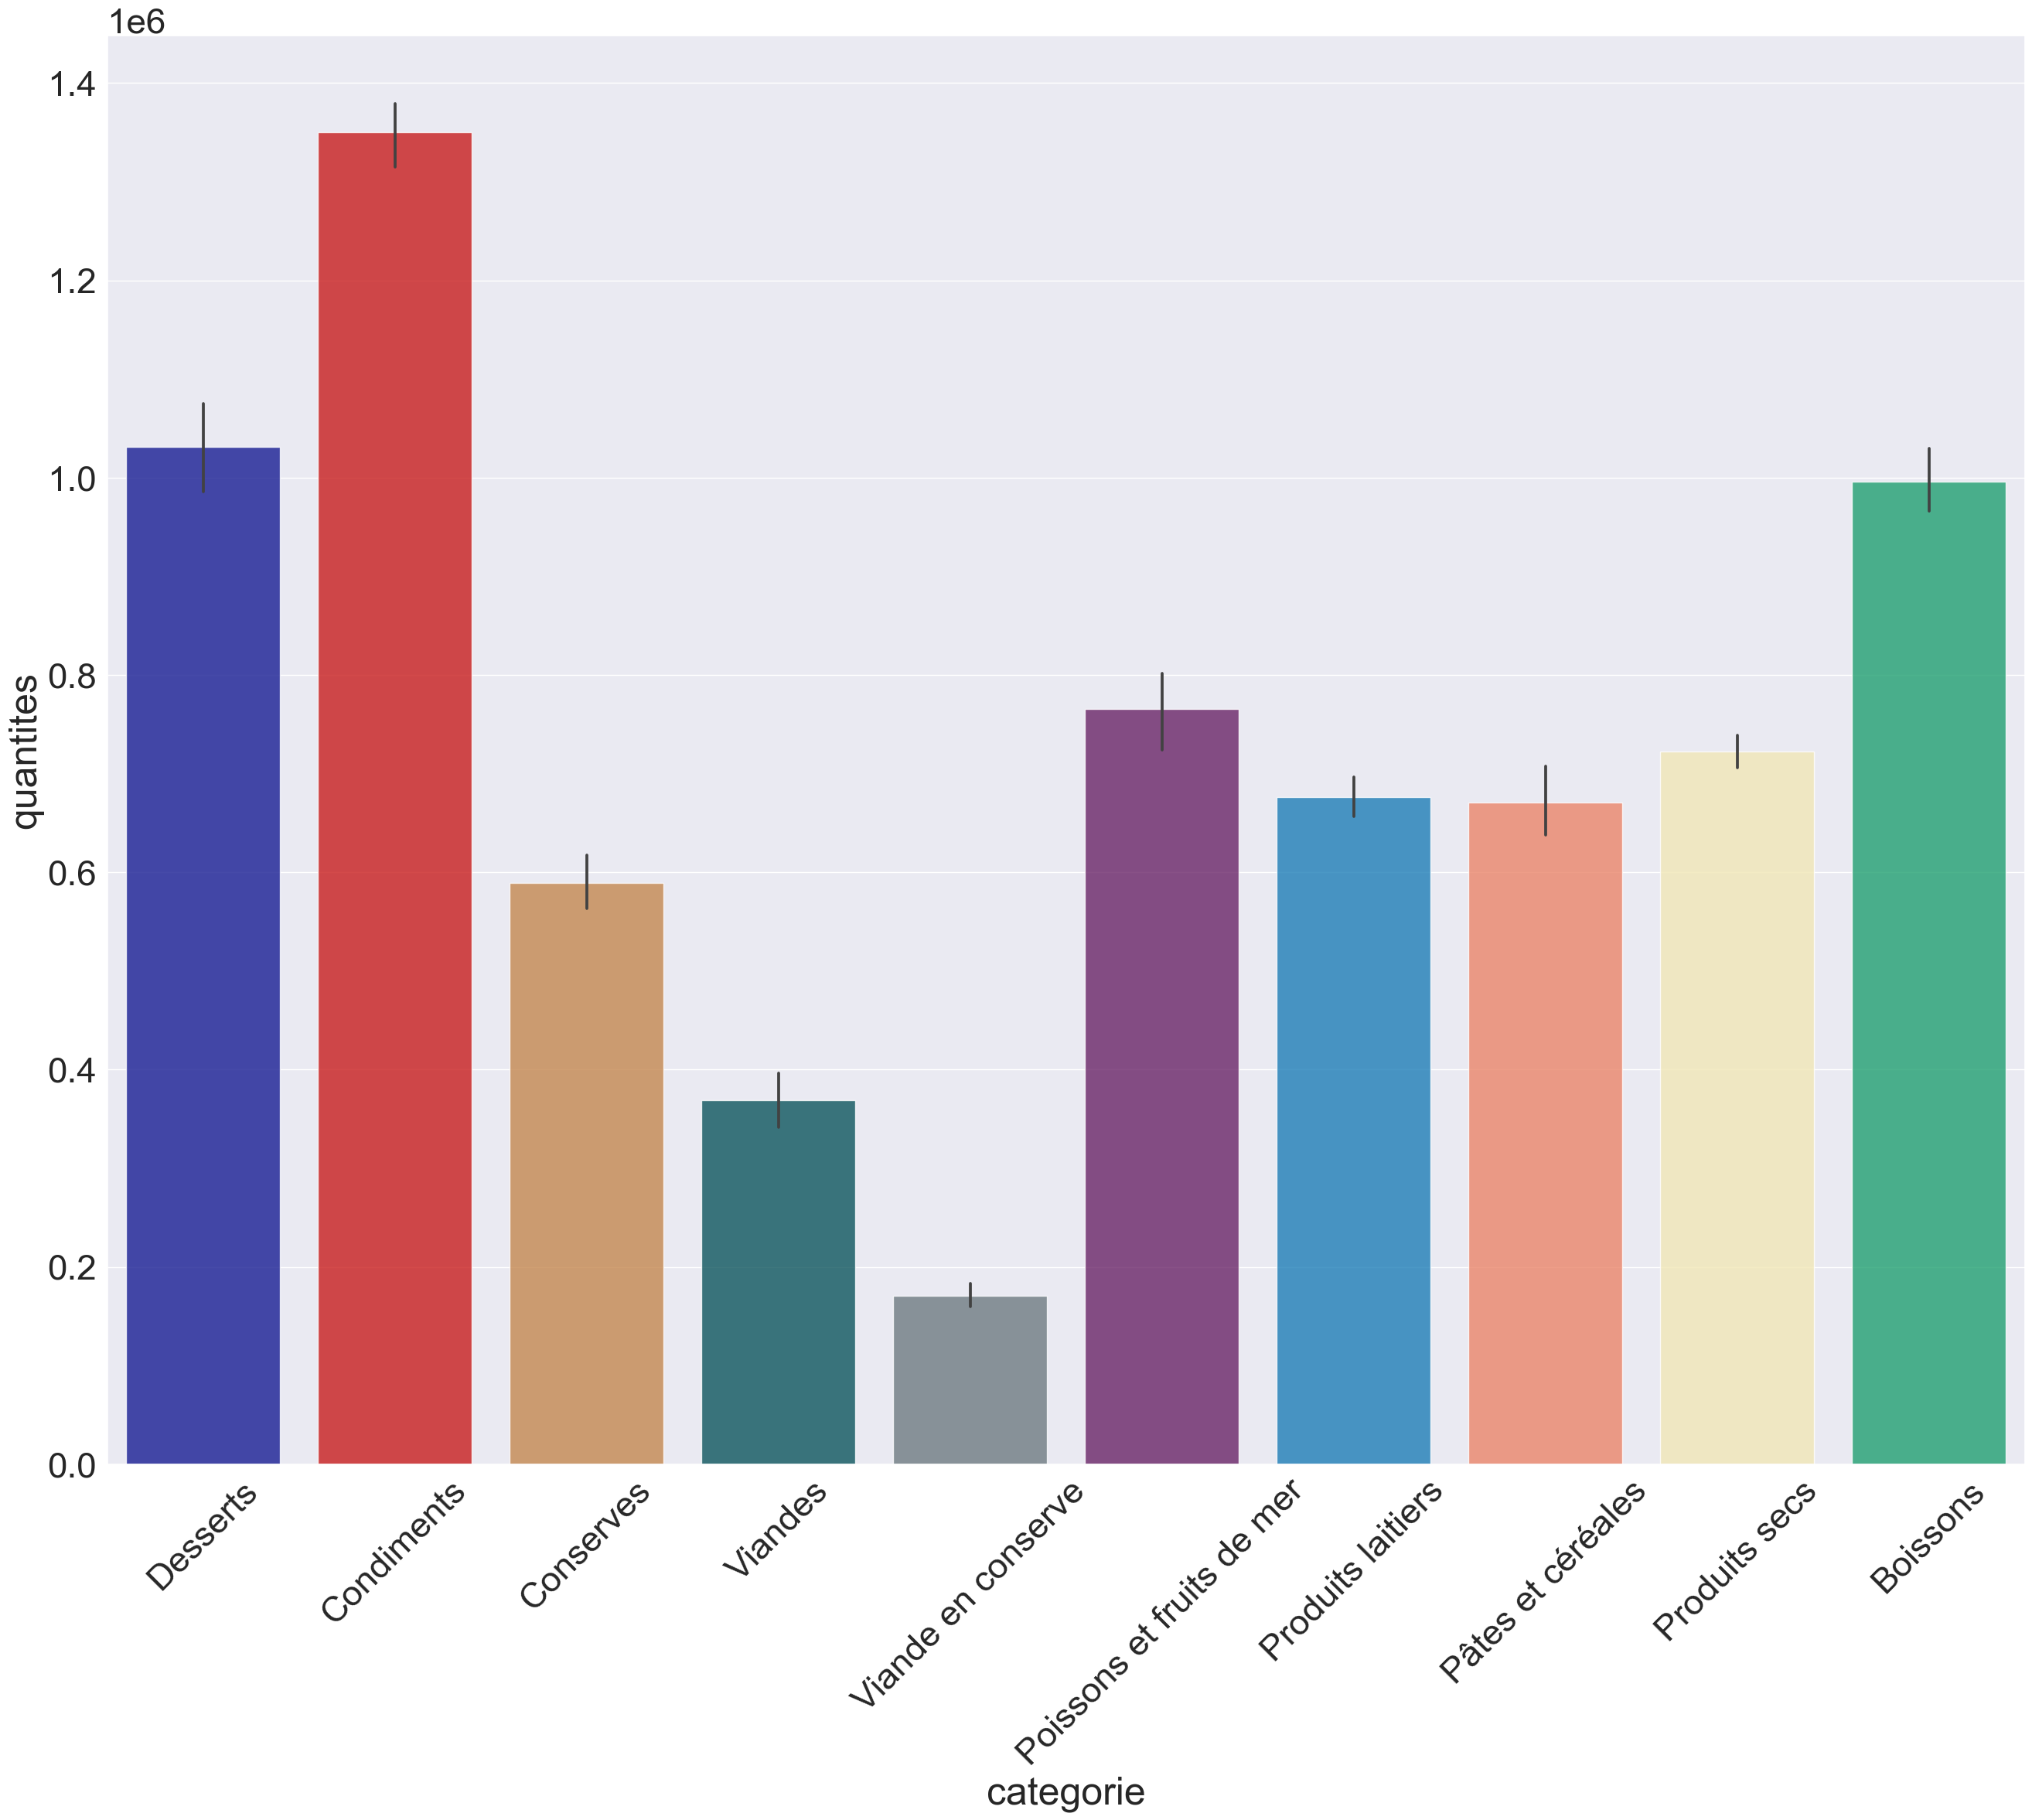

In [36]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='categorie',y='quantites',data=donnees4.sort_values('quantites'),
                       palette=palette, alpha=0.8, estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);



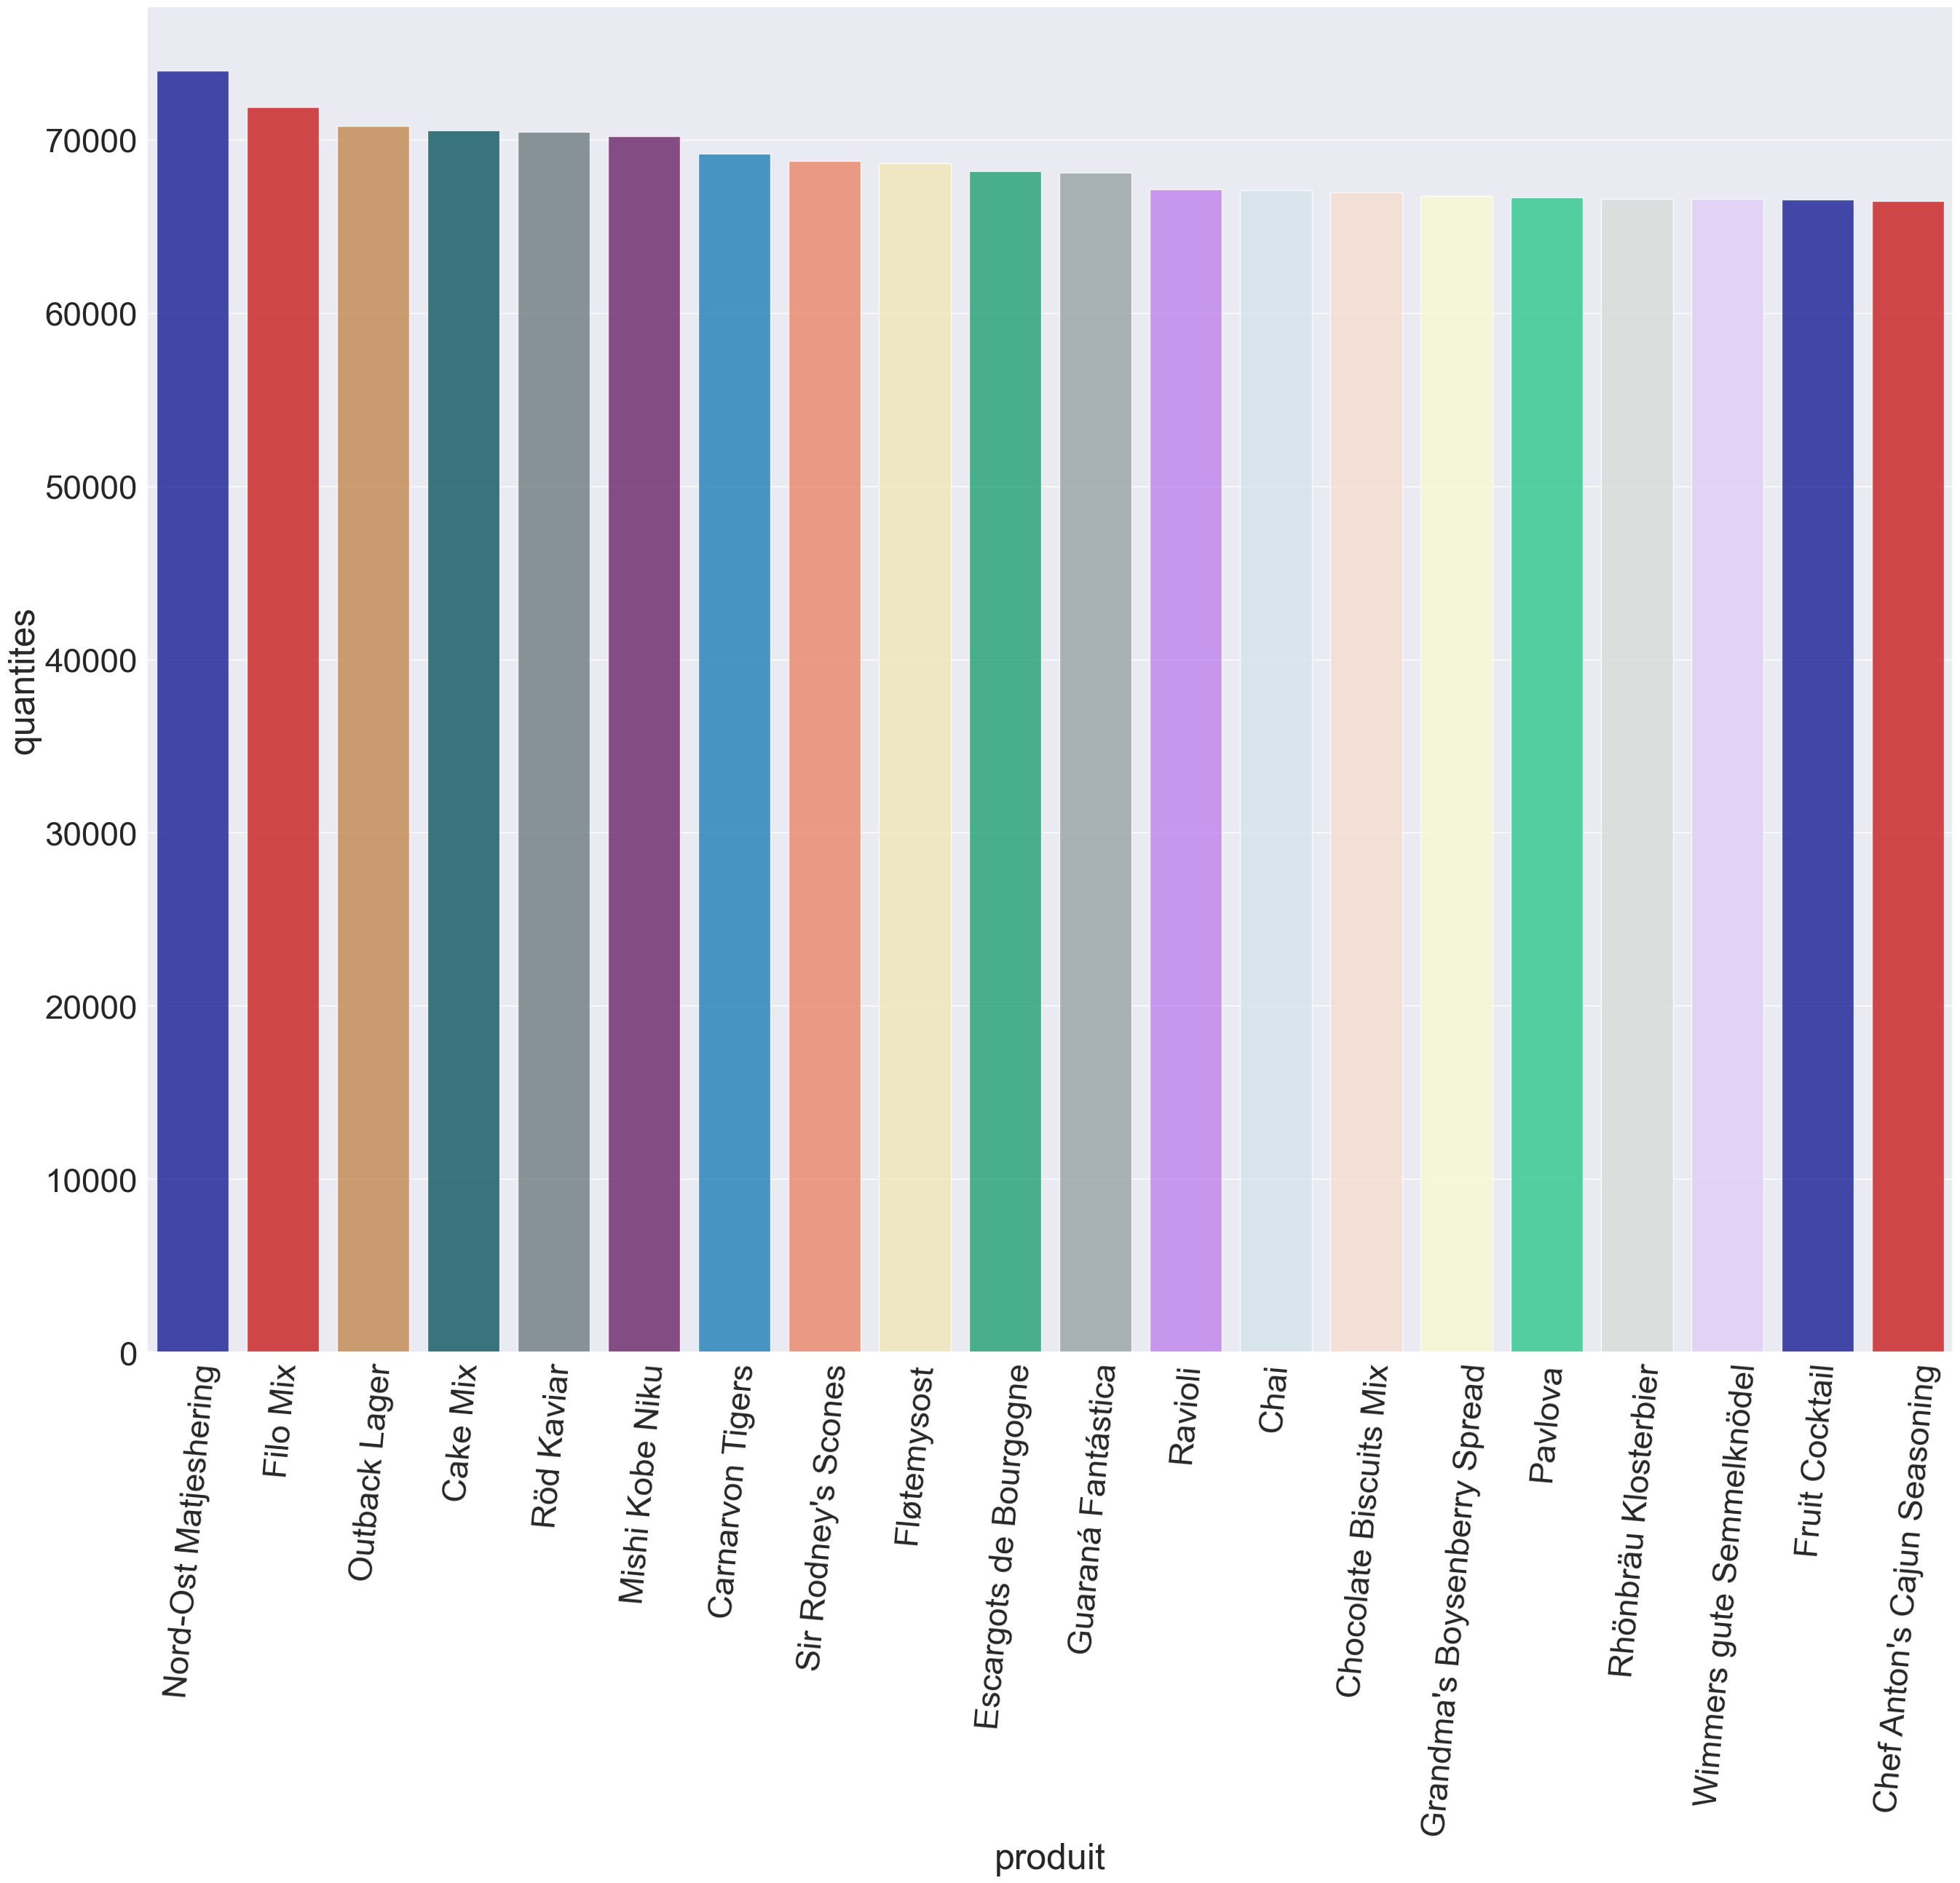

In [37]:
# Sort the data by 'quantites' column in descending order
sorted_data = donnees4.sort_values('quantites', ascending=False)

# Select the top 10 rows
top_10_data = sorted_data.head(20)

# Create the bar plot for the top 10 categories
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='produit', y='quantites', data=top_10_data,
                       palette=palette, alpha=0.8, estimator='sum')

# Customize the plot as needed
plt.xticks(rotation=85)



plt.show()

In [38]:
donnees5 = pd.read_csv("Q5.csv", sep=";" , encoding='cp1252')
donnees5.columns = list(map(lambda x: x.lower(),donnees5.columns))
donnees5.head()

fournisseur  nombre_de_sollitation  quantite
0       Aux joyeux ecclésiastiques                   5212  -7822680
1      New England Seafood Cannery                   3096  -4433363
2  Nouvelle-Orléans Cajun Delights                   7284 -10760597
3       Heli Süßwaren GmbH  Co. KG                   4136  -5781194
4                        Karkki Oy                   4170  -5942196

In [39]:
#  top 10 fournisseurs les plus sollicités 
resultats = donnees5.groupby('fournisseur').agg({'nombre_de_sollitation': ['sum']}).reset_index()
resultats = resultats.sort_values(by=('nombre_de_sollitation', 'sum'), ascending=False)
resultats.head(10)

fournisseur nombre_de_sollitation
                                                         sum
5              Formaggi Fortini s.r.l.                  9396
27                       Tokyo Traders                  7366
19     Nouvelle-Orléans Cajun Delights                  7284
22                       Pavlova, Ltd.                  6278
15                            Mayumi's                  6269
1                    Bigfoot Breweries                  6267
25            Specialty Biscuits, Ltd.                  5256
0           Aux joyeux ecclésiastiques                  5212
23   Plutzer Lebensmittelgroßmärkte AG                  5209
2   Cooperativa de Quesos 'Las Cabras'                  5196

In [40]:
#  top 10 fournisseurs qui ont allimentés notre stock 
donnees5['quantite'] = - donnees5['quantite']
resultats = donnees5.groupby('fournisseur').agg({'quantite': ['sum']}).reset_index()
resultats = resultats.sort_values(by=('quantite', 'sum'), ascending=False)
resultats.head(10)

fournisseur  quantite
                                             sum
5              Formaggi Fortini s.r.l.  13755401
27                       Tokyo Traders  10978928
19     Nouvelle-Orléans Cajun Delights  10760597
22                       Pavlova, Ltd.   9407447
1                    Bigfoot Breweries   9179232
15                            Mayumi's   9055919
25            Specialty Biscuits, Ltd.   7893731
0           Aux joyeux ecclésiastiques   7822680
2   Cooperativa de Quesos 'Las Cabras'   7700399
23   Plutzer Lebensmittelgroßmärkte AG   7593529

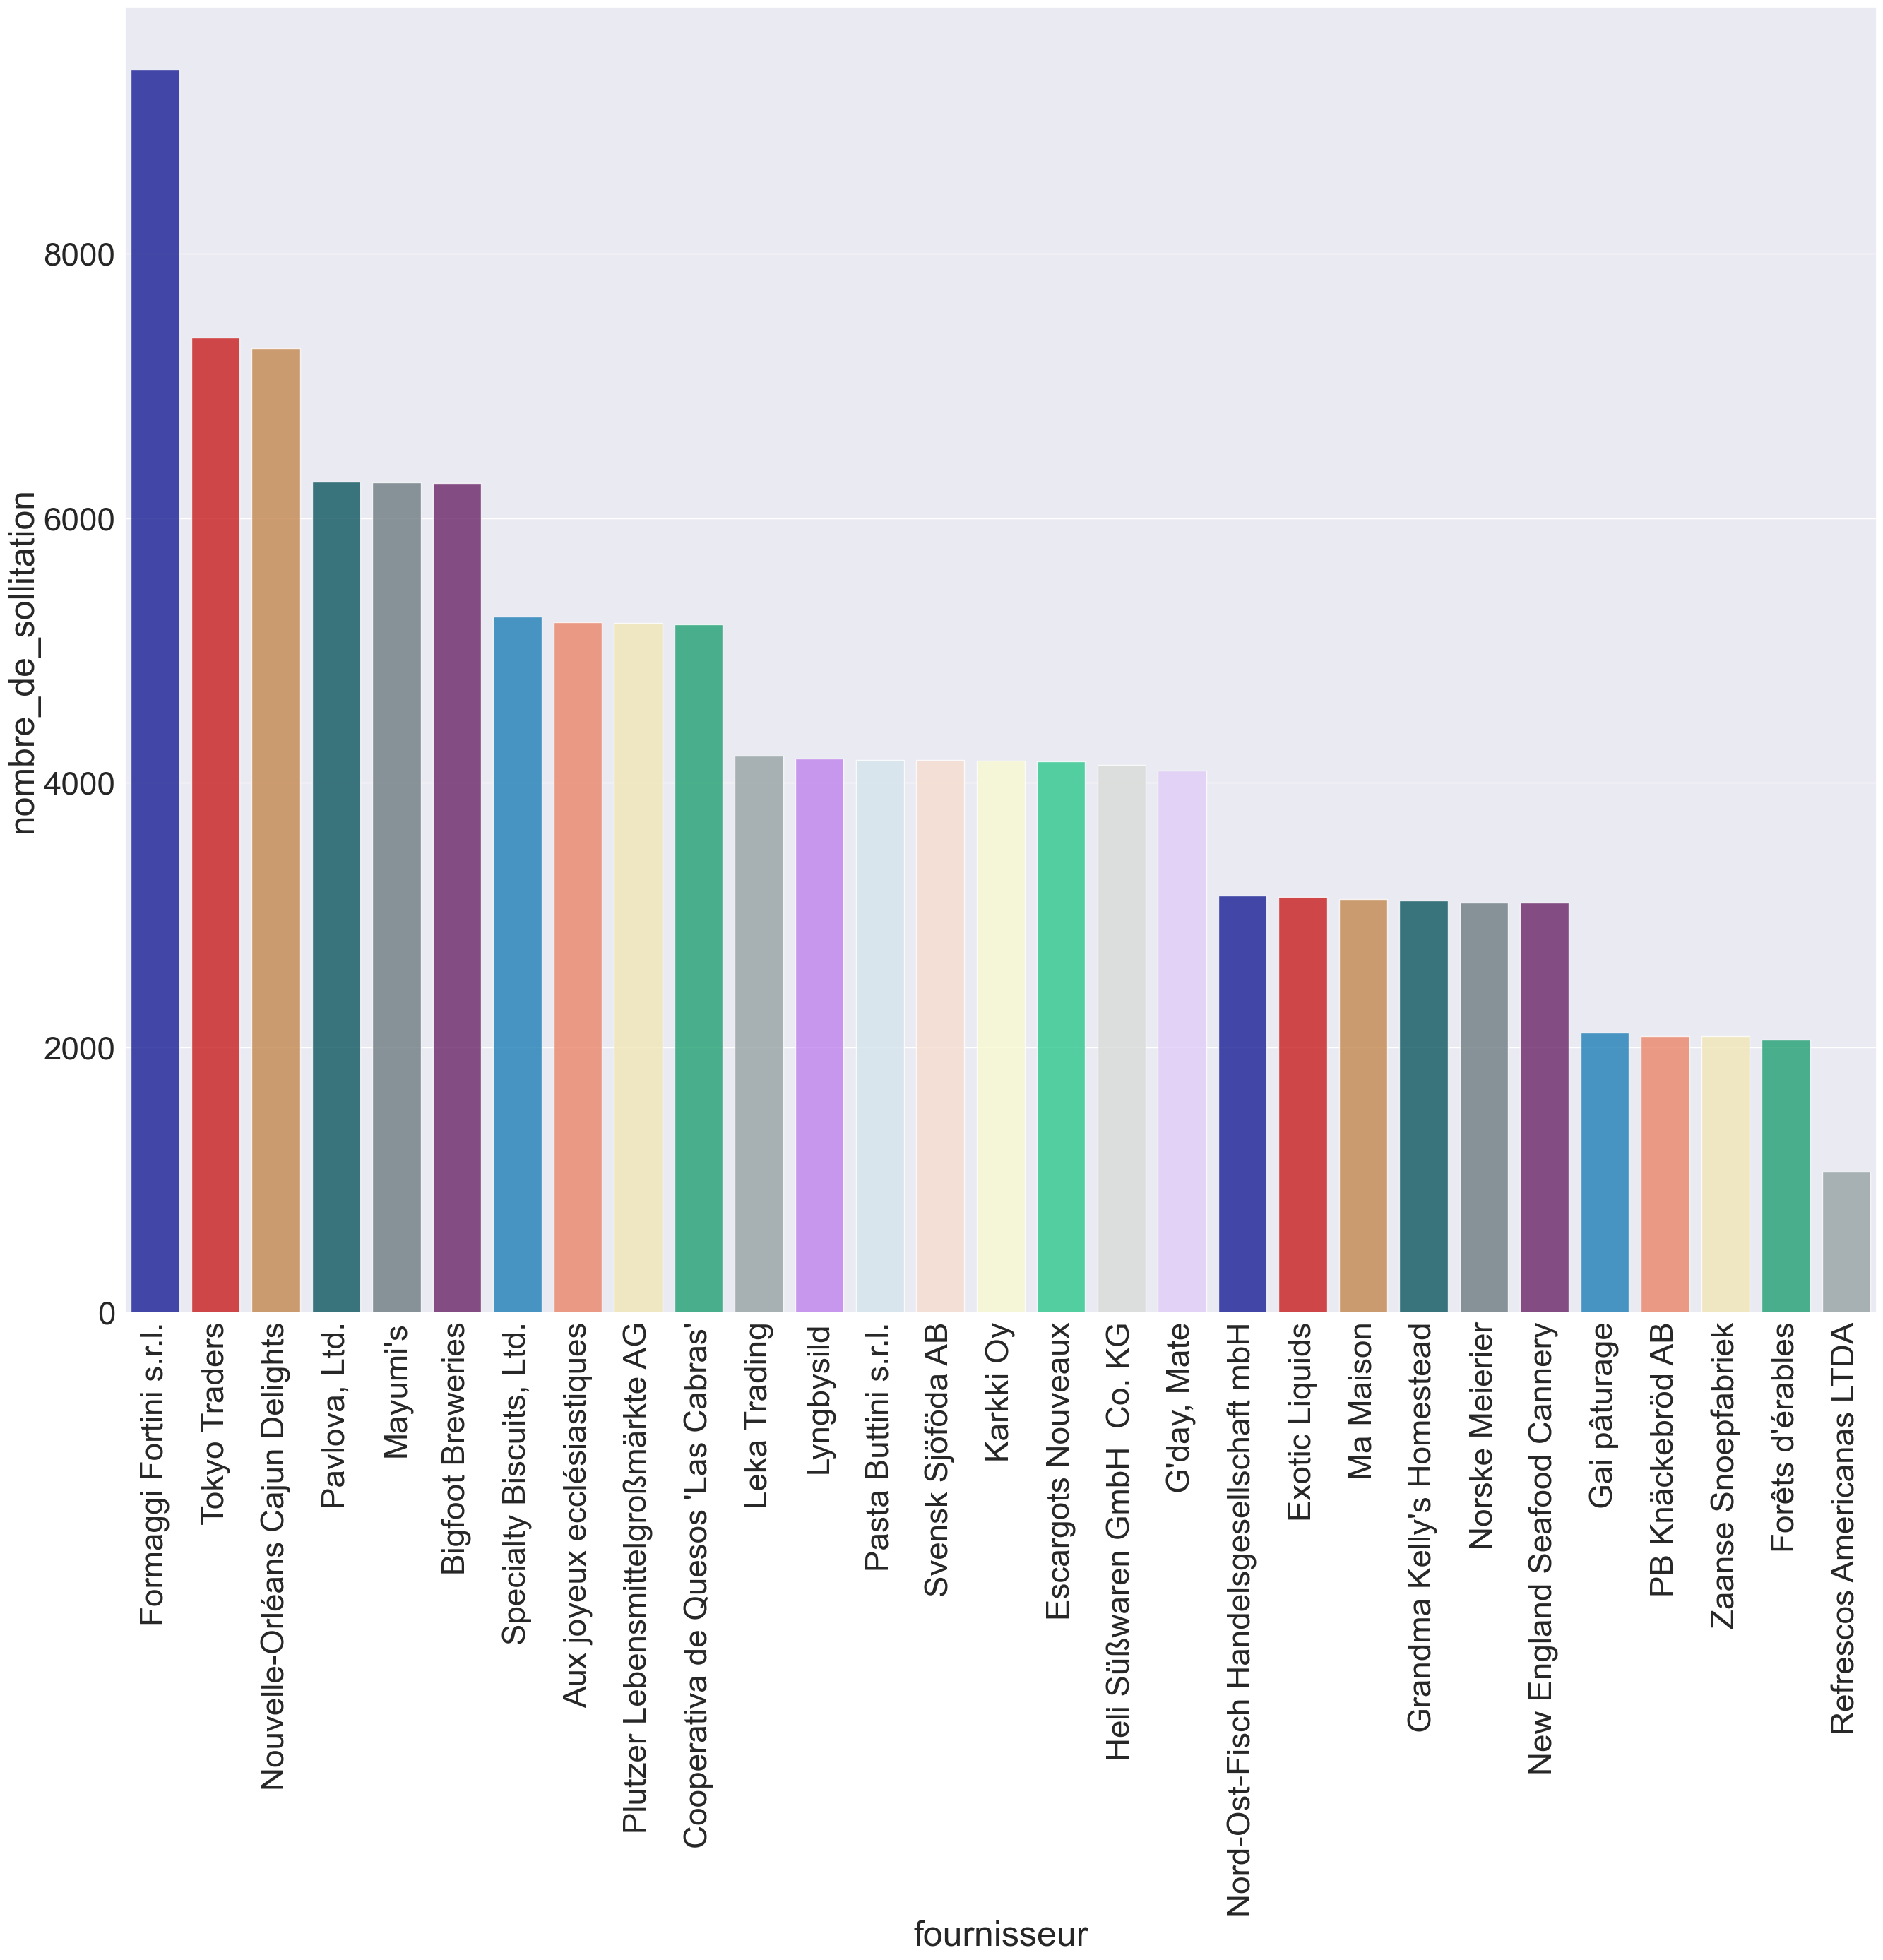

In [41]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='fournisseur',y='nombre_de_sollitation',data=donnees5.sort_values('nombre_de_sollitation', ascending=False),palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=90);

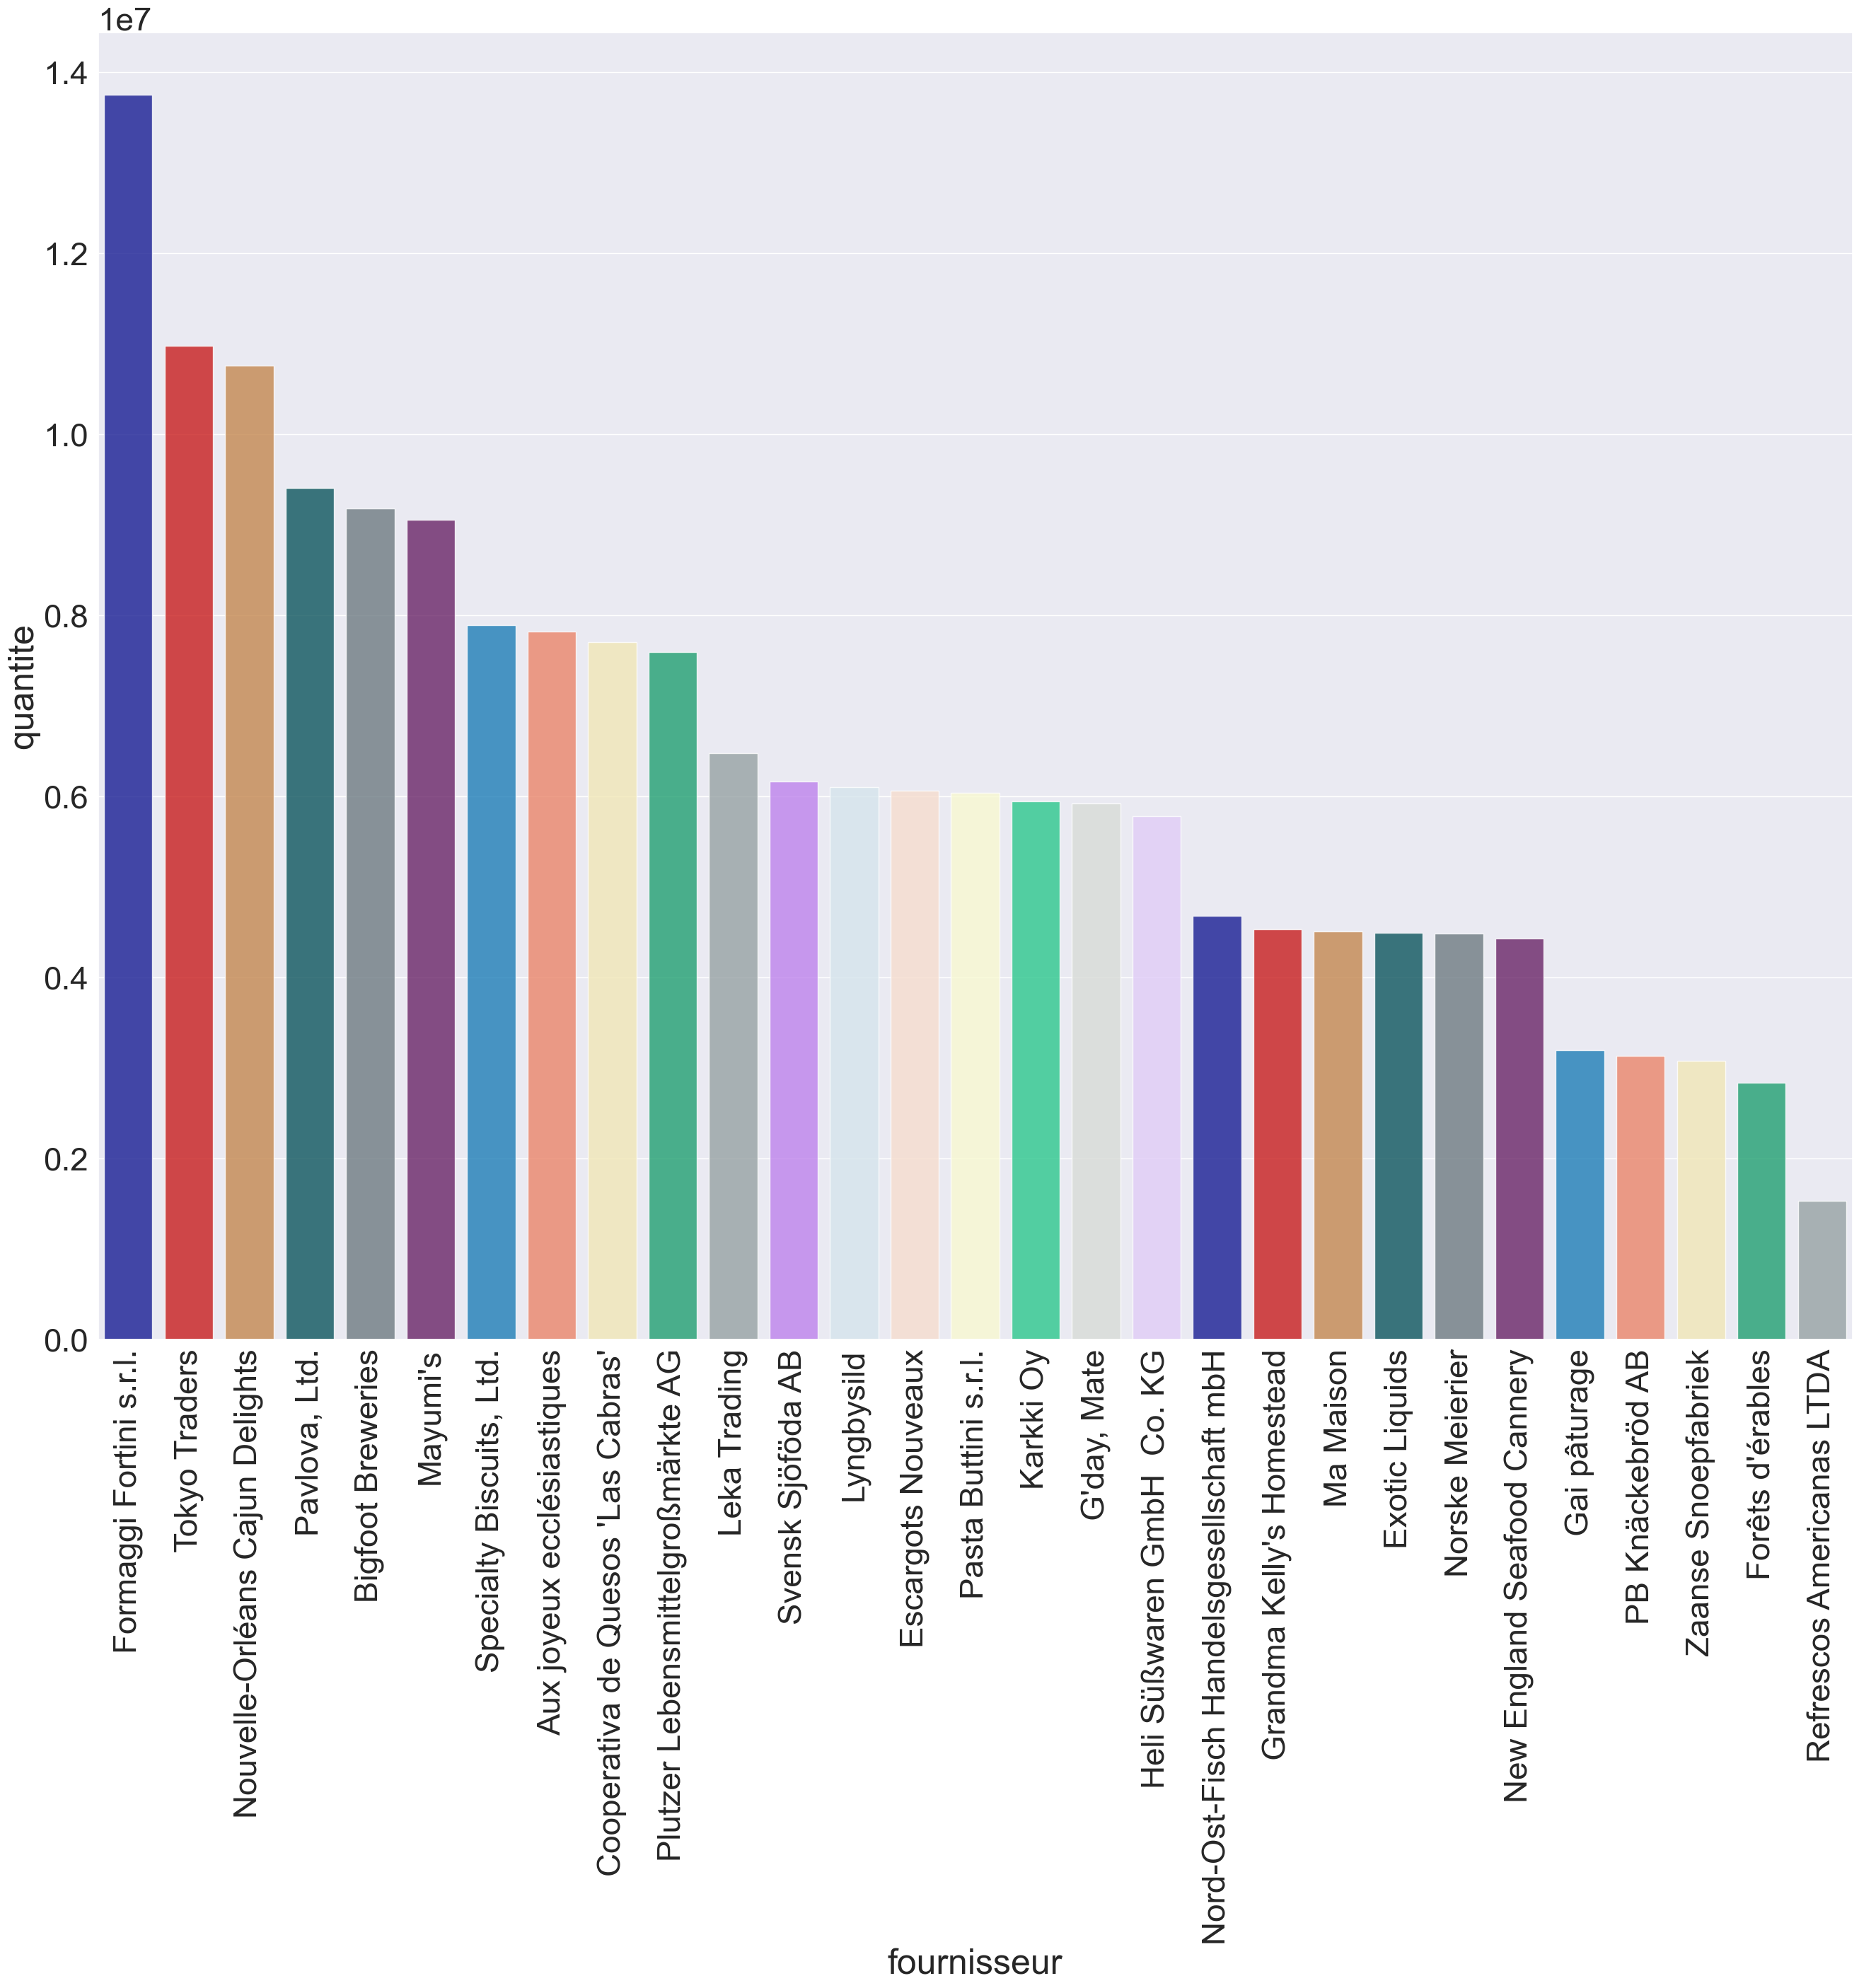

In [42]:

plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='fournisseur',y='quantite',data=donnees5.sort_values('quantite', ascending=False),palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=90);

In [43]:
donnees6 = pd.read_csv("Q6.csv", sep=";" , encoding='cp1252')
donnees6.columns = list(map(lambda x: x.lower(),donnees6.columns))
donnees6.head()

nom_categorie     nom_produit  quantite
0       Boissons   Outback Lager    497035
1     Condiments  Sirop d'érable     10031
2  Produits secs    Dried Apples    291651
3       Desserts        Maxilaku    252669
4      Conserves            Corn     85446

In [44]:
#  top 10 stock les plus importants par categories 
resultats = donnees6.groupby('nom_categorie').agg({'quantite': ['sum']}).reset_index()
resultats = resultats.sort_values(by=('quantite', 'sum'), ascending=False)
resultats.head(10)

nom_categorie quantite
                                  sum
0                   Boissons  2978926
1                 Condiments  2297269
3                   Desserts  2240450
7          Pâtes et céréales  2202483
5          Produits laitiers  2131964
6              Produits secs  1833486
4  Poissons et fruits de mer  1746172
2                  Conserves  1557317
9                    Viandes  1355328
8         Viande en conserve   468329

In [45]:
#  top 10 stock les plus importants par produit 
resultats = donnees6.groupby('nom_produit').agg({'quantite': ['sum']}).reset_index()
resultats = resultats.sort_values(by=('quantite', 'sum'), ascending=False)
resultats.head(10)

nom_produit quantite
                            sum
112           Tunnbröd   854043
43    Gudbrandsdalsost   710681
41           Green Tea   619050
17        Chicken Soup   569948
11                Chai   562439
81        Potato Chips   515199
91         Røgede sild   510144
36   Gorgonzola Telino   509000
32      Fruit Cocktail   504237
74       Outback Lager   497035

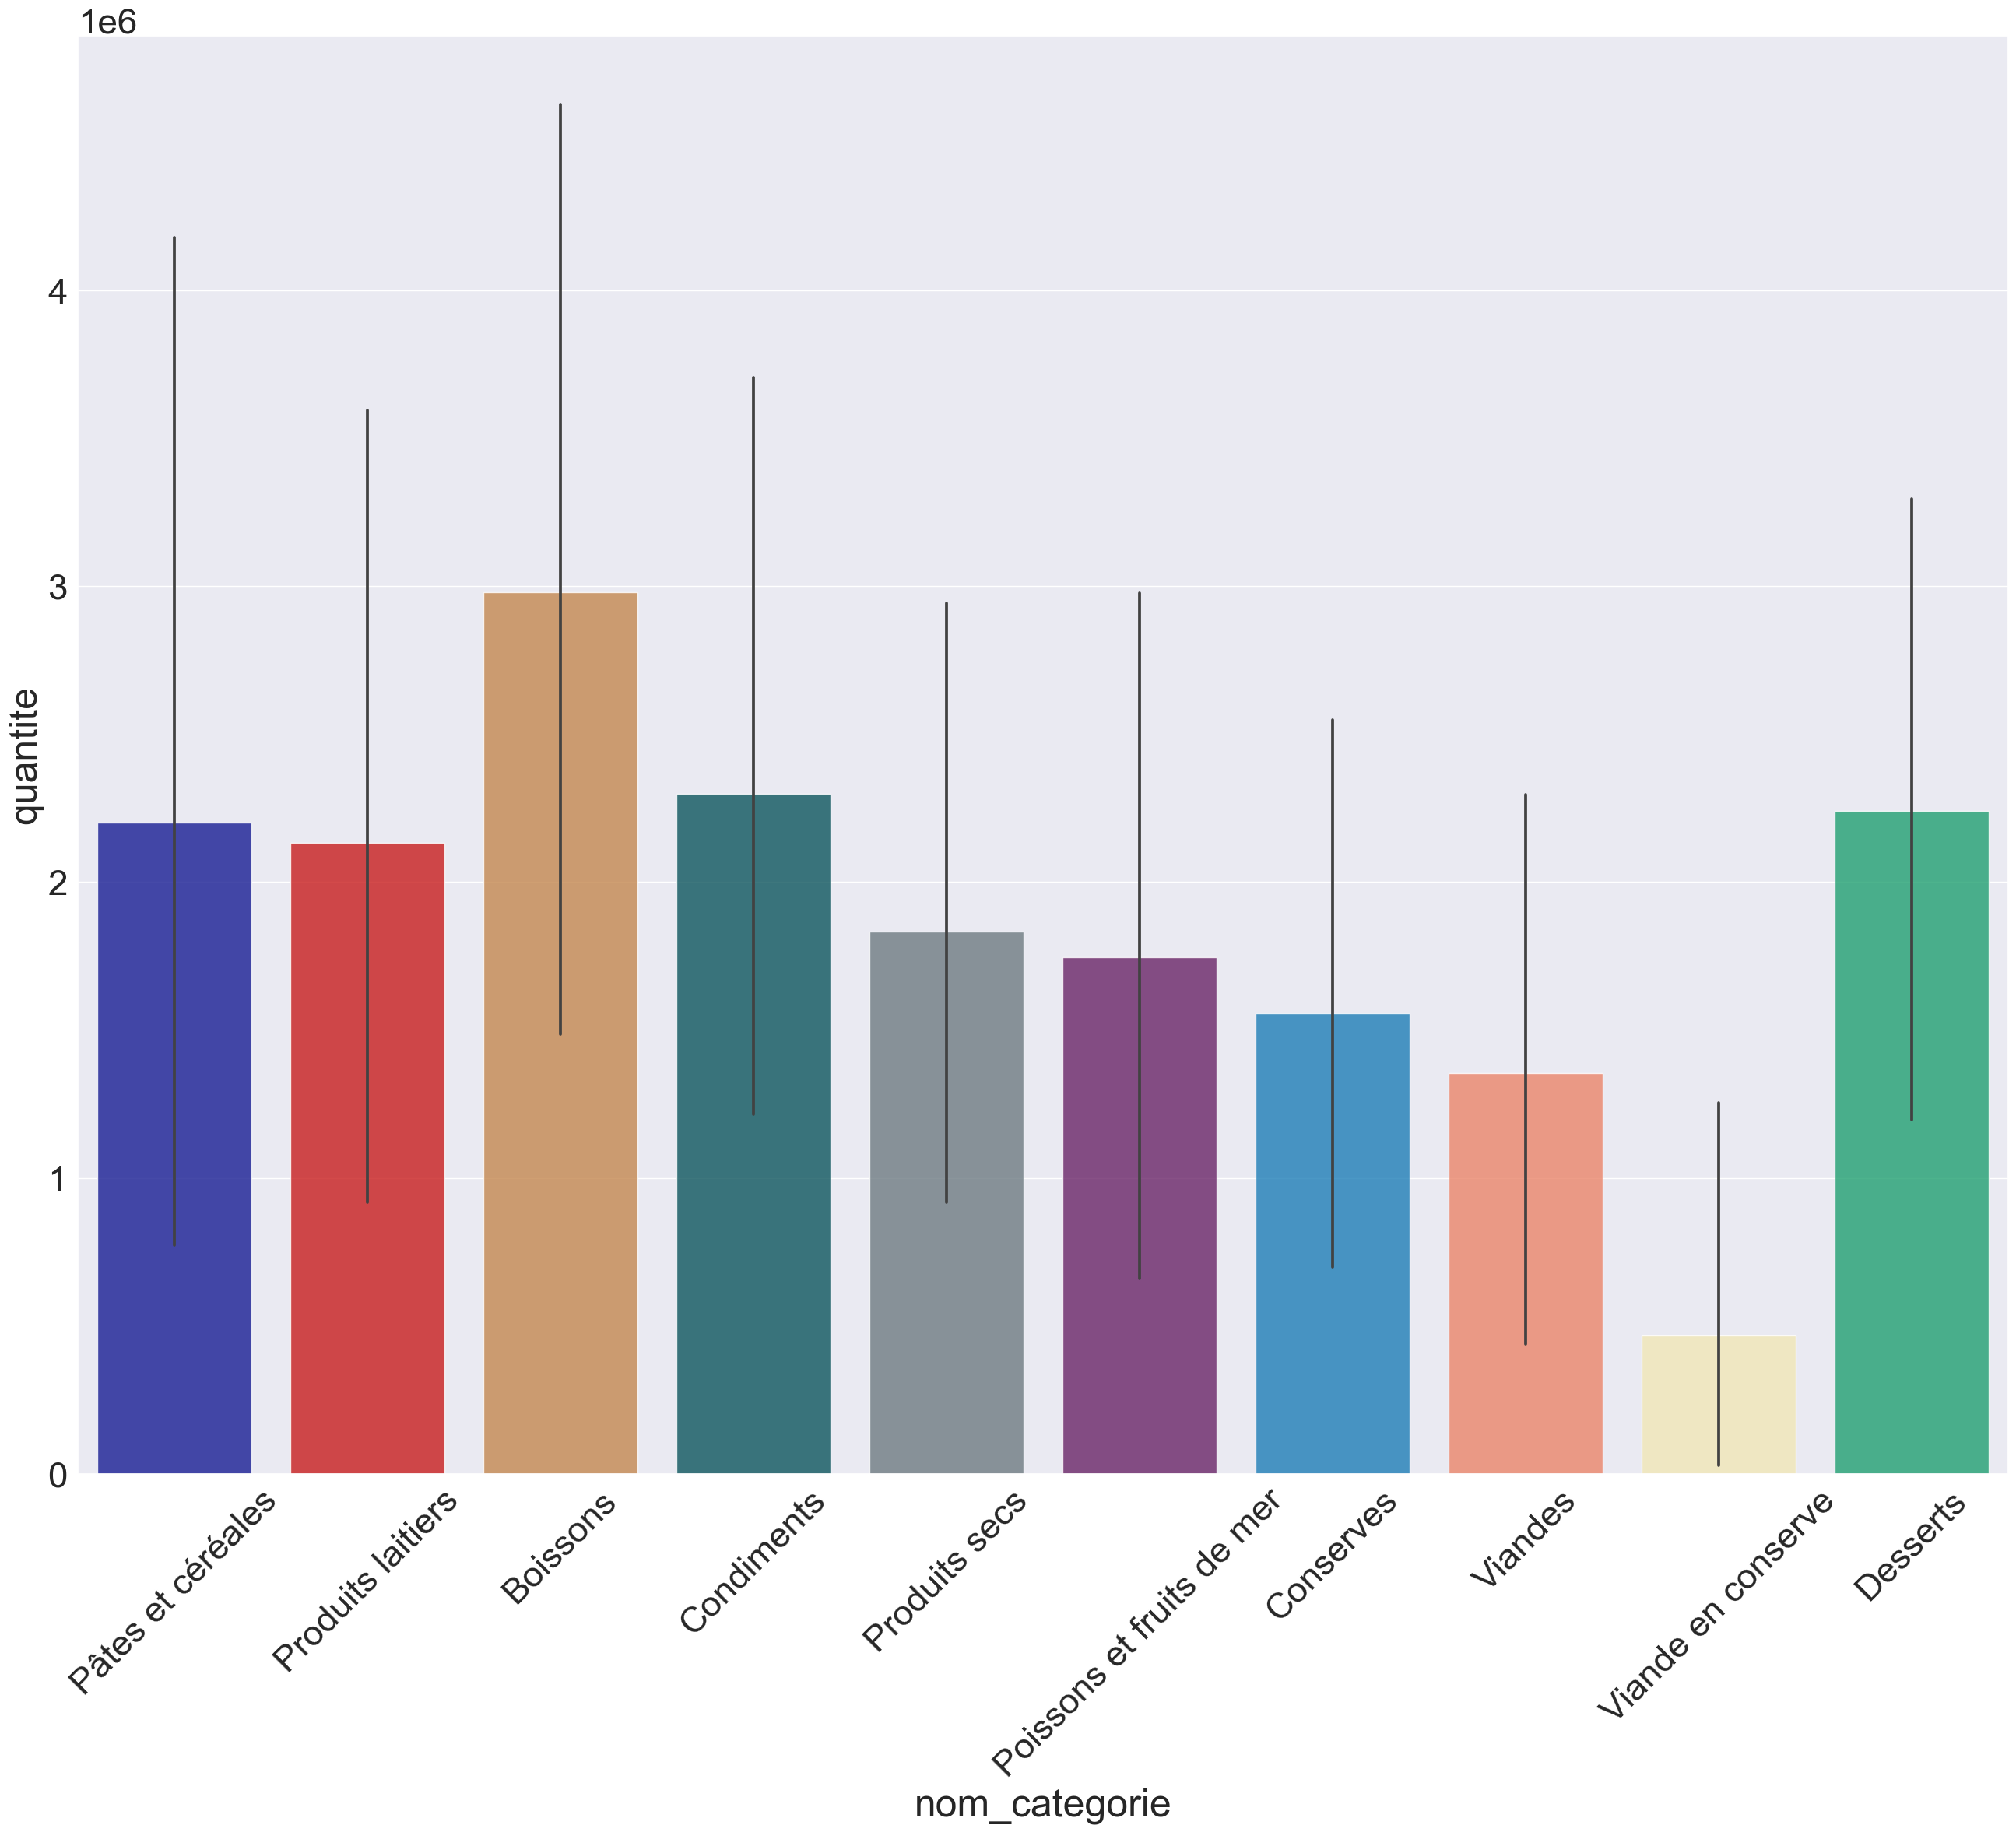

In [46]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='nom_categorie',y='quantite',data=donnees6.sort_values('quantite', ascending=False),
                       palette=palette, alpha=0.8, estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);



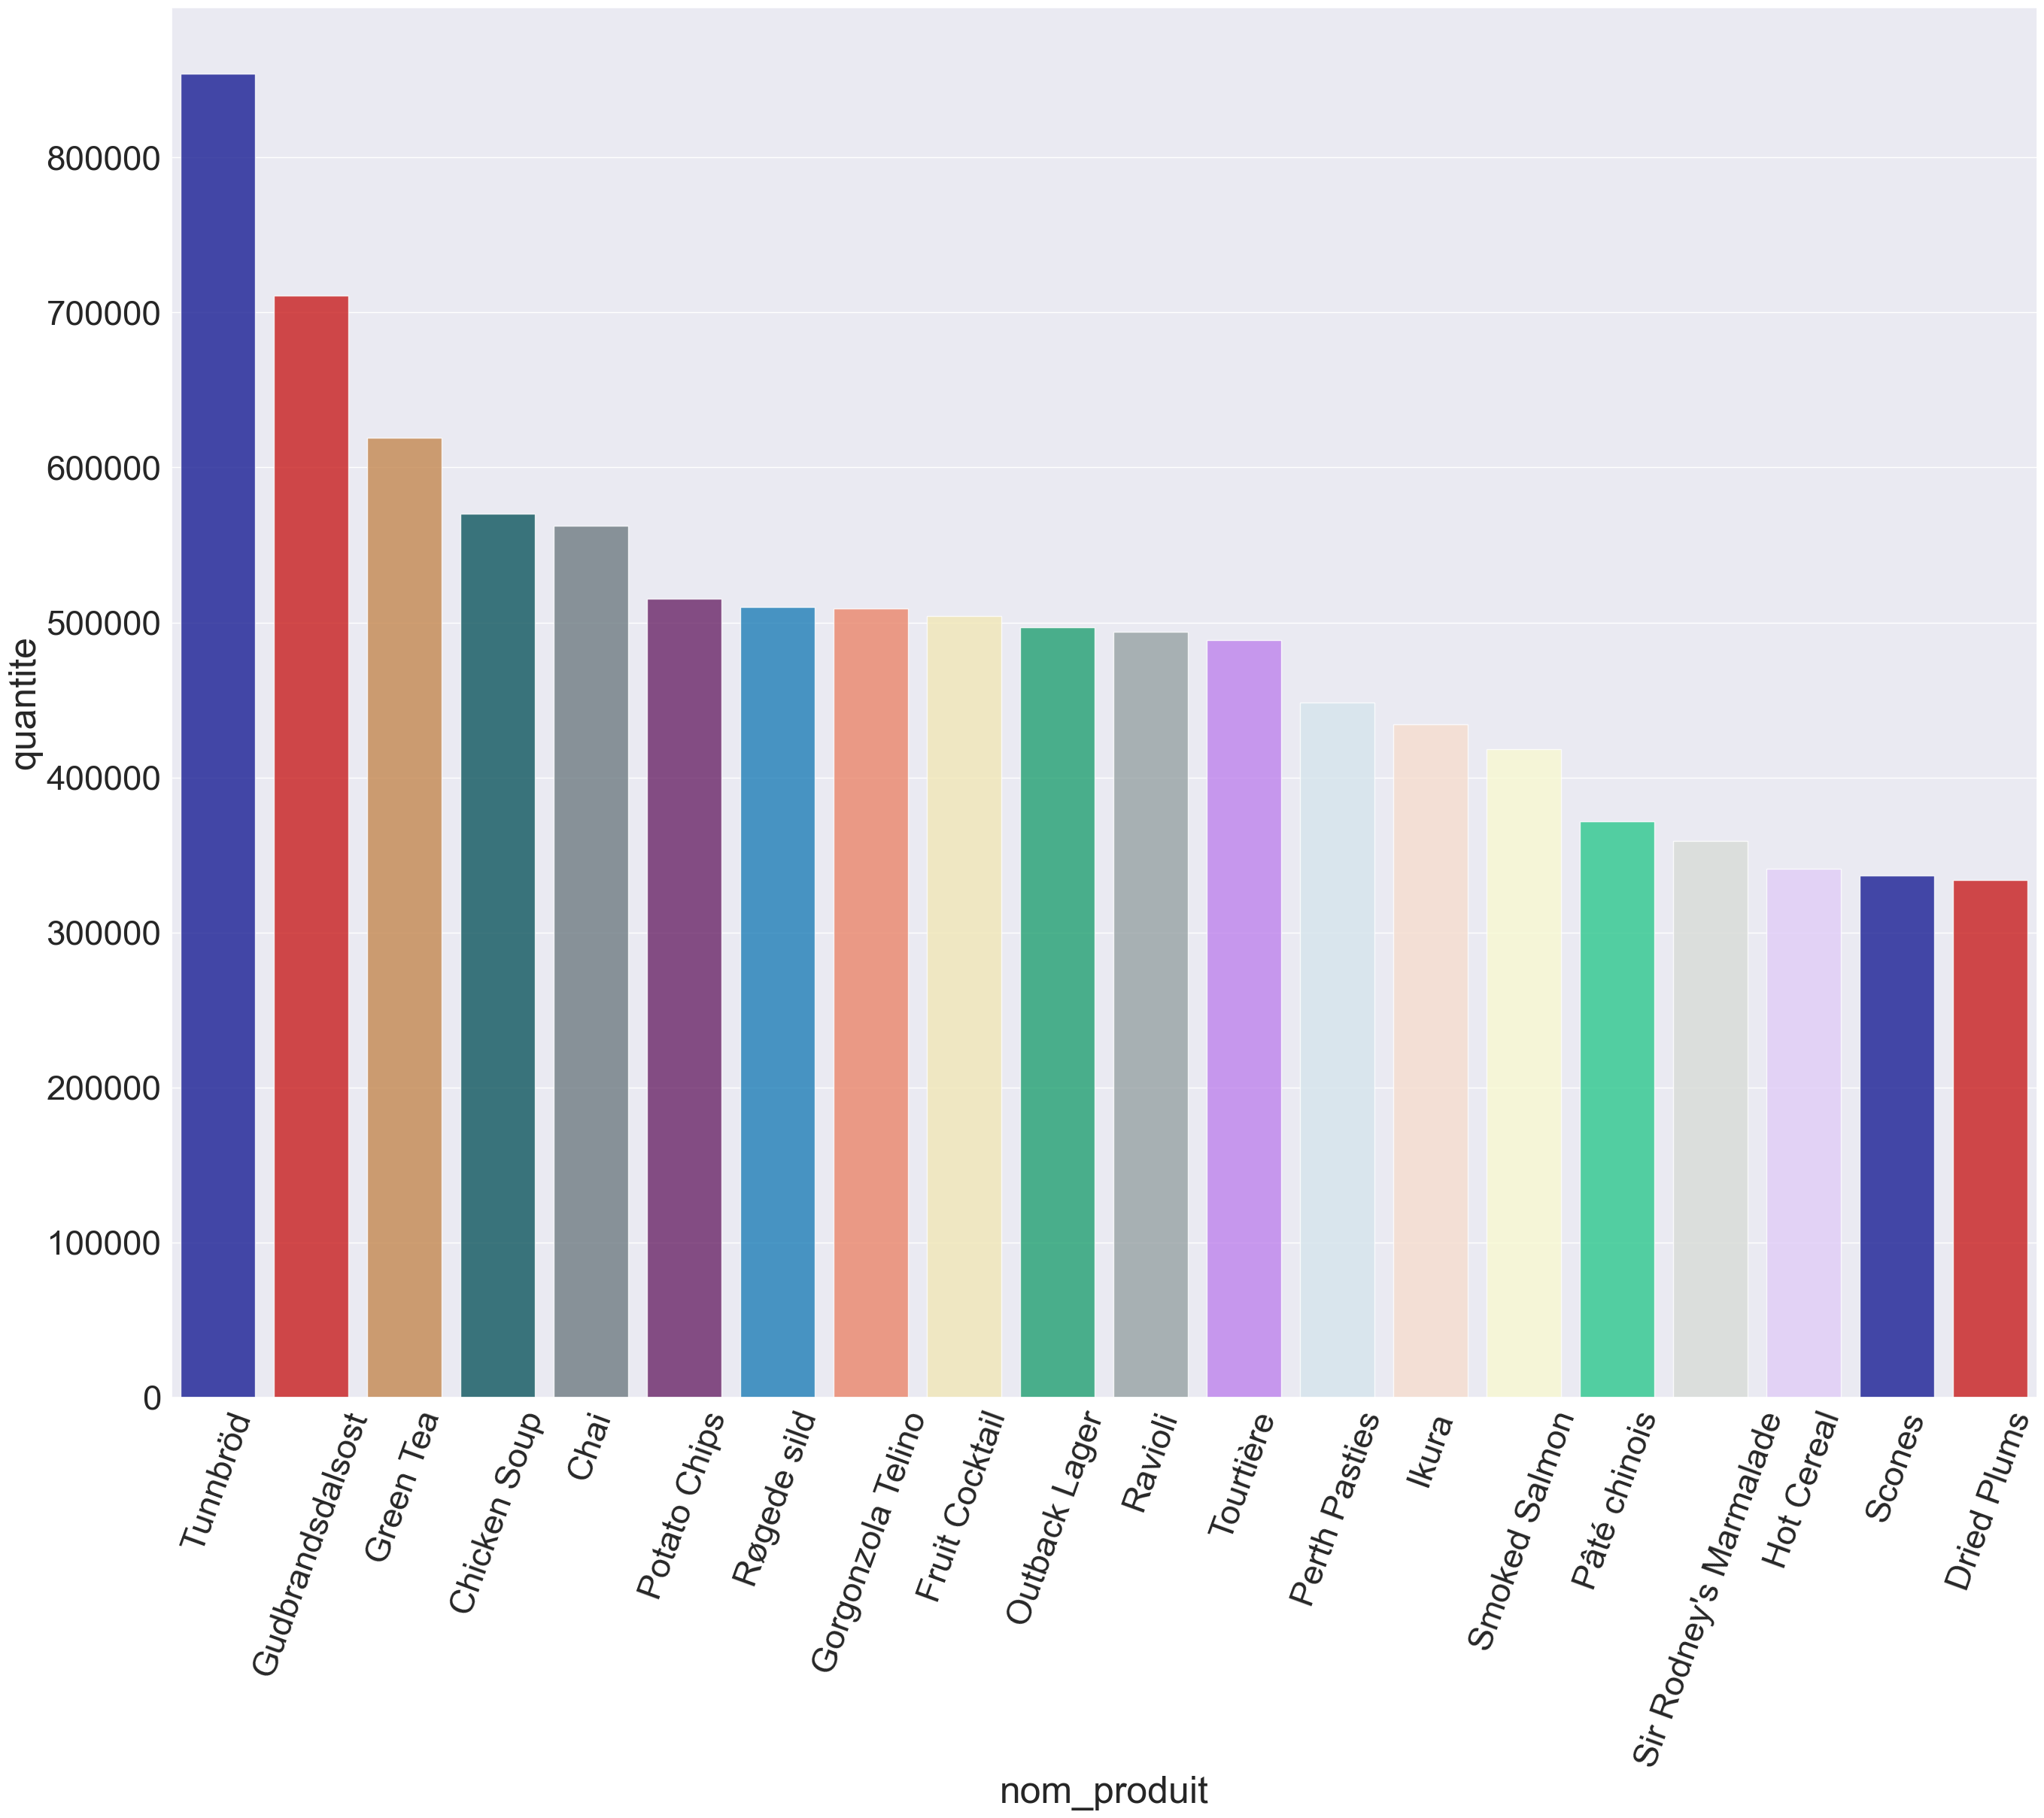

In [47]:

# Sort the data by 'quantite' column in descending order
sorted_data = donnees6.sort_values('quantite', ascending=False)

# Select the top 10 rows
top_10_data = sorted_data.head(20)

# Create the bar plot for the top 10 products
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='nom_produit', y='quantite', data=top_10_data,
                       palette=palette, alpha=0.8, estimator='sum')

# Customize the plot as needed
plt.xticks(rotation=70)




plt.show()

In [48]:
donnees7 = pd.read_csv("Q7.csv", sep=";" , encoding='cp1252')
donnees7.columns = list(map(lambda x: x.lower(),donnees7.columns))
donnees7.head()

categorie produit       mois  mois_n  trimestre  quantite
0  Boissons    Beer  AOÛT            8          3      4667
1  Boissons    Beer  AVRIL           4          2      5802
2  Boissons    Beer  DÉCEMBRE       12          4      5040
3  Boissons    Beer  FÉVRIER         2          1      4652
4  Boissons    Beer  JANVIER         1          1      2643

In [49]:
donnees7.groupby(['categorie','trimestre']).agg({'quantite':['sum','mean']}).head(100)


quantite             
                                         sum         mean
categorie                 trimestre                      
Boissons                  1           216436  4509.083333
                          2           276320  5756.666667
                          3           252395  5258.229167
                          4           251074  5230.708333
Condiments                1           289191  4381.681818
                          2           371218  5624.515152
                          3           360089  5455.893939
                          4           329759  4996.348485
Conserves                 1           126012  4200.400000
                          2           152806  5093.533333
                          3           158139  5271.300000
                          4           152421  5080.700000
Desserts                  1           228893  4488.098039
                          2           275305  5398.137255
                          3           258860  5075.686275
                          4           268023  5255.352941
Poissons et fruits de mer 1           172314  4786.500000
                          2           206892  5747.000000
                          3           194245  5395.694444
                          4           191758  5326.611111
Produits laitiers         1           153028  4637.212121
                          2           176534  5349.515152
                          3           172484  5226.787879
                          4           173919  5270.272727
Produits secs             1           152332  4231.444444
                          2           195739  5437.194444
                          3           190865  5301.805556
                          4           183587  5099.638889
Pâtes et céréales         1           144071  4365.787879
                          2           175918  5330.848485
                          3           178833  5419.181818
                          4           171656  5201.696970
Viande en conserve        1            38867  4318.555556
                          2            43504  4833.777778
                          3            44363  4929.222222
                          4            44073  4897.000000
Viandes                   1            82655  4591.944444
                          2            99468  5526.000000
                          3            92483  5137.944444
                          4            94509  5250.500000

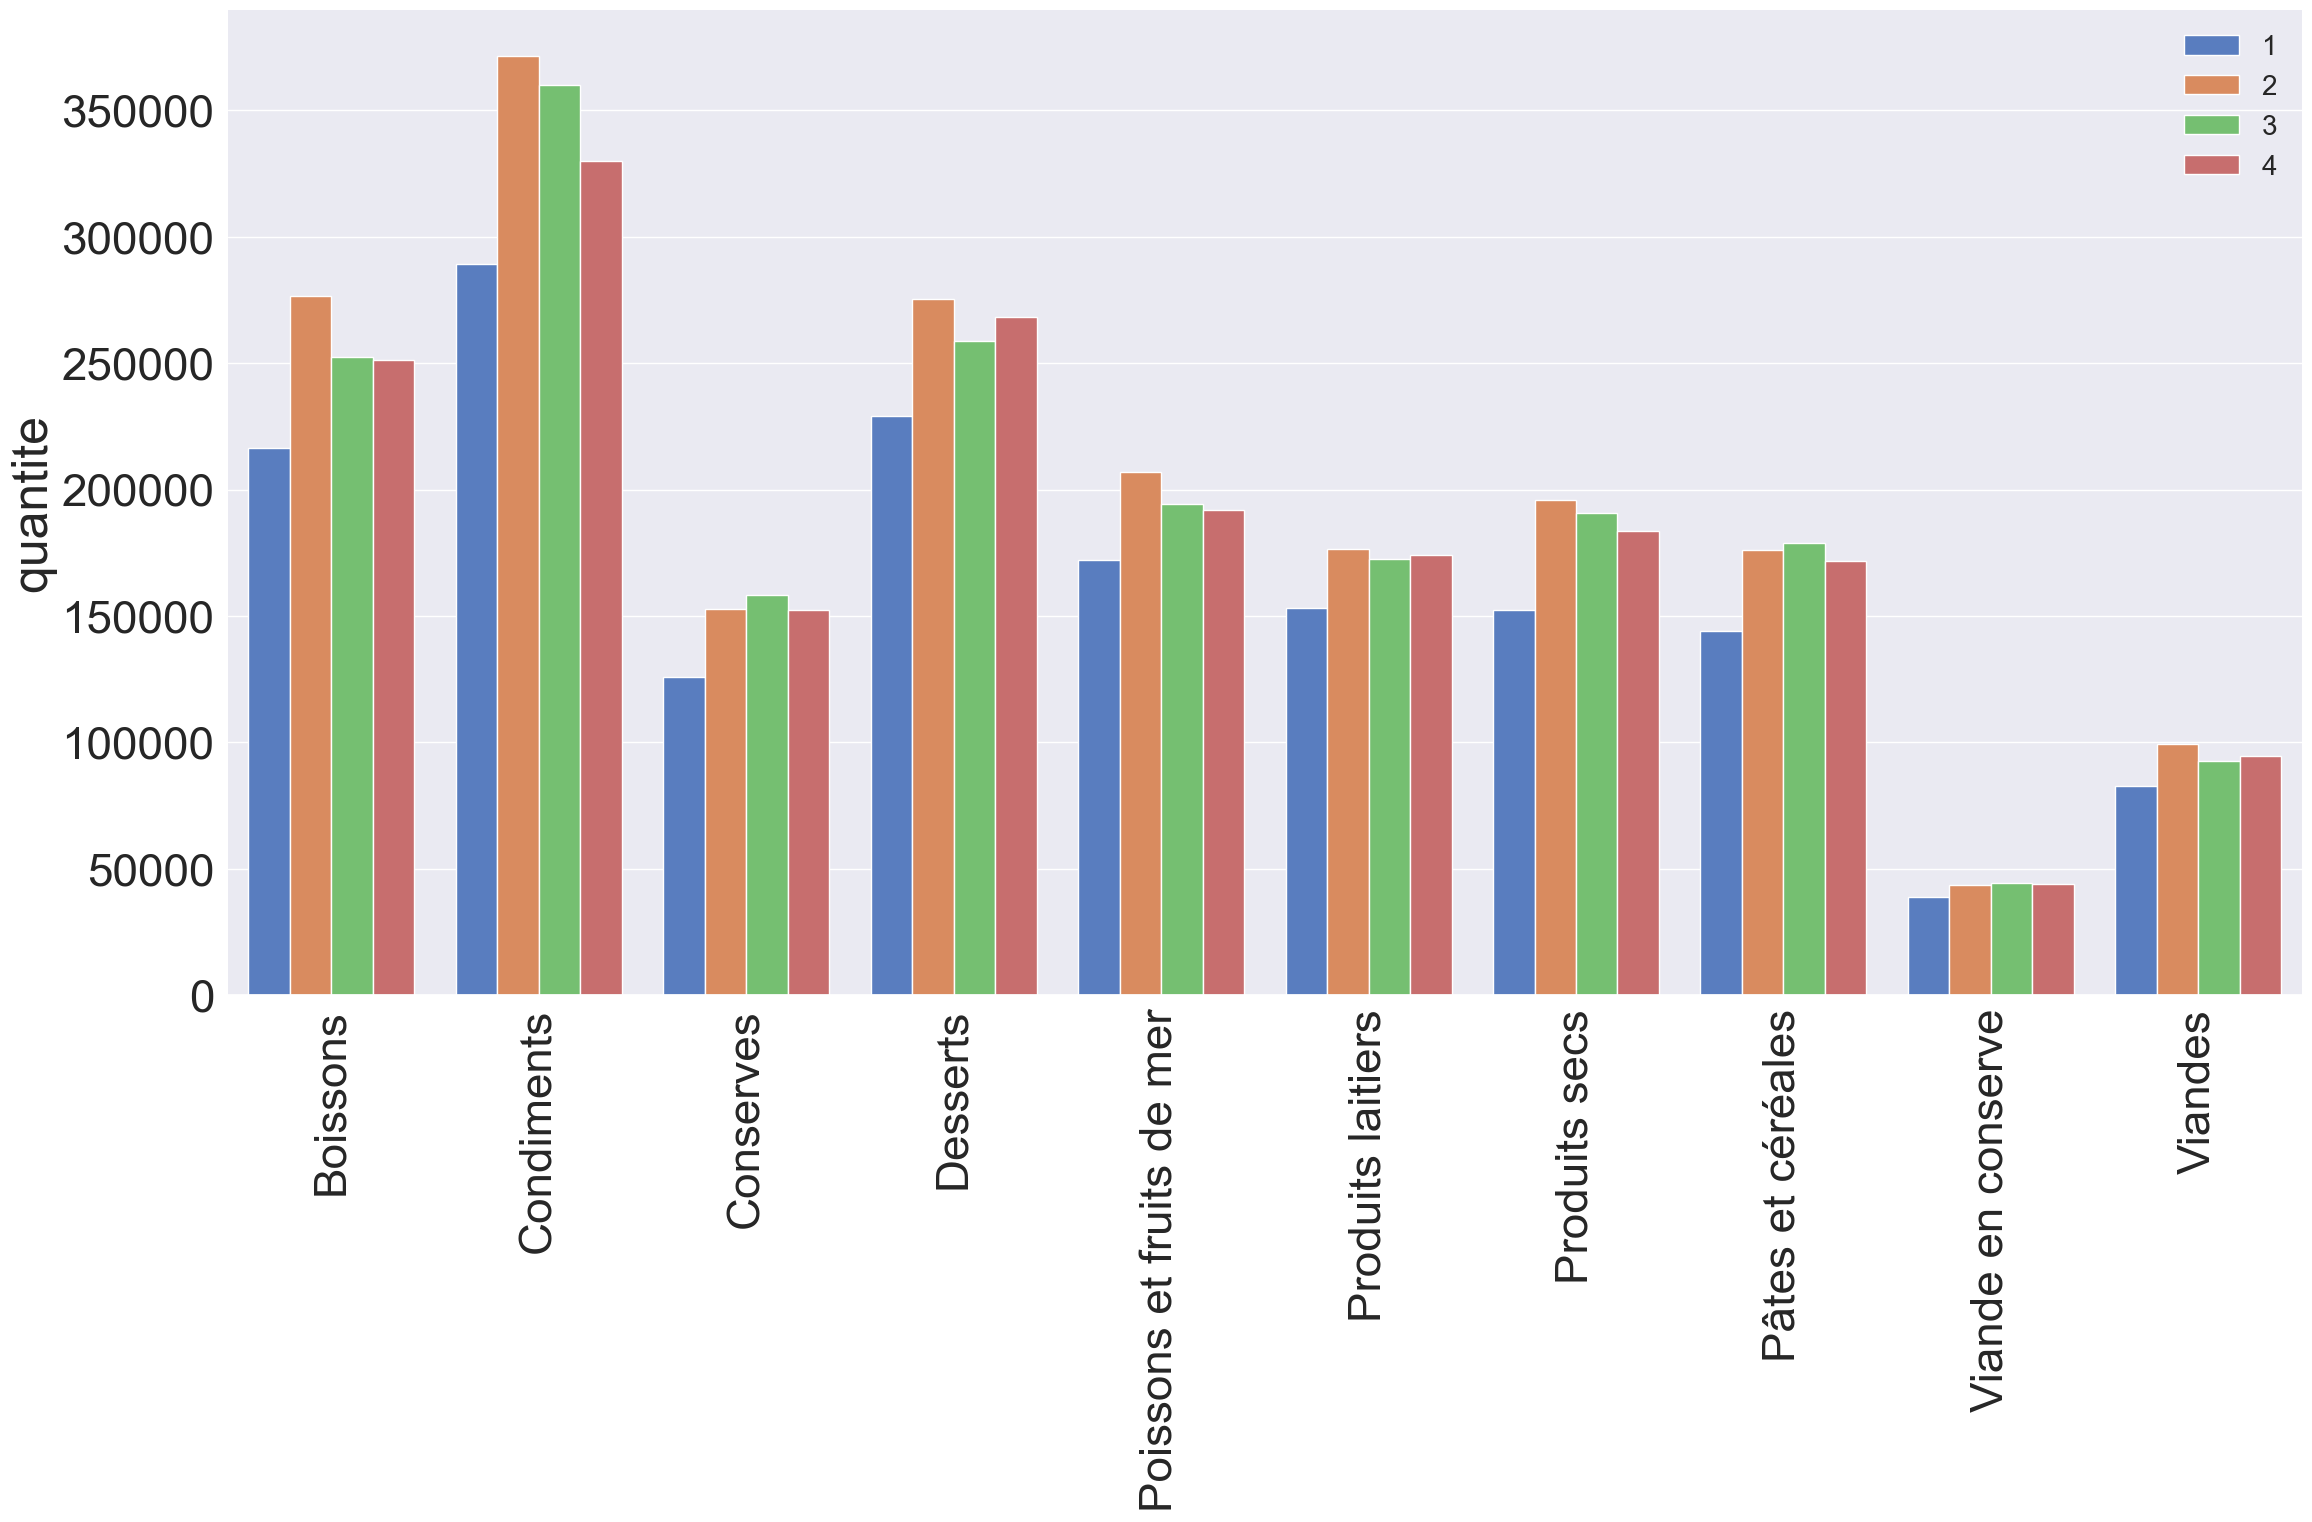

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que la colonne trimestre est de type str
donnees7['trimestre'] = donnees7['trimestre'].astype('str')

# Regroupez par catégorie et trimestre, en effectuant une somme ou une agrégation appropriée
grouped_data = donnees7.groupby(['categorie', 'trimestre'])['quantite'].sum().reset_index()

# Tracez le graphique en utilisant les données groupées
graph = sns.catplot(x="categorie", 
                    y="quantite", 
                    hue="trimestre", 
                    data=grouped_data,
                    height=12, 
                    kind="bar", 
                    aspect=2,
                    palette='muted',
                    legend=False)

graph.despine(left=True)
graph.set_xticklabels(rotation=90)
graph.set_xlabels('')
plt.legend(loc='upper right', title_fontsize=20, fontsize=20)
plt.show()


In [51]:
donnees_filtreesB = donnees7[donnees7['categorie'] == 'Boissons']
grouped_data = donnees_filtreesB.groupby(['produit', 'trimestre']).agg({'quantite': ['sum']})

grouped_data.head(32)

quantite
                                  sum
produit            trimestre         
Beer               1            12667
                   2            17165
                   3            14558
                   4            14311
Chai               1            14707
                   2            18303
                   3            17338
                   4            16768
Chang              1            13073
                   2            14618
                   3            15552
                   4            16896
Chartreuse verte   1            12934
                   2            16920
                   3            15421
                   4            12609
Coffee             1            13231
                   2            15904
                   3            15474
                   4            12863
Côte de Blaye      1            13244
                   2            20352
                   3            17808
                   4            13433
Green Tea          1            13448
                   2            16550
                   3            15421
                   4            16064
Guaraná Fantástica 1            15389
                   2            19321
                   3            14324
                   4            19077

In [52]:
grouped_data.tail(32)

quantite
                                         sum
produit                   trimestre         
Ipoh Coffee               1            14254
                          2            18887
                          3            14419
                          4            12694
Lakkalikööri              1             9397
                          2            20224
                          3            12874
                          4            14489
Laughing Lumberjack Lager 1            15356
                          2            13744
                          3            13983
                          4            15880
Outback Lager             1            15811
                          2            18049
                          3            19472
                          4            17475
Rhönbräu Klosterbier      1            14275
                          2            18481
                          3            17400
                          4            16458
Sasquatch Ale             1            14420
                          2            14632
                          3            16914
                          4            16690
Steeleye Stout            1            13356
                          2            14825
                          3            16888
                          4            17564
Tea                       1            10874
                          2            18345
                          3            14549
                          4            17803

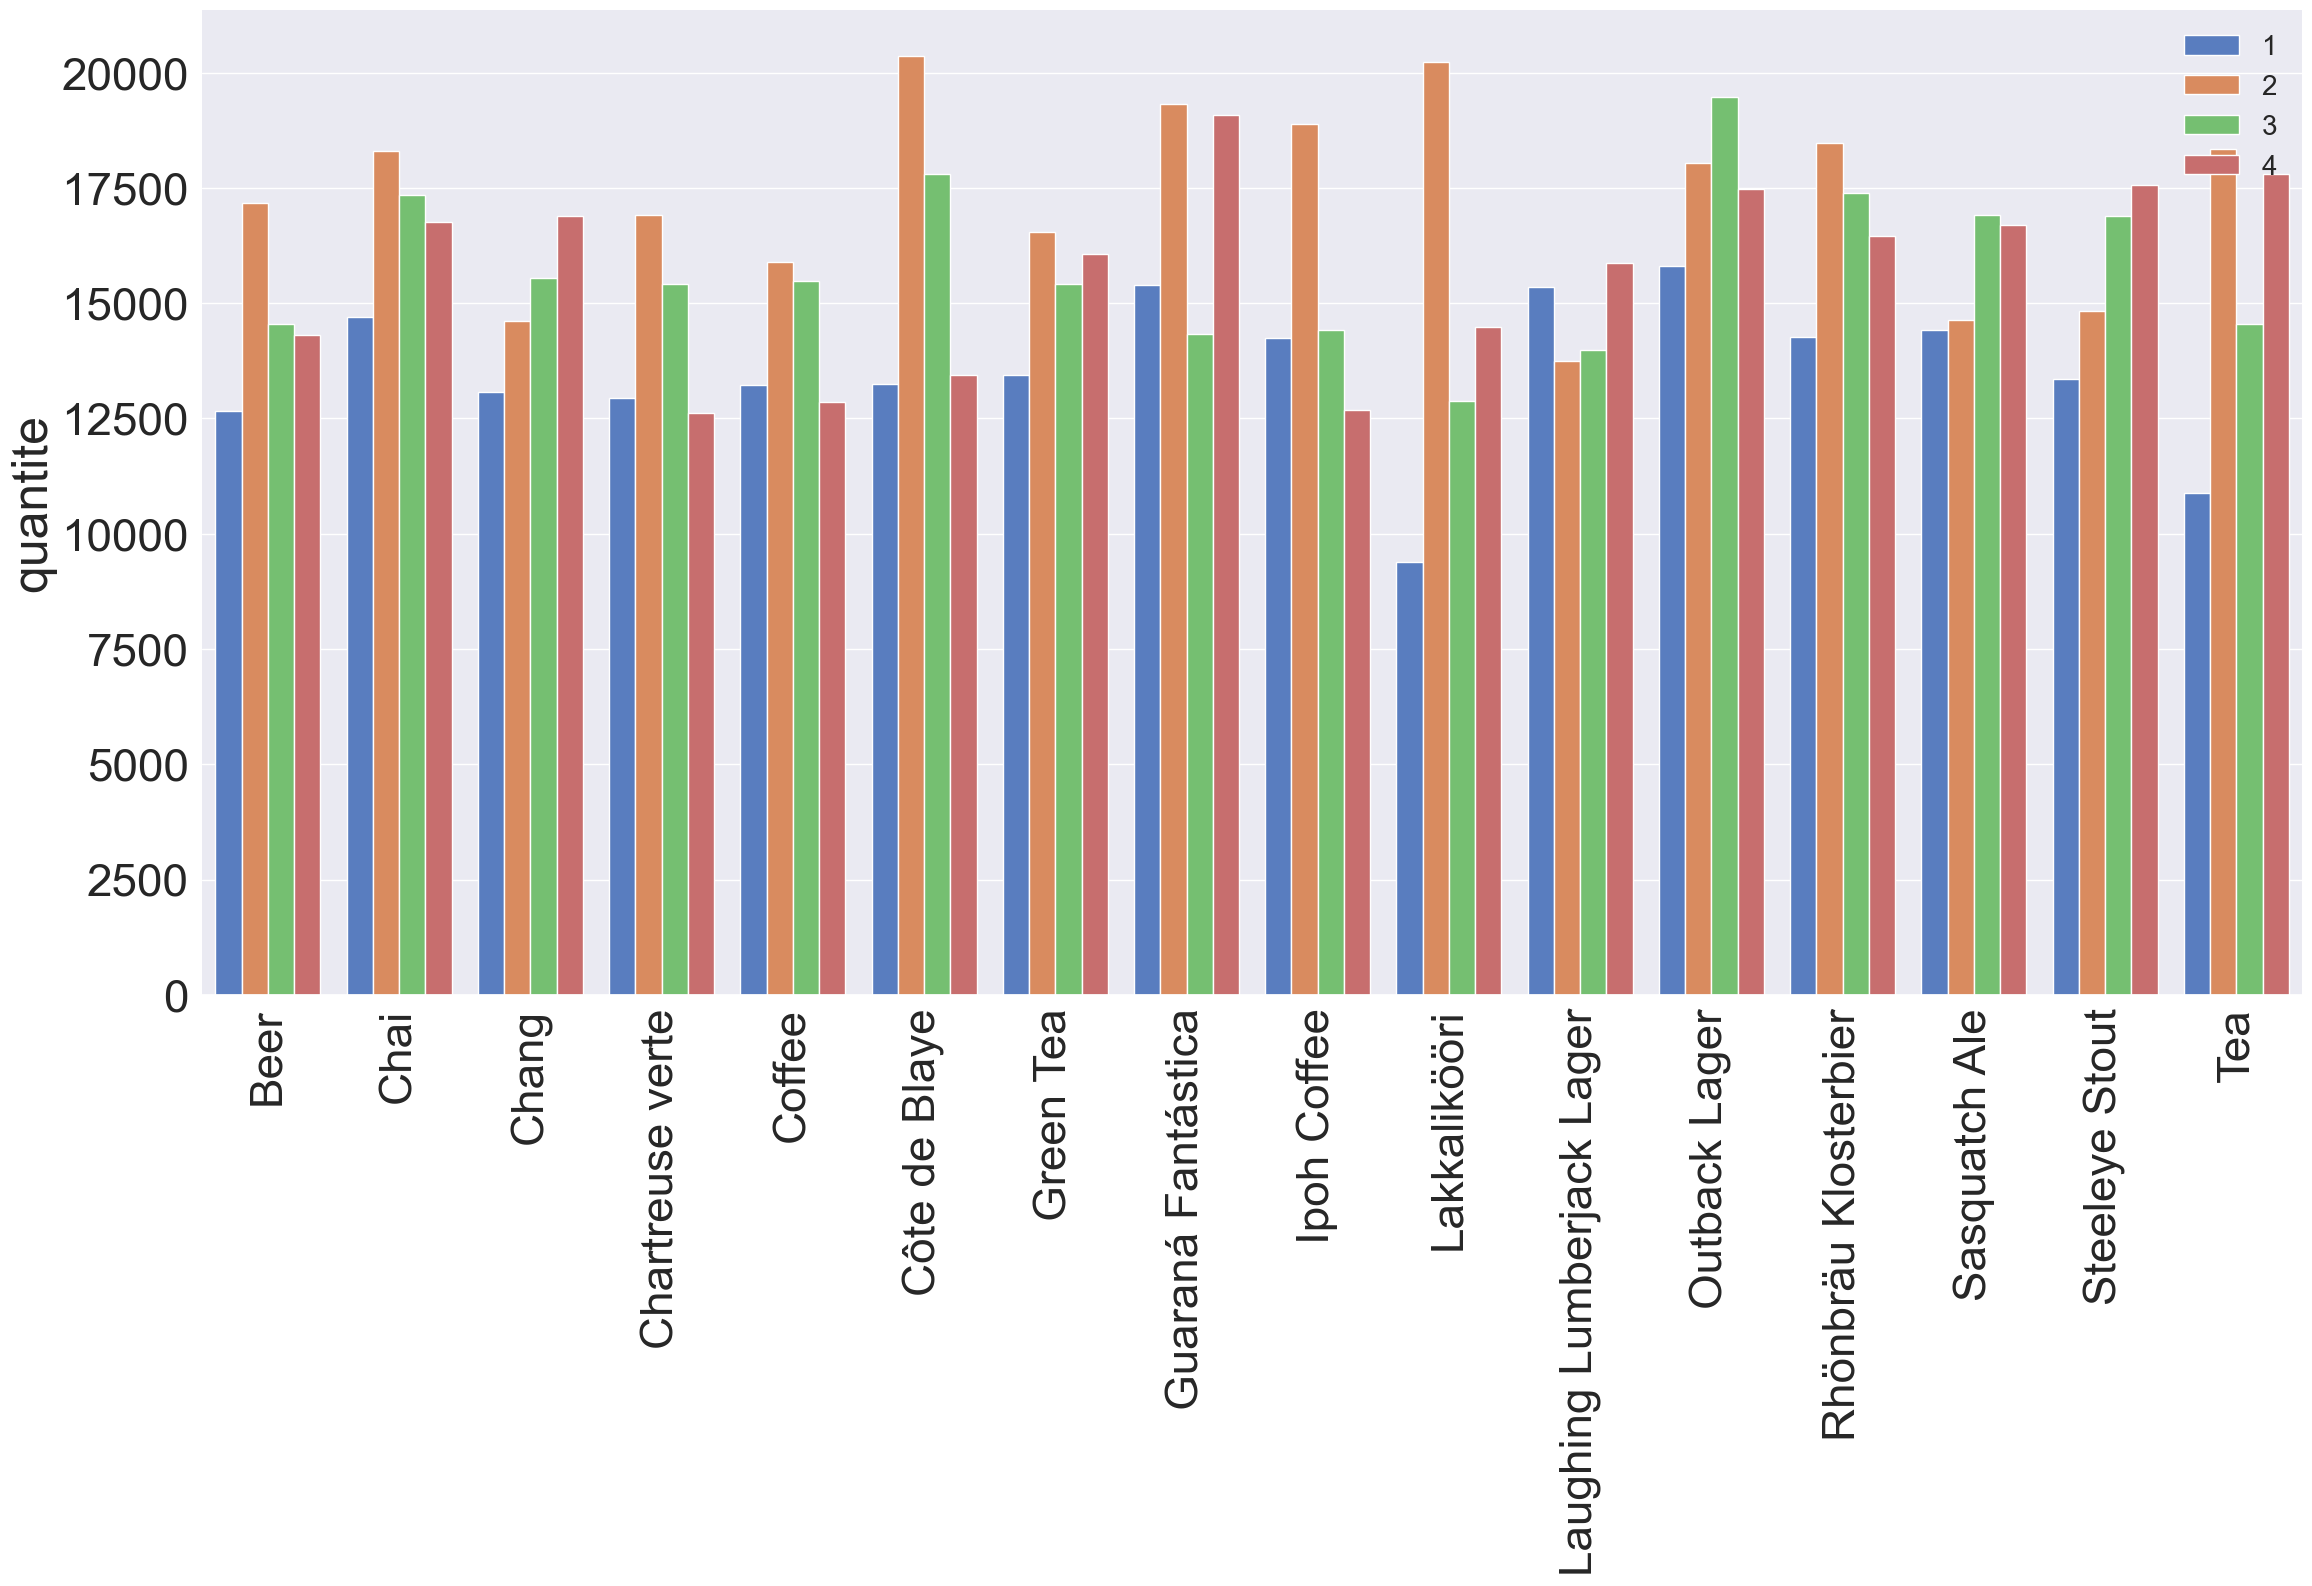

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que la colonne trimestre est de type str
donnees7['trimestre'] = donnees7['trimestre'].astype('str')

donnees_filtrees = donnees7[donnees7['categorie'] == 'Boissons']
# Regroupez par catégorie et trimestre, en effectuant une somme ou une agrégation appropriée
grouped_data = donnees_filtrees.groupby(['categorie', 'produit', 'trimestre'])['quantite'].sum().reset_index()

# Tracez le graphique en utilisant les données groupées
graph = sns.catplot(x="produit", 
                    y="quantite", 
                    hue="trimestre", 
                    data=grouped_data,
                    height=12, 
                    kind="bar", 
                    aspect=2,
                    palette='muted',
                    legend=False)

graph.despine(left=True)
graph.set_xticklabels(rotation=90)
graph.set_xlabels('')
plt.legend(loc='upper right', title_fontsize=20, fontsize=20)
plt.show()


In [54]:
donnees8 = pd.read_csv("Q8.csv", sep=";" , encoding='cp1252')
donnees8.columns = list(map(lambda x: x.lower(),donnees8.columns))
donnees8.head()

categorie           produit  count_
0  Boissons              Beer    1090
1  Boissons              Chai    1108
2  Boissons             Chang    1084
3  Boissons  Chartreuse verte    1090
4  Boissons            Coffee    1081

In [55]:
#  top 10 categories ont le plus mouvements dans le stock 
resultats = donnees8.groupby('categorie').agg({'count_': ['sum']}).reset_index()
resultats = resultats.sort_values(by=('count_', 'sum'), ascending=False)
resultats.head(10)

categorie count_
                                sum
1                 Condiments  23944
3                   Desserts  18645
0                   Boissons  17577
4  Poissons et fruits de mer  13160
6              Produits secs  13095
5          Produits laitiers  12047
7          Pâtes et céréales  11983
2                  Conserves  10885
9                    Viandes   6597
8         Viande en conserve   3289

In [56]:
#  top 10 produits ont le plus mouvements dans le stock 
resultats = donnees8.groupby('produit').agg({'count_': ['sum']}).reset_index()
resultats = resultats.sort_values(by=('count_', 'sum'), ascending=False)
resultats.head(10)

produit count_
                          sum
86             Ravioli   1129
66     Mishi Kobe Niku   1124
9    Camembert Pierrot   1124
91         Røgede sild   1123
89          Röd Kaviar   1119
112           Tunnbröd   1119
26        Dried Apples   1119
74       Outback Lager   1118
28         Dried Plums   1117
41           Green Tea   1117

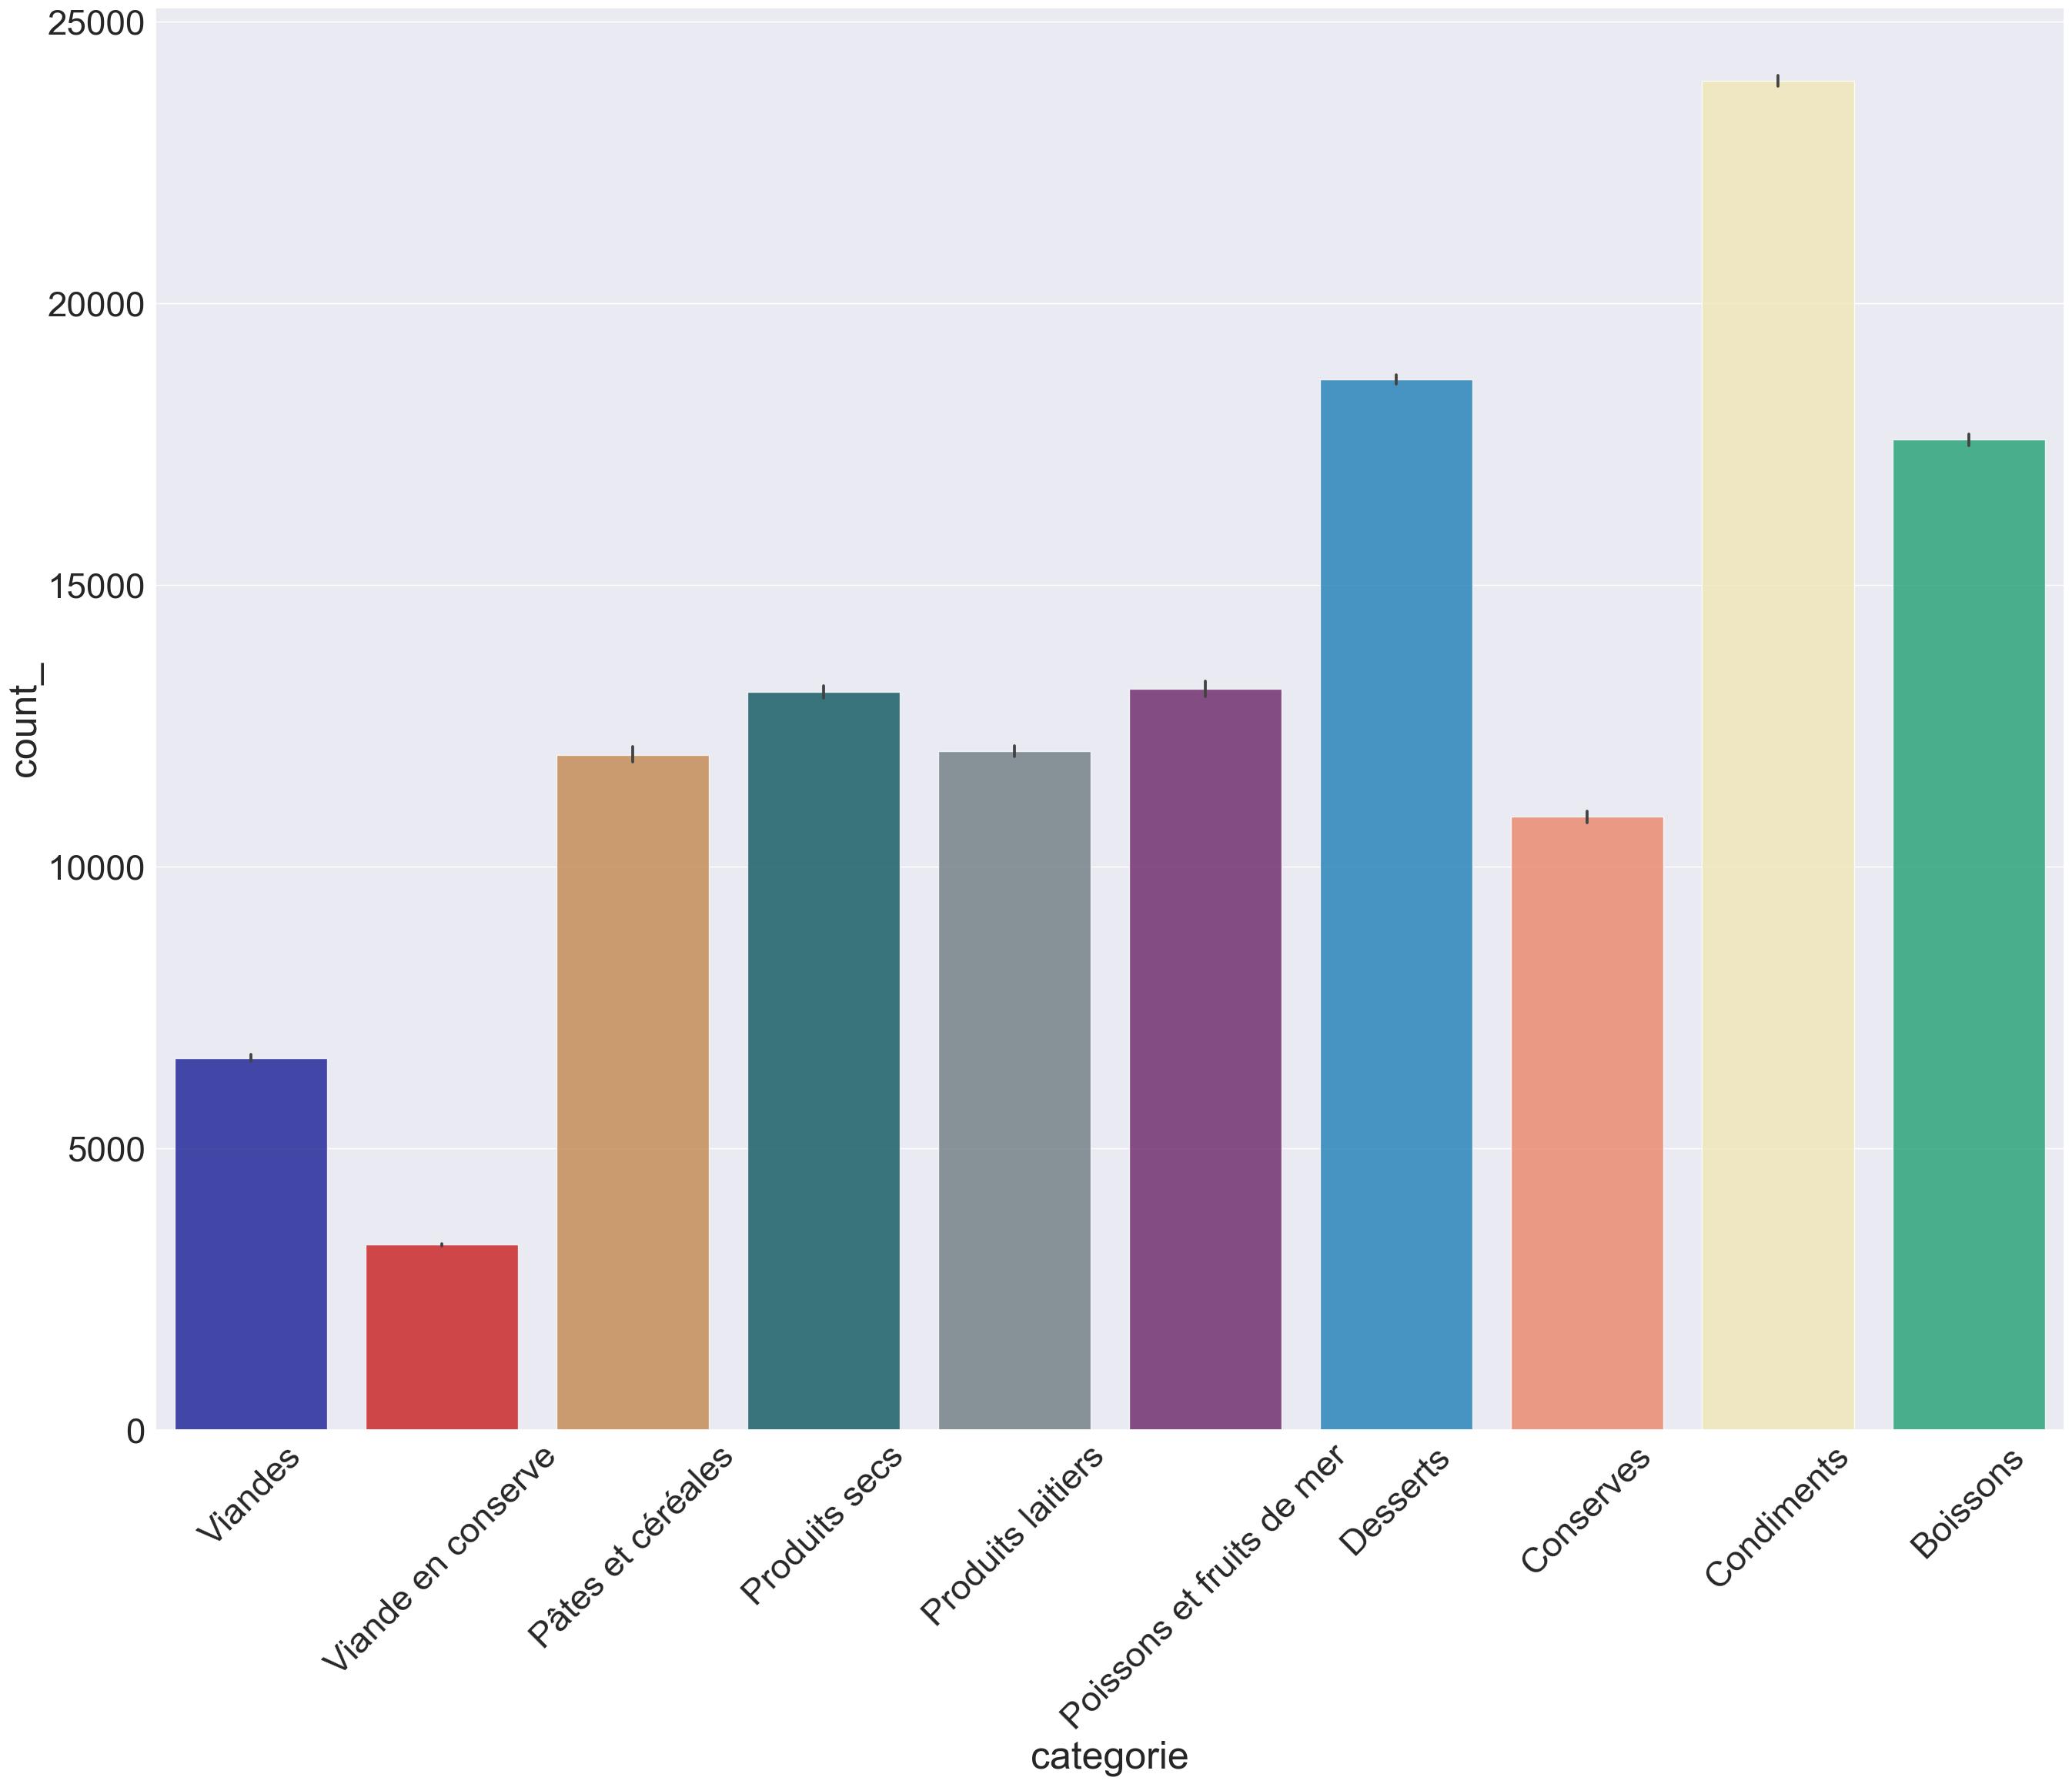

In [57]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='categorie',y='count_',data=donnees8.sort_values('categorie',ascending=False),palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);


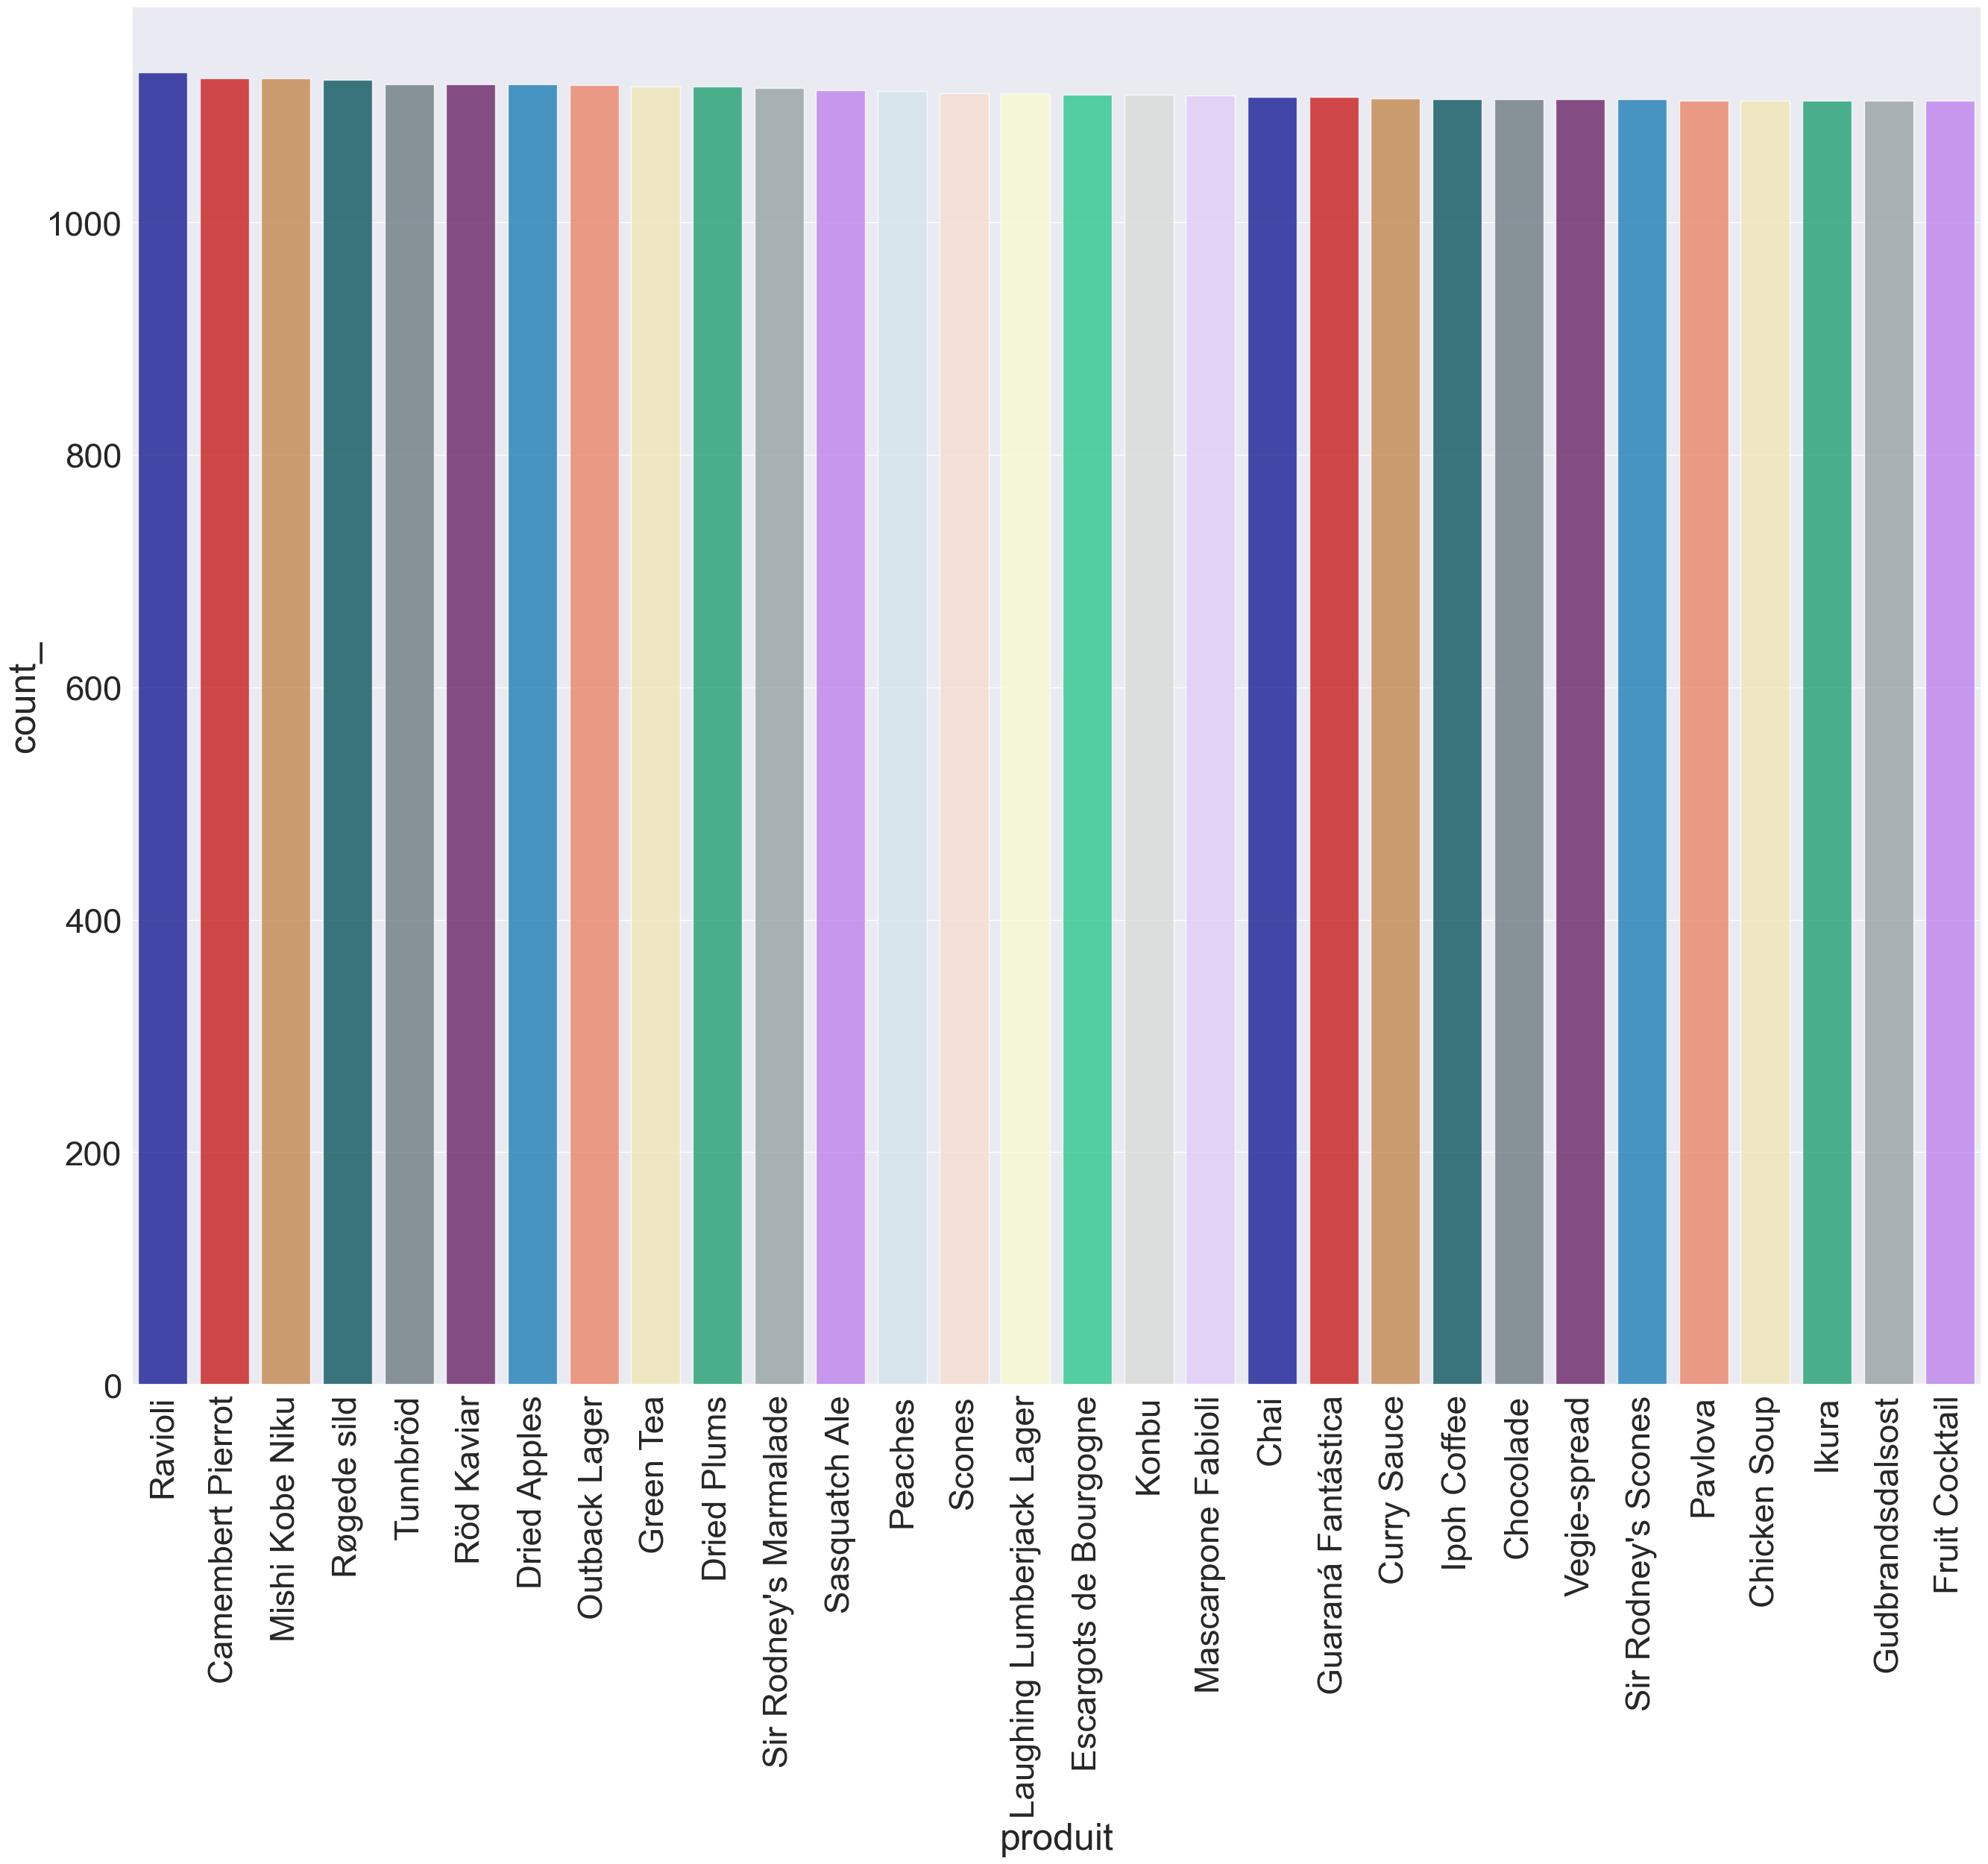

In [58]:
plt.figure(figsize=(32,24))
sorted_data = donnees8.sort_values('count_', ascending=False)
top_10_data = sorted_data.head(30)
gbarplot = sns.barplot(x='produit',y='count_',data=top_10_data.sort_values('count_',ascending=False),palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=90);


In [59]:
donnees9 = pd.read_csv("Q9.csv", sep=";" , encoding='cp1252')
donnees9.columns = list(map(lambda x: x.lower(),donnees9.columns))
donnees9.head(10)

categorie              produit  produit_1  retourne  \
0         Viande en conserve            Crab Meat         90         0   
1                   Boissons               Coffee         92         0   
2         Viande en conserve        Smoked Salmon        117         0   
3                   Boissons     Chartreuse verte         39         0   
4  Poissons et fruits de mer           Gravad lax         37         0   
5              Produits secs      Long Grain Rice         94         0   
6                  Conserves          Green Beans        113         0   
7                   Desserts  Sir Rodney's Scones         21         0   
8                 Condiments     Hot Pepper Sauce         97         0   
9              Produits secs          Dried Pears         82         0   

   quantite  
0     56596  
1     57085  
2     59184  
3     57206  
4     57589  
5     59578  
6     60658  
7     68431  
8     55104  
9     60878

In [60]:
donnees9.groupby(['retourne']).agg({'quantite':['sum','mean','std']})

quantite                           
              sum          mean          std
retourne                                    
0         7282547  60687.891667  4676.004217
1           58491    517.619469   336.564081

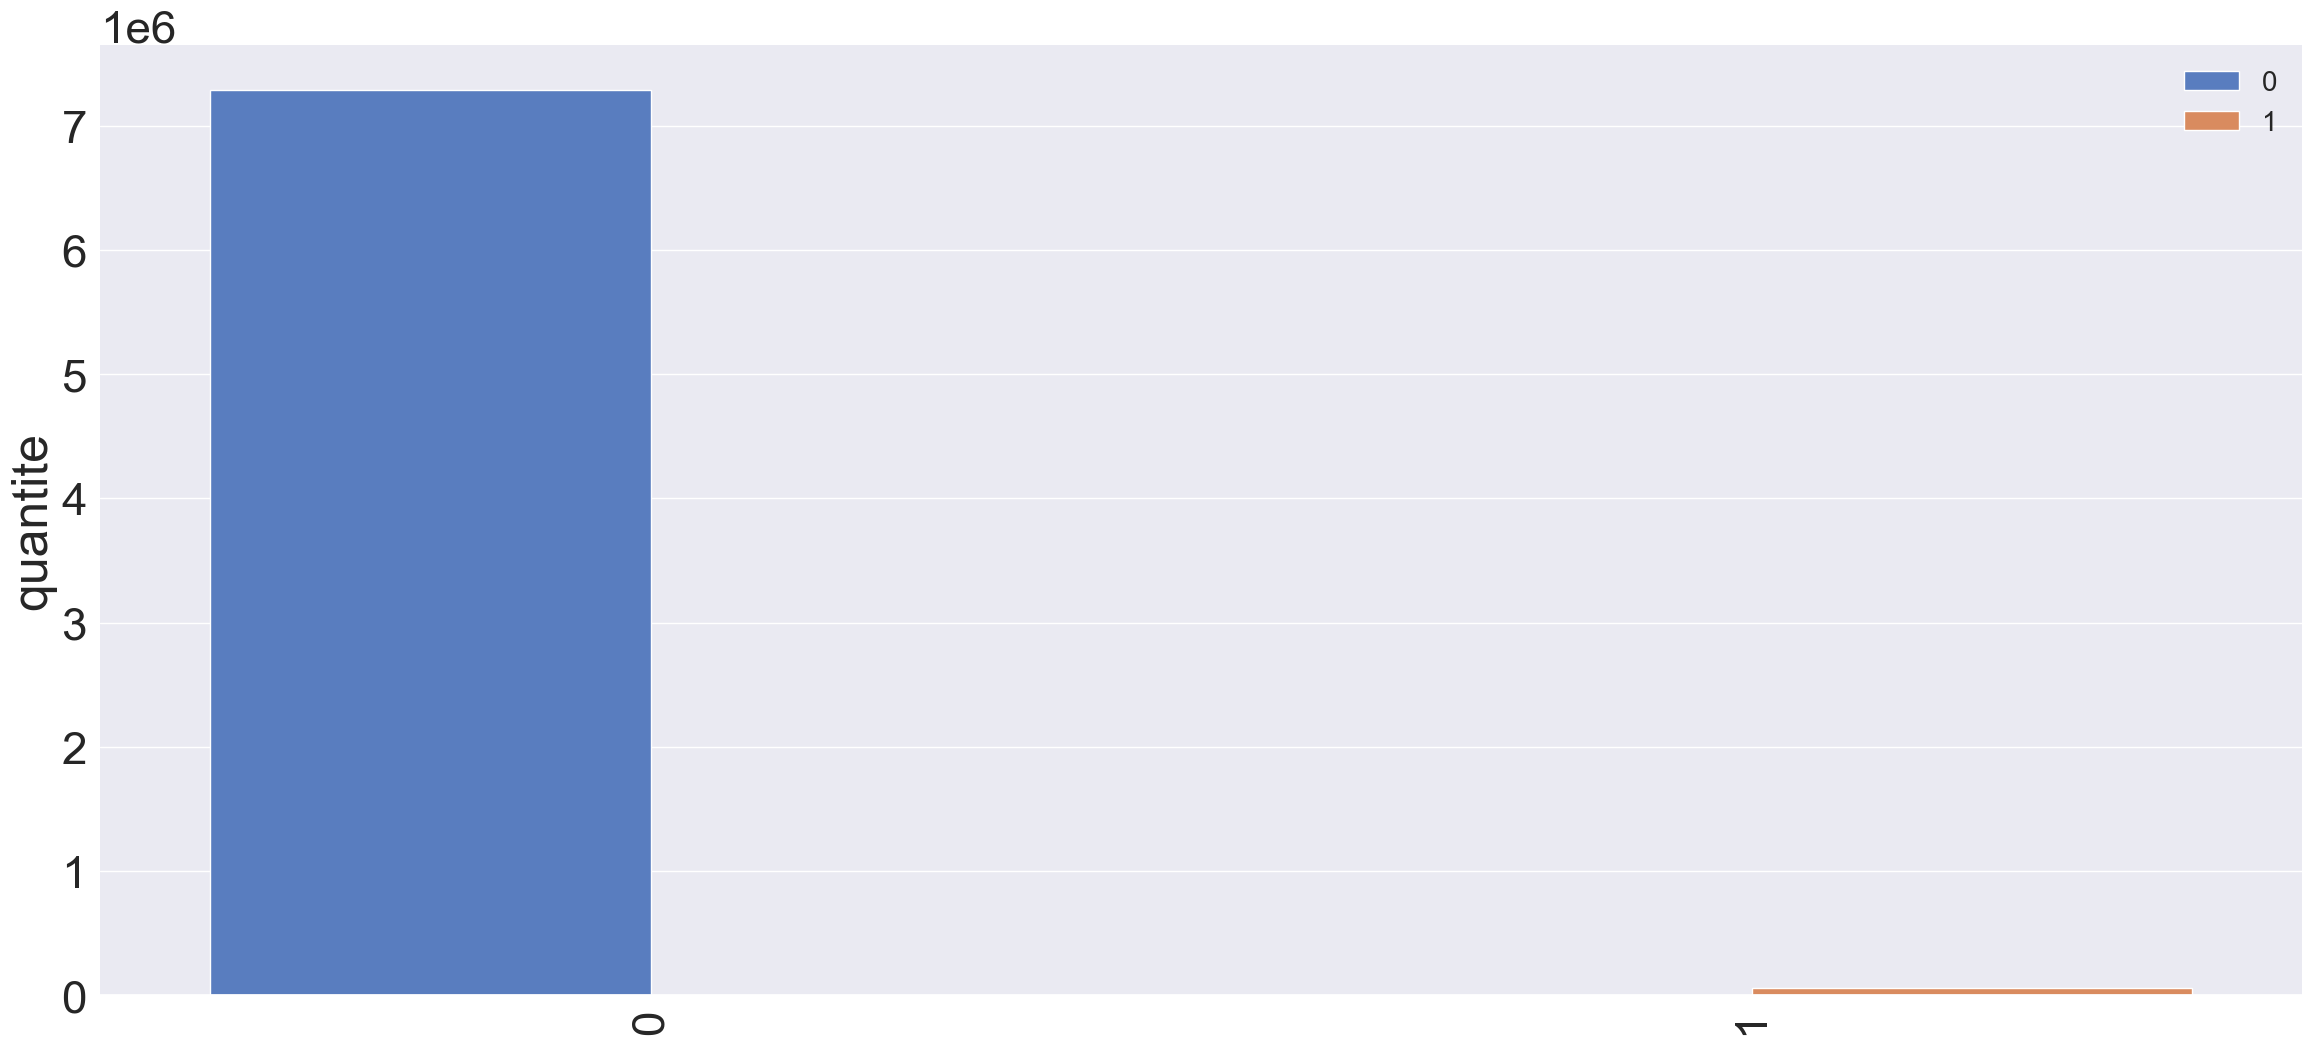

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que la colonne trimestre est de type str
donnees9['retourne'] = donnees9['retourne'].astype('str')

# Regroupez par catégorie et trimestre, en effectuant une somme ou une agrégation appropriée
grouped_data = donnees9.groupby([ 'retourne'])['quantite'].sum().reset_index()

# Tracez le graphique en utilisant les données groupées
graph = sns.catplot(x="retourne", 
                    y="quantite", 
                    hue="retourne", 
                    data=grouped_data,
                    height=12, 
                    kind="bar", 
                    aspect=2,
                    palette='muted',
                    legend=False)

graph.despine(left=True)
graph.set_xticklabels(rotation=90)
graph.set_xlabels('')
plt.legend(loc='upper right', title_fontsize=20, fontsize=20)
plt.show()


In [62]:
donnees9.groupby(['categorie','retourne']).agg({'quantite':['sum','mean','std']})

quantite                           
                                        sum          mean          std
categorie                 retourne                                    
Boissons                  0          988627  61789.187500  4157.839891
                          1            7598    506.533333   279.243843
Condiments                0         1339010  60864.090909  3808.370892
                          1           11247    535.571429   305.849239
Conserves                 0          585188  58518.800000  4514.384437
                          1            4190    465.555556   327.755668
Desserts                  0         1023252  60191.294118  5641.739523
                          1            7829    521.933333   237.055589
Poissons et fruits de mer 0          759249  63270.750000  6023.126221
                          1            5960    541.818182   349.515327
Produits laitiers         0          672265  61115.000000  3274.217983
                          1            3700    336.363636   189.883266
Produits secs             0          716340  59695.000000  2730.340305
                          1            6183    562.090909   299.008513
Pâtes et céréales         0          663414  60310.363636  5560.896659
                          1            7064    642.181818   545.824481
Viande en conserve        0          168364  56121.333333  3325.504673
                          1            2443    814.333333   872.337282
Viandes                   0          366838  61139.666667  6247.668194
                          1            2277    379.500000   160.387967

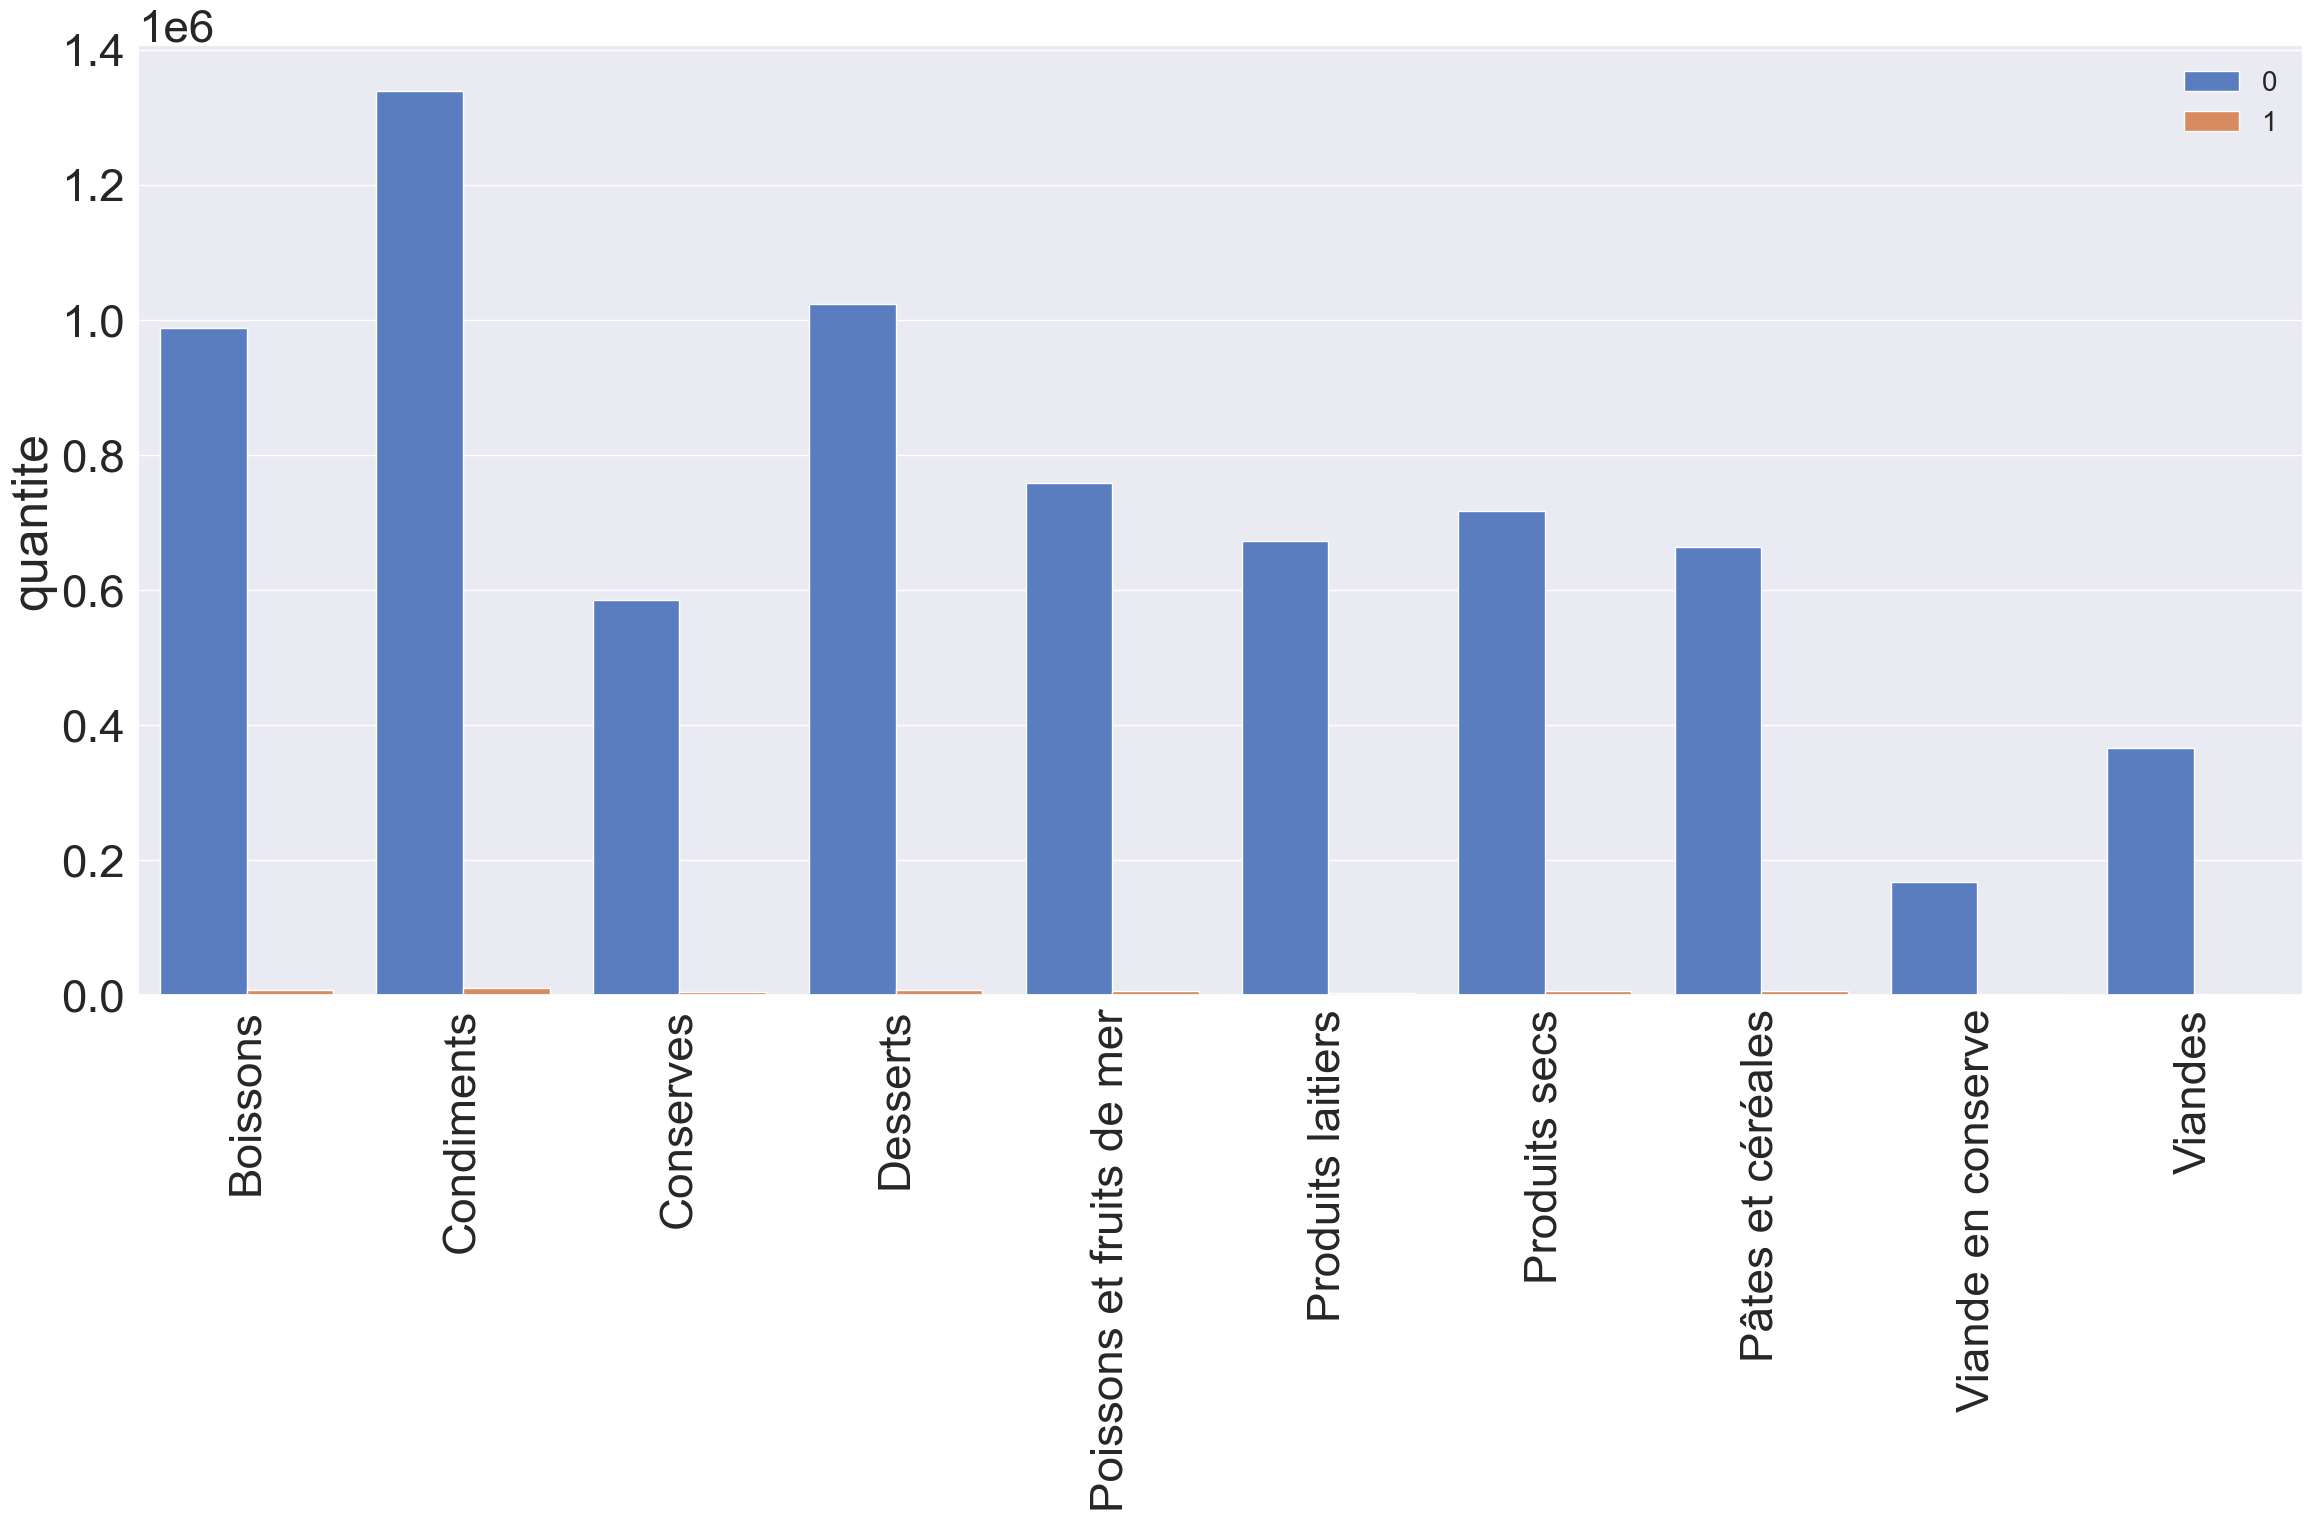

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que la colonne trimestre est de type str
donnees9['retourne'] = donnees9['retourne'].astype('str')

# Regroupez par catégorie et trimestre, en effectuant une somme ou une agrégation appropriée
grouped_data = donnees9.groupby([ 'categorie', 'retourne'])['quantite'].sum().reset_index()

# Tracez le graphique en utilisant les données groupées
graph = sns.catplot(x="categorie", 
                    y="quantite", 
                    hue="retourne", 
                    data=grouped_data,
                    height=12, 
                    kind="bar", 
                    aspect=2,
                    palette='muted',
                    legend=False)

graph.despine(left=True)
graph.set_xticklabels(rotation=90)
graph.set_xlabels('')
plt.legend(loc='upper right', title_fontsize=20, fontsize=20)
plt.show()


In [64]:
donnees9.groupby(['produit','retourne']).agg({'quantite':['sum','mean']})

quantite         
                                        sum     mean
produit                   retourne                  
Alice Mutton              0           61960  61960.0
                          1             241    241.0
Amandes                   0           58944  58944.0
                          1             216    216.0
Aniseed Syrup             0           63523  63523.0
...                                     ...      ...
Walnuts                   1             322    322.0
Wimmers gute Semmelknödel 0           66022  66022.0
                          1             574    574.0
Zaanse koeken             0           61986  61986.0
                          1             830    830.0

[233 rows x 2 columns]

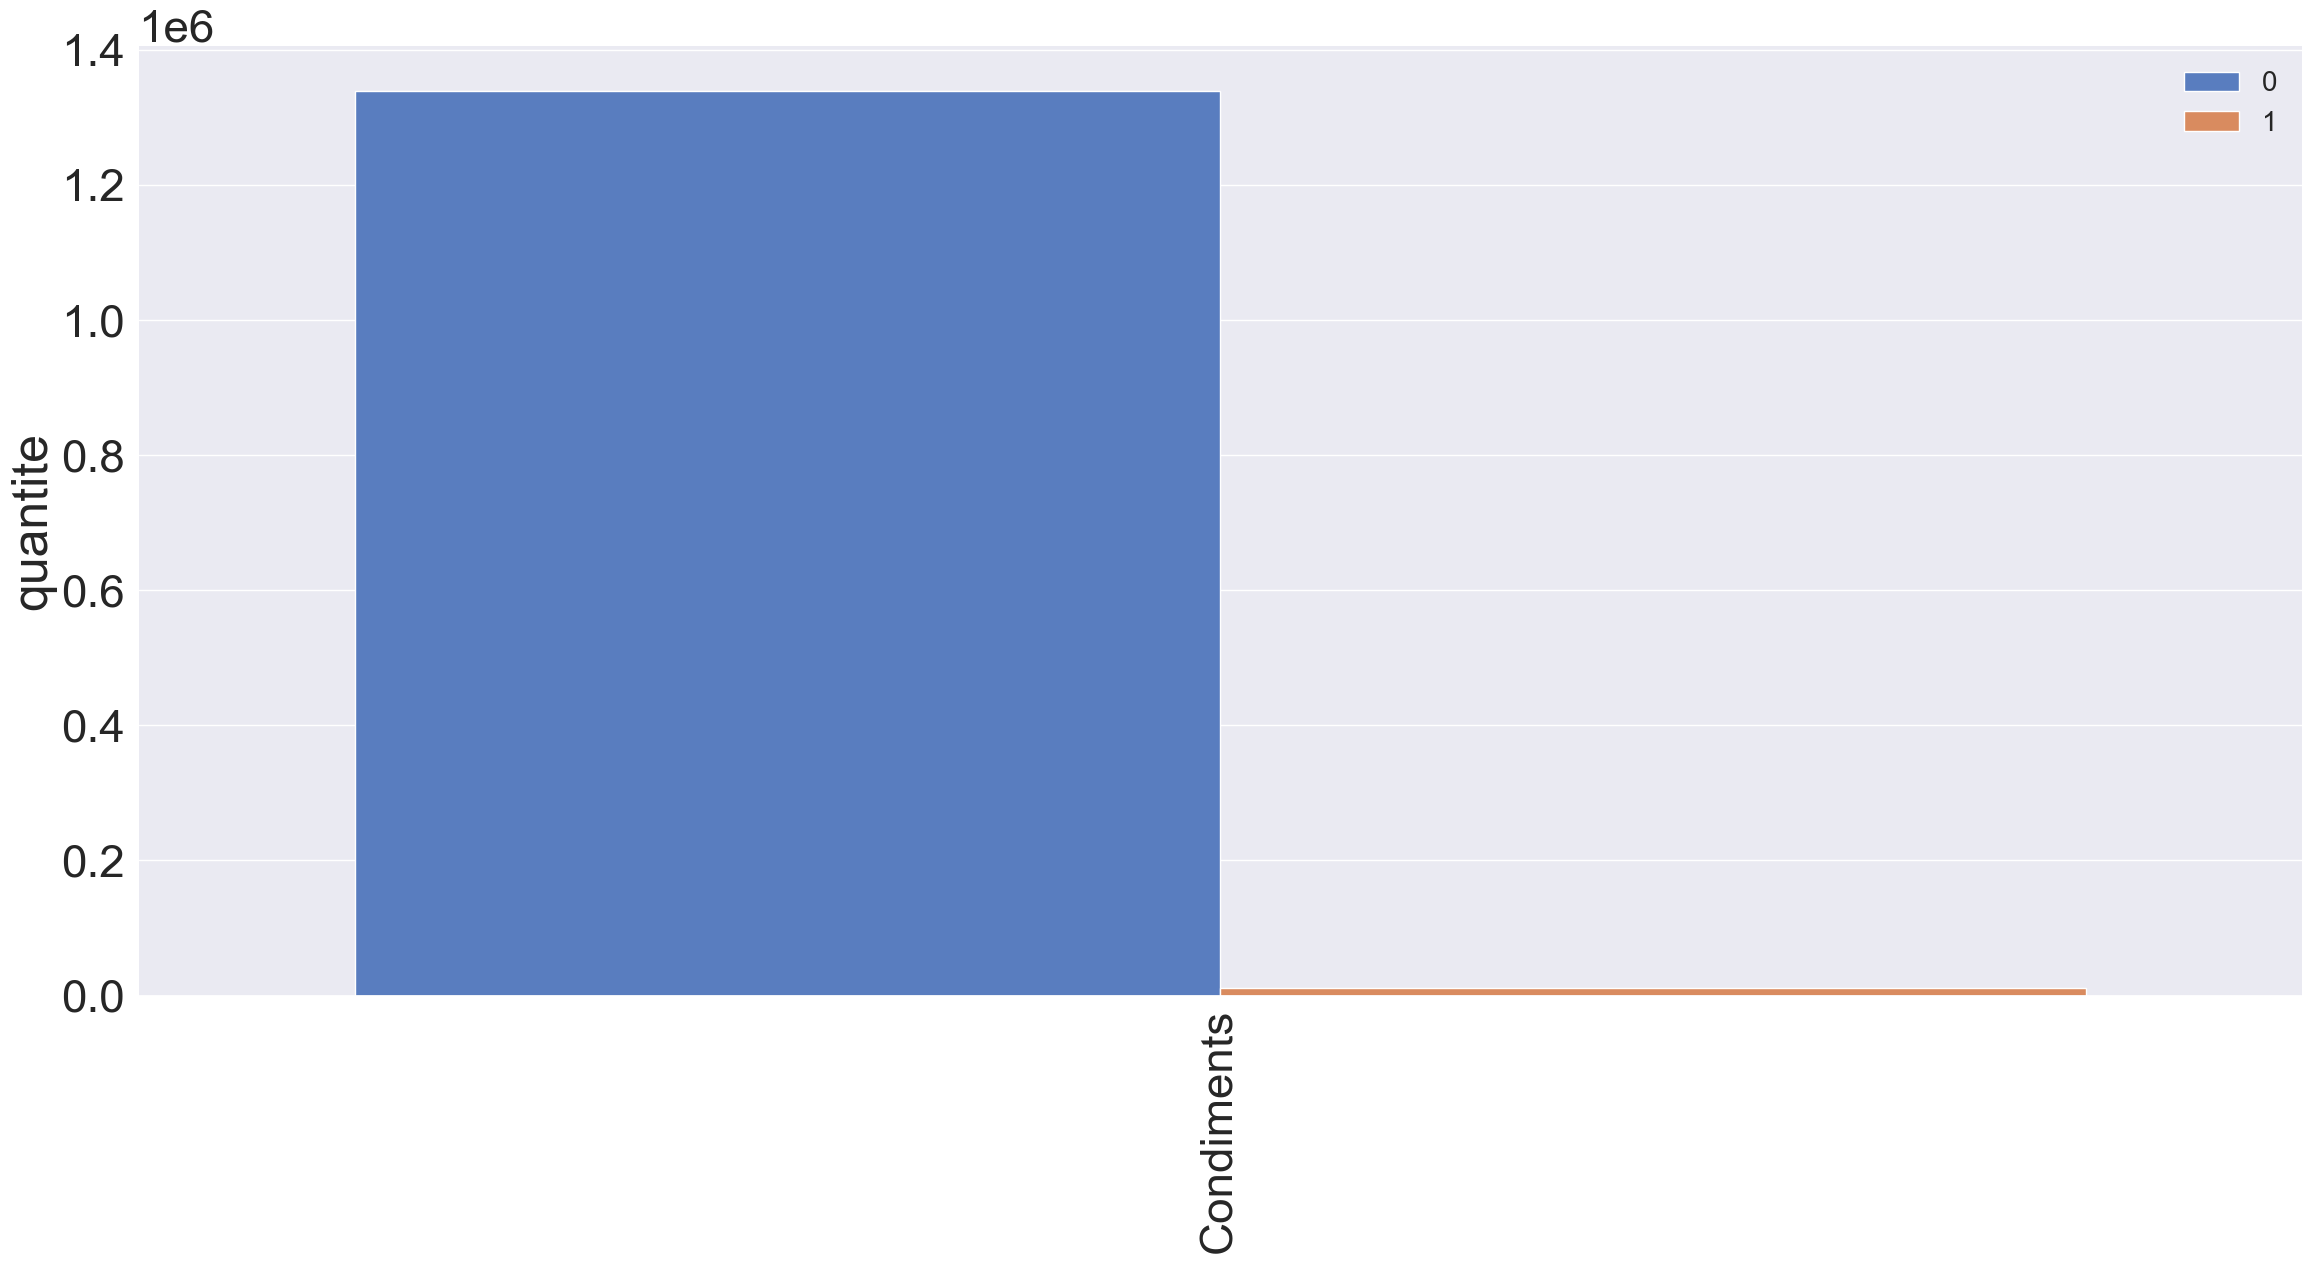

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que la colonne trimestre est de type str
donnees9['retourne'] = donnees9['retourne'].astype('str')

donnees9_filtrees = donnees9[donnees9['categorie'] == 'Condiments']

# Regroupez par catégorie et trimestre, en effectuant une somme ou une agrégation appropriée
grouped_data = donnees9_filtrees.groupby([ 'categorie', 'retourne'])['quantite'].sum().reset_index()

# Tracez le graphique en utilisant les données groupées
graph = sns.catplot(x="categorie", 
                    y="quantite", 
                    hue="retourne", 
                    data=grouped_data,
                    height=12, 
                    kind="bar", 
                    aspect=2,
                    palette='muted',
                    legend=False)

graph.despine(left=True)
graph.set_xticklabels(rotation=90)
graph.set_xlabels('')
plt.legend(loc='upper right', title_fontsize=20, fontsize=20)
plt.show()


In [66]:
donnees10 = pd.read_csv("Q10.csv", sep=";" , encoding='cp1252')
donnees10.CHIFFRE_AFFAIRE= donnees10.CHIFFRE_AFFAIRE.apply(lambda x: str(x).replace(',','.')).astype('float32')
donnees10.PORT   = donnees10.PORT.apply(lambda x: str(x).replace(',','.')).astype('float32')
donnees10.columns = list(map(lambda x: x.lower(),donnees10.columns))
donnees10.head()

produit                  produit_1        pays  quantite         port  \
0       45                Røgede sild      Brésil      6949  4805.000000   
1       18           Carnarvon Tigers   Singapour      5263  3885.300049   
2       12  Queso Manchego La Pastora      Brésil      7905  5235.899902   
3      117              Smoked Salmon  États-Unis     12211  8376.900391   
4       90                  Crab Meat  États-Unis     10226  8065.600098   

   chiffre_affaire  
0     356172.68750  
1     317672.09375  
2     551073.93750  
3     617429.50000  
4     822904.06250

In [67]:

result = donnees10.groupby(['pays']).agg({'quantite':'sum'})
result_sortedQ = result.sort_values(by='quantite', ascending=False)  # Change 'ascending' to False for descending order
result_sortedQ.head(10)

quantite
pays                 
Italie        2313894
États-Unis    1526616
Royaume-Uni   1345038
Brésil         877492
Singapour      497476
France         427937
Allemagne      352585

In [68]:

result = donnees10.groupby(['pays']).agg({'port':'sum'})
result_sortedP = result.sort_values(by='port', ascending=False)  # Change 'ascending' to False for descending order
result_sortedP.head(10)

port
pays                     
Italie       1.572853e+06
États-Unis   1.049659e+06
Royaume-Uni  9.048097e+05
Brésil       5.837628e+05
Singapour    3.460477e+05
France       2.841384e+05
Allemagne    2.449163e+05

In [69]:
result = donnees10.groupby(['pays']).agg({'chiffre_affaire':'sum'})
result_sortedCA = result.sort_values(by='chiffre_affaire', ascending=False)  # Change 'ascending' to False for descending order
result_sortedCA.head(10)

chiffre_affaire
pays                        
Italie           136486656.0
États-Unis        90198360.0
Royaume-Uni       79516936.0
Brésil            51765568.0
Singapour         29252824.0
France            25262736.0
Allemagne         20724630.0

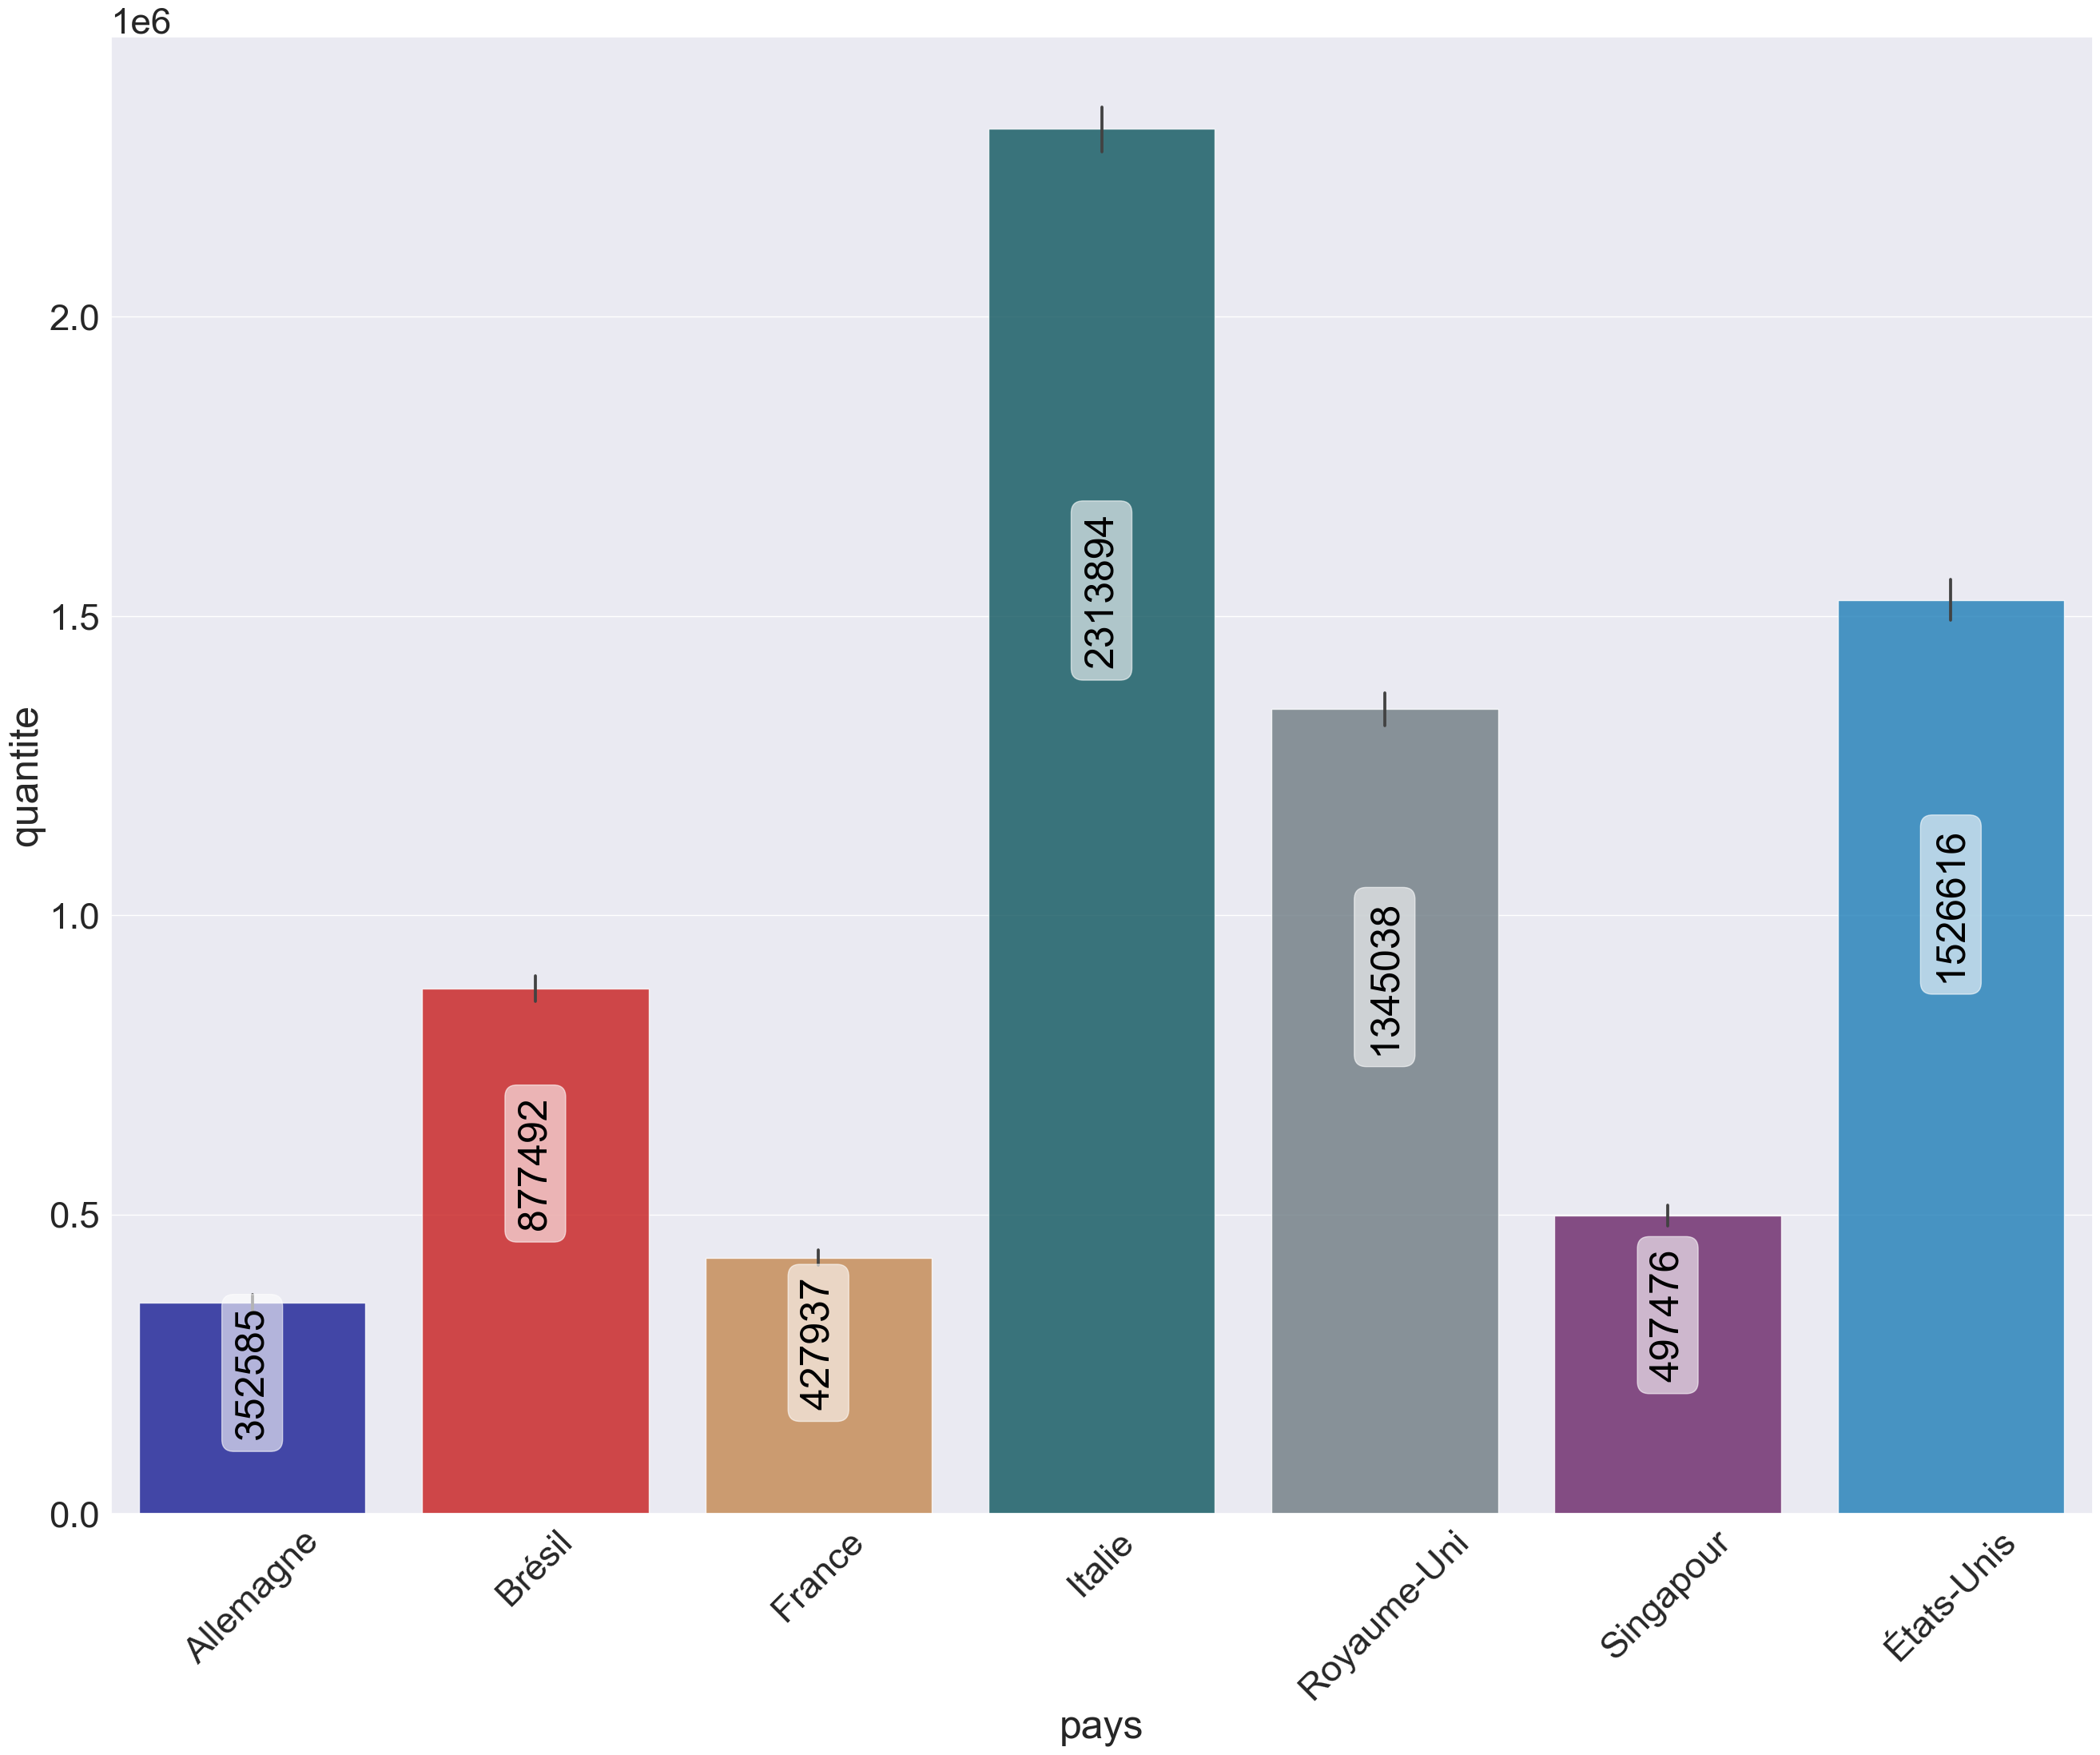

In [70]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='pays',y='quantite',data=donnees10.sort_values('pays'),palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

for i,nb in enumerate(donnees10.groupby('pays').quantite.sum().sort_index().values):
    gbarplot.text(
                i ,
                nb-nb//3,
                nb,
                color='black',
                rotation='vertical',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )

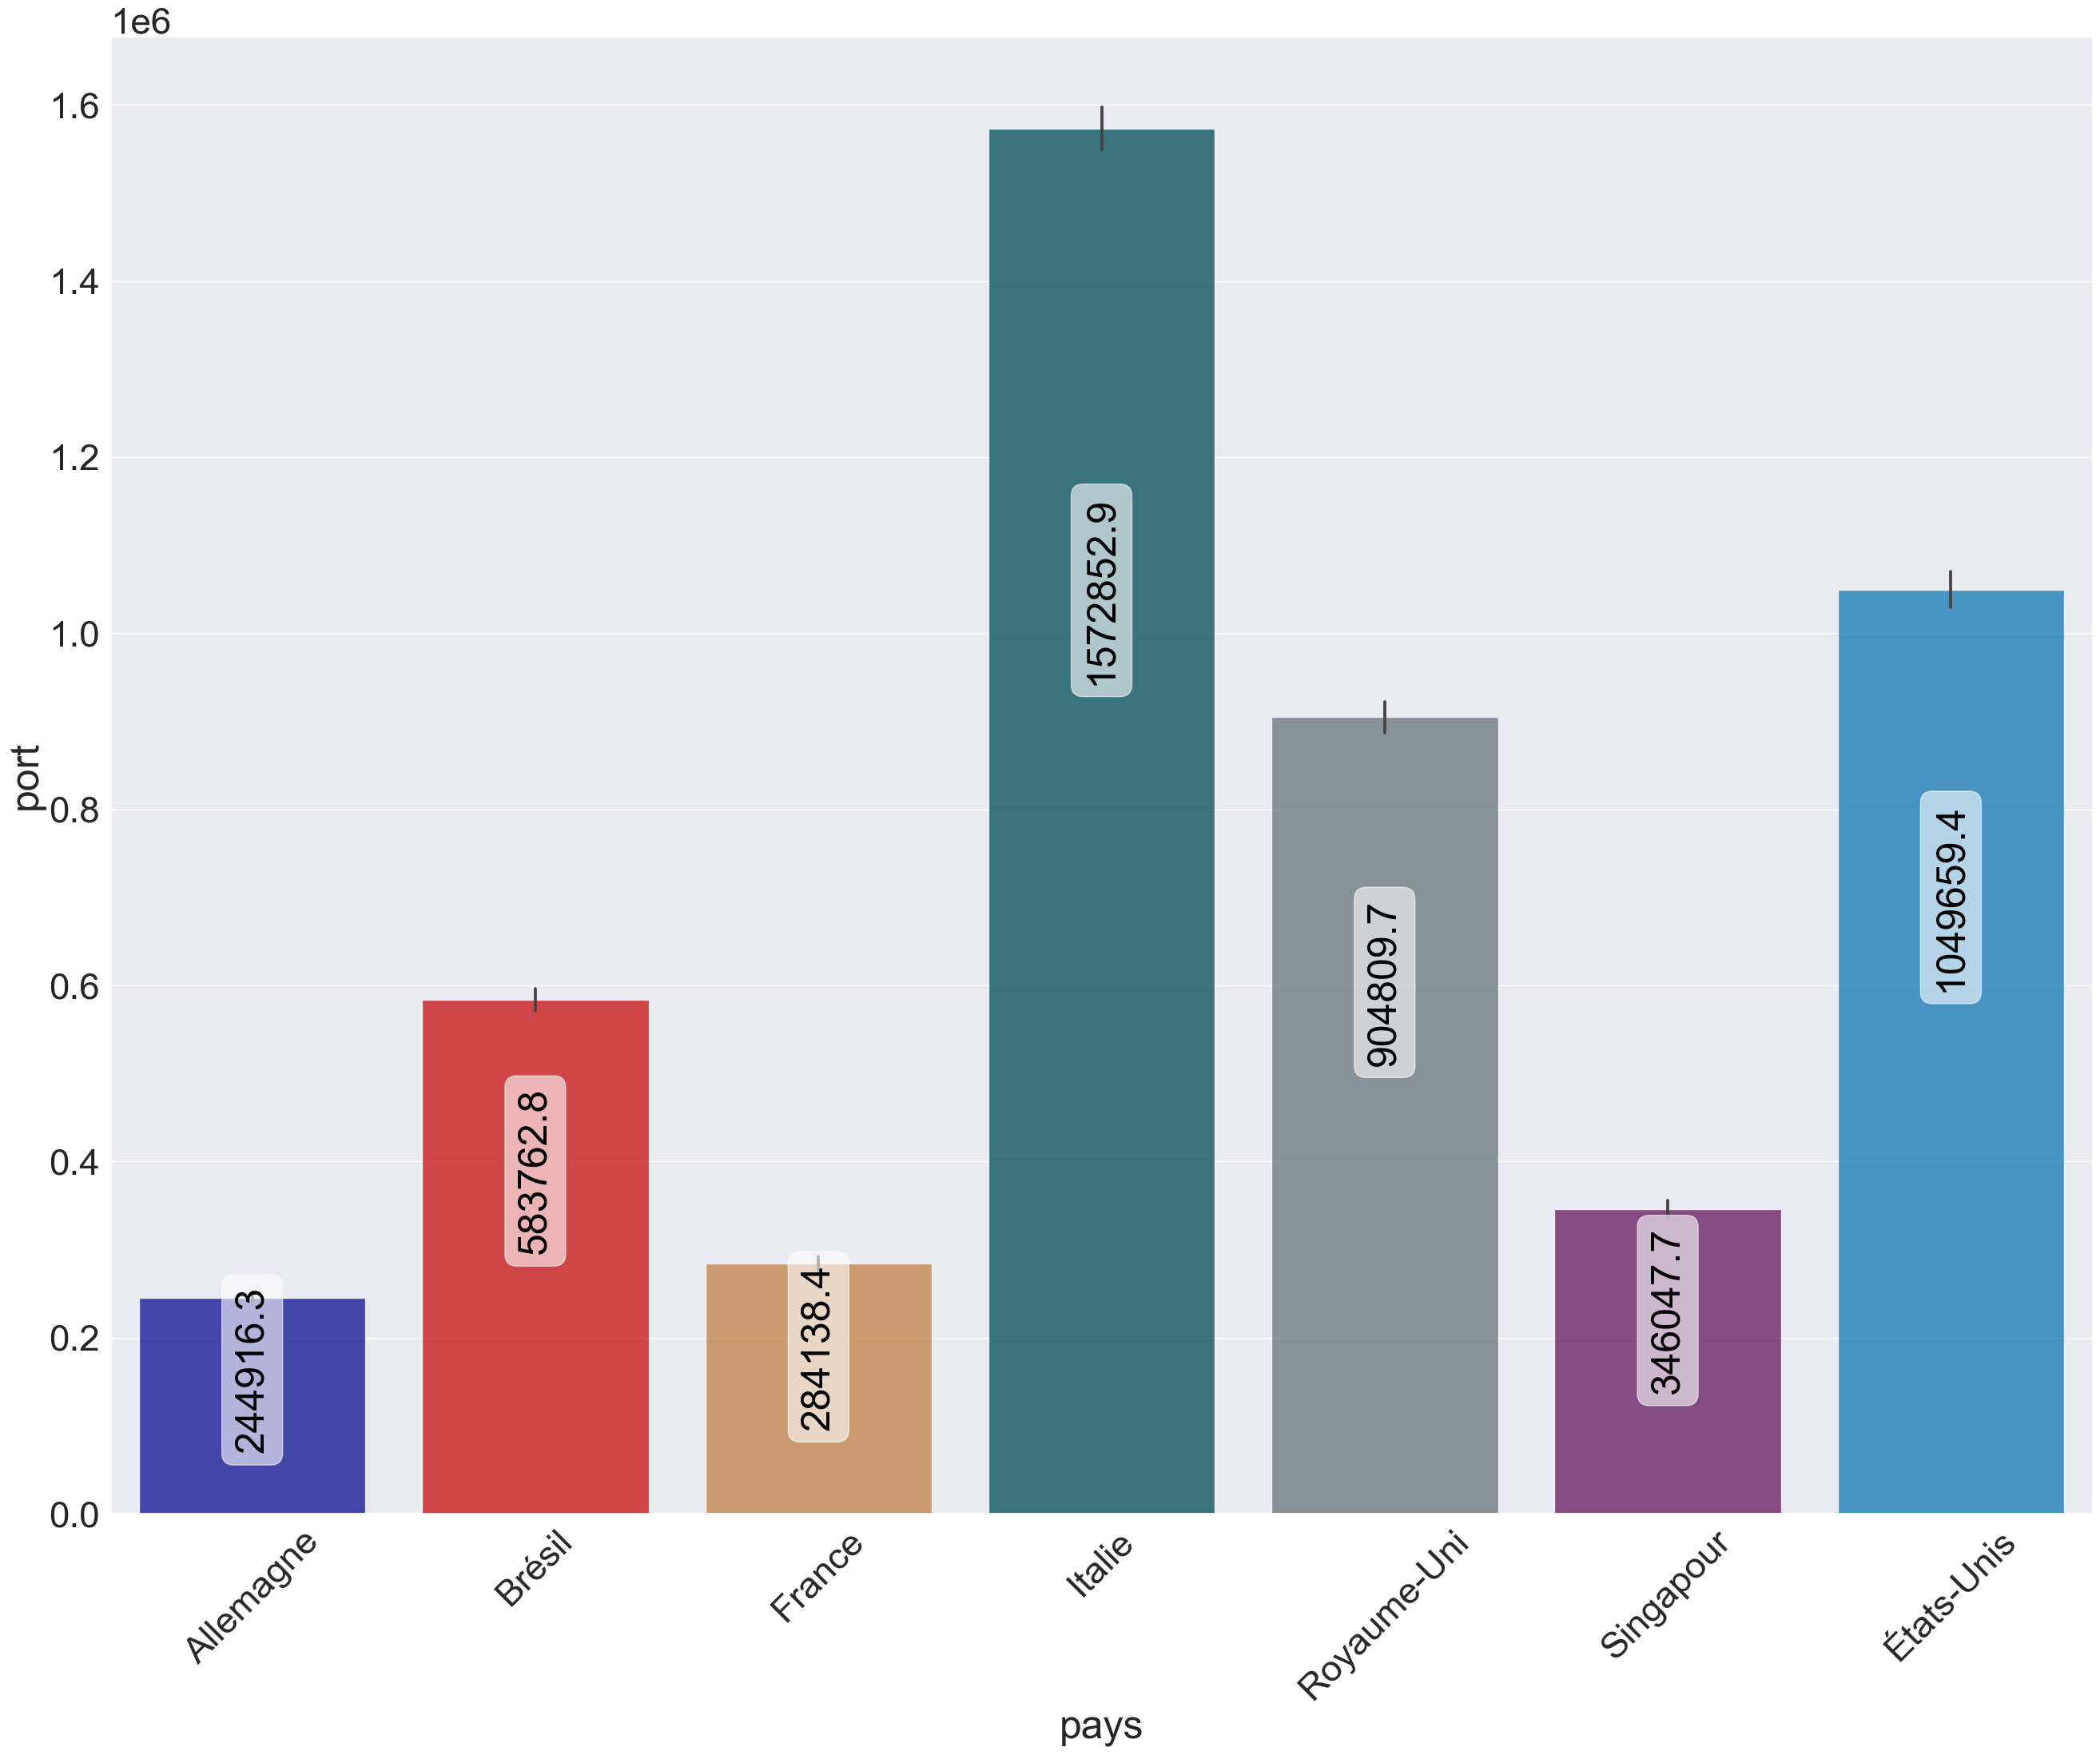

In [71]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='pays',y='port',data=donnees10.sort_values('pays'),palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

for i,nb in enumerate(donnees10.groupby('pays').port.sum().sort_index().values):
    gbarplot.text(
                i ,
                nb-nb//3,
                nb,
                color='black',
                rotation='vertical',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )

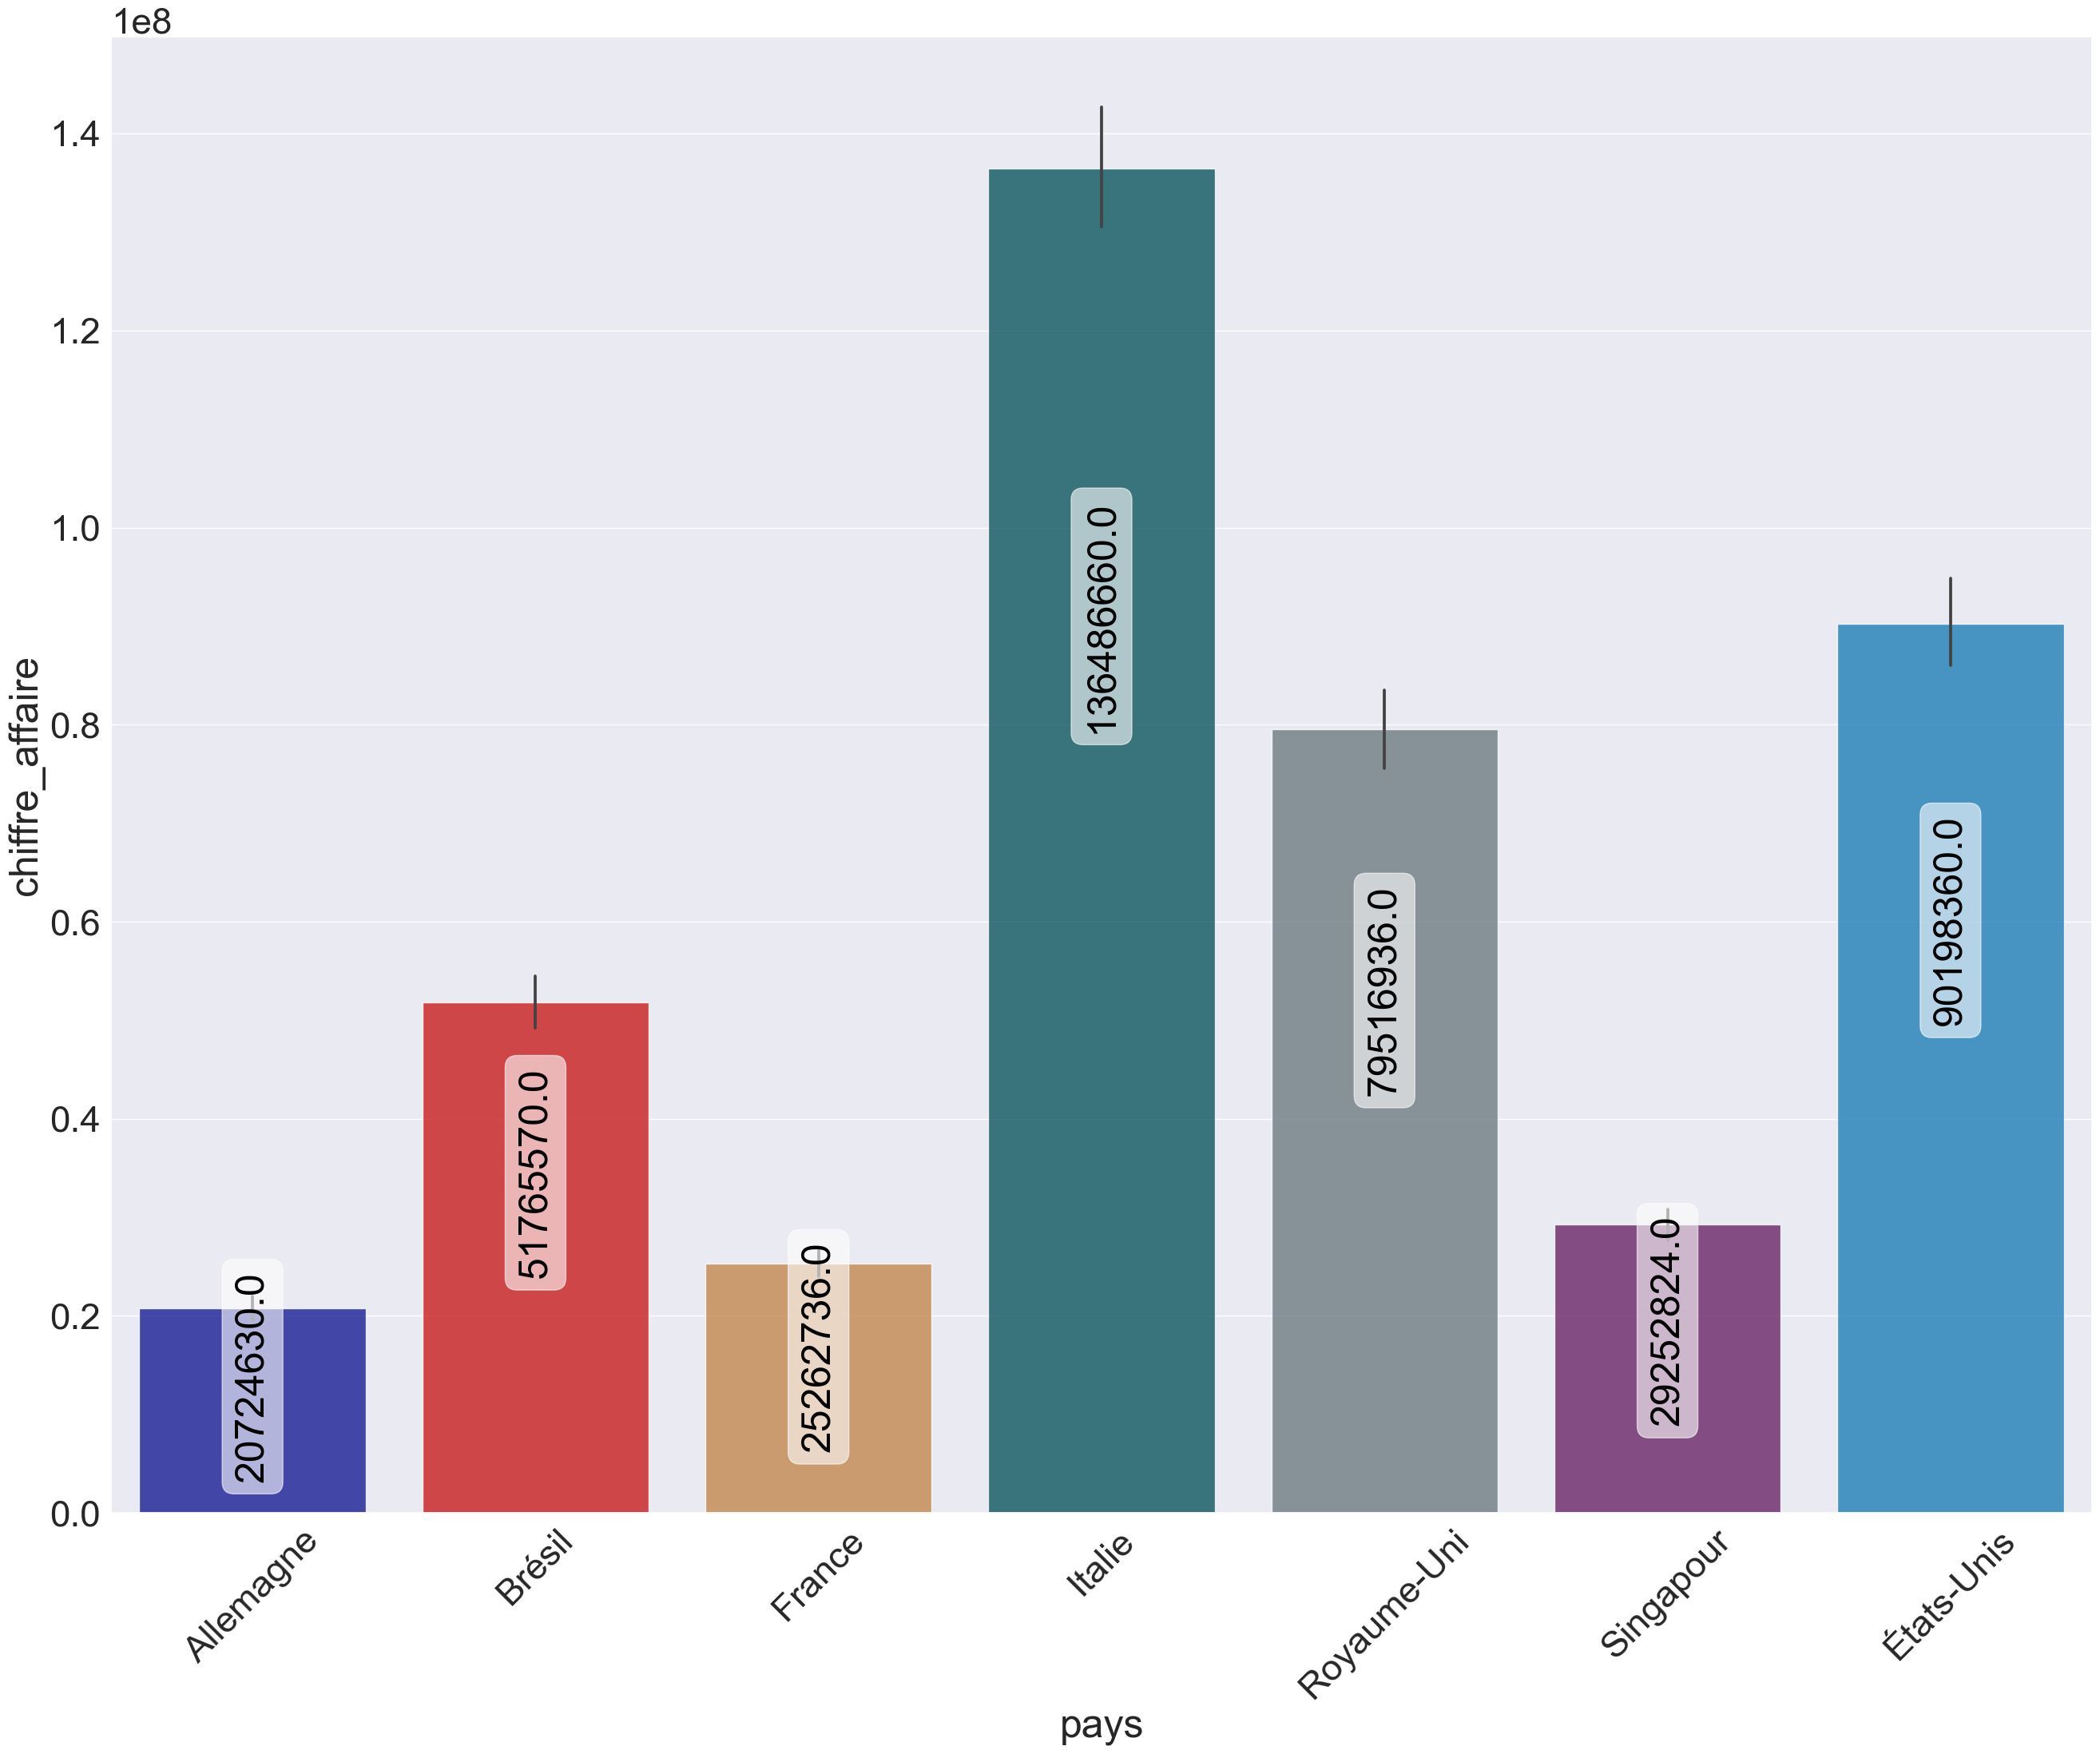

In [72]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='pays',y='chiffre_affaire',data=donnees10.sort_values('pays'),palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

for i,nb in enumerate(donnees10.groupby('pays').chiffre_affaire.sum().sort_index().values):
    gbarplot.text(
                i ,
                nb-nb//3,
                nb,
                color='black',
                rotation='vertical',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )

In [73]:
# Conversion de la colonne 'quantite' en entier
donnees10['quantite'] = donnees10['quantite'].astype(int)

# Obtention de l'indice de la ligne avec la plus grande quantité pour chaque pays
idx = donnees10.groupby('pays')['quantite'].idxmax()

# Sélection des lignes correspondant à ces indices
result = donnees10.loc[idx]

# Affichage du résultat
result.head(10)

produit               produit_1         pays  quantite          port  \
671       70           Outback Lager    Allemagne      4695   3148.100098   
746       88                  Scones       Brésil      9915   6411.100098   
798       58  Escargots de Bourgogne       France      5243   3262.000000   
114       73              Röd Kaviar       Italie     24101  15035.400391   
571       71             Fløtemysost  Royaume-Uni     14816   8988.799805   
148        2                   Chang    Singapour      6331   4062.000000   
645      107                Cake Mix   États-Unis     17840  10814.500000   

     chiffre_affaire  
671     2.075576e+05  
746     3.344015e+05  
798     3.776212e+05  
114     1.873617e+06  
571     9.121128e+05  
148     3.006981e+05  
645     1.445918e+06